# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-06 04:03:43,107 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-06 04:03:43,108 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-06 04:03:43,109 - INFO - 	Setting export engine to 'sqlite'.
2023-01-06 04:03:43,144 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-06 04:03:43,145 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-06 04:03:43,155 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-06 04:03:43,156 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-06 04:03:43,163 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-06 04:03:43,164 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-06 04:03:43,172 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [10]:
#sisepuede.attribute_strategy.table
len(sisepuede.regions)*len(strats_run)

442

In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-06 04:16:20,222 - INFO - Running AFOLU model
2023-01-06 04:16:20,548 - INFO - AFOLU model run successfully completed
2023-01-06 04:16:20,548 - INFO - Running CircularEconomy model
2023-01-06 04:16:20,646 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:16:20,647 - INFO - Running IPPU model
2023-01-06 04:16:20,749 - INFO - IPPU model run successfully completed
2023-01-06 04:16:20,750 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:16:20,788 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:16:20,911 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:16:20,912 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:16:47.993 Started modeling scenario.
2023-06-Jan 04:17:18.245 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:17:18,566 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:17:18,586 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:17:18,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:17:18,666 - INFO - Model run for primary_id = 0 successfully completed in 58.44 seconds.
2023-01-06 04:17:18,672 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:17:18,966 - INFO - AFOLU model run successfully completed
2023-01-06 04:17:18,967 - INFO - Running CircularEconomy model
2023-01-06 04:17:19,046 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:17:19,047 - INFO - Running IPPU model
2023-01-06 04:17:19,139 - INFO - IPPU model run successfully completed
2023-01-06 04:17:19,139 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:17:19,171 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:17:19,292 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:17:19,292 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:17:20.528 Started modeling scenario.
2023-06-Jan 04:17:31.456 Finished modeling scenario.


2023-01-06 04:17:31,751 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:17:31,773 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:17:31,854 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:17:31,858 - INFO - Model run for primary_id = 5005 successfully completed in 13.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:17:32,401 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-01-06 04:17:32,407 - INFO - Running AFOLU model
2023-01-06 04:17:32,722 - INFO - AFOLU model run successfully completed
2023-01-06 04:17:32,724 - INFO - Running CircularEconomy model
2023-01-06 04:17:32,812 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:17:32,813 - INFO - Running IPPU model
2023-01-06 04:17:32,894 - INFO - IPPU model run successfully completed
2023-01-06 04:17:32,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:17:32,928 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:17:33,062 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:17:33,063 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:17:43.573 Started modeling scenario.
2023-06-Jan 04:17:55.776 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:17:56,004 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:17:56,024 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:17:56,096 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:17:56,099 - INFO - Model run for primary_id = 6006 successfully completed in 23.69 seconds.
2023-01-06 04:17:56,111 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:17:56,369 - INFO - AFOLU model run successfully completed
2023-01-06 04:17:56,369 - INFO - Running CircularEconomy model
2023-01-06 04:17:56,452 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:17:56,452 - INFO - Running IPPU model
2023-01-06 04:17:56,538 - INFO - IPPU model run successfully completed
2023-01-06 04:17:56,539 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:17:56,570 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:17:56,690 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:17:56,691 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:17:57.845 Started modeling scenario.
2023-06-Jan 04:18:08.010 Finished modeling scenario.


2023-01-06 04:18:08,221 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:18:08,240 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:18:08,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:18:08,315 - INFO - Model run for primary_id = 7007 successfully completed in 12.2 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:18:08,702 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:18:08,709 - INFO - Running AFOLU model
2023-01-06 04:18:08,958 - INFO - AFOLU model run successfully completed
2023-01-06 04:18:08,959 - INFO - Running CircularEconomy model
2023-01-06 04:18:09,042 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:18:09,043 - INFO - Running IPPU model
2023-01-06 04:18:09,140 - INFO - IPPU model run successfully completed
2023-01-06 04:18:09,141 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:18:09,177 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:18:09,304 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:18:09,304 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:18:10.445 Started modeling scenario.
2023-06-Jan 04:18:20.431 Finished modeling scenario.


2023-01-06 04:18:20,643 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:18:20,661 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:18:20,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:18:20,735 - INFO - Model run for primary_id = 8008 successfully completed in 12.03 seconds.
2023-01-06 04:18:20,746 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:18:20,991 - INFO - AFOLU model run successfully completed
2023-01-06 04:18:20,991 - INFO - Running CircularEconomy model
2023-01-06 04:18:21,070 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:18:21,071 - INFO - Running IPPU model
2023-01-06 04:18:21,159 - INFO - IPPU model run successfully completed
2023-01-06 04:18:21,159 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:18:21,190 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:18:21,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:18:21,307 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:18:22.409 Started modeling scenario.
2023-06-Jan 04:18:32.498 Finished modeling scenario.


2023-01-06 04:18:32,720 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:18:32,791 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:18:32,795 - INFO - Model run for primary_id = 9009 successfully completed in 12.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:18:33,186 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:18:33,202 - INFO - Running AFOLU model
2023-01-06 04:18:33,463 - INFO - AFOLU model run successfully completed
2023-01-06 04:18:33,464 - INFO - Running CircularEconomy model
2023-01-06 04:18:33,549 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:18:33,549 - INFO - Running IPPU model
2023-01-06 04:18:33,643 - INFO - IPPU model run successfully completed
2023-01-06 04:18:33,643 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:18:33,677 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:18:33,795 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:18:33,796 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:18:34.953 Started modeling scenario.
2023-06-Jan 04:18:44.908 Finished modeling scenario.


2023-01-06 04:18:45,121 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:18:45,193 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:18:45,196 - INFO - Model run for primary_id = 10010 successfully completed in 11.99 seconds.
2023-01-06 04:18:45,208 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:18:45,448 - INFO - AFOLU model run successfully completed
2023-01-06 04:18:45,449 - INFO - Running CircularEconomy model
2023-01-06 04:18:45,529 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:18:45,529 - INFO - Running IPPU model
2023-01-06 04:18:45,617 - INFO - IPPU model run successfully completed
2023-01-06 04:18:45,618 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:18:45,650 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:18:45,765 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:18:45,766 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:18:46.875 Started modeling scenario.
2023-06-Jan 04:18:56.691 Finished modeling scenario.


2023-01-06 04:18:56,902 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:18:56,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:18:56,975 - INFO - Model run for primary_id = 11011 successfully completed in 11.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:18:57,442 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:18:57,456 - INFO - Running AFOLU model
2023-01-06 04:18:57,719 - INFO - AFOLU model run successfully completed
2023-01-06 04:18:57,720 - INFO - Running CircularEconomy model
2023-01-06 04:18:57,802 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:18:57,802 - INFO - Running IPPU model
2023-01-06 04:18:57,901 - INFO - IPPU model run successfully completed
2023-01-06 04:18:57,902 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:18:57,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:18:58,057 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:18:58,058 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:18:59.193 Started modeling scenario.
2023-06-Jan 04:19:09.118 Finished modeling scenario.


2023-01-06 04:19:09,323 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:19:09,342 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:19:09,415 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:19:09,418 - INFO - Model run for primary_id = 12012 successfully completed in 11.96 seconds.
2023-01-06 04:19:09,433 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:19:09,682 - INFO - AFOLU model run successfully completed
2023-01-06 04:19:09,683 - INFO - Running CircularEconomy model
2023-01-06 04:19:09,761 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:19:09,762 - INFO - Running IPPU model
2023-01-06 04:19:09,848 - INFO - IPPU model run successfully completed
2023-01-06 04:19:09,849 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:19:09,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:19:10,000 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:19:10,001 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:19:11.121 Started modeling scenario.
2023-06-Jan 04:19:21.503 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:19:21,716 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:19:21,734 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:19:21,804 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:19:21,807 - INFO - Model run for primary_id = 13013 successfully completed in 12.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:19:22,189 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:19:22,207 - INFO - Running AFOLU model
2023-01-06 04:19:22,461 - INFO - AFOLU model run successfully completed
2023-01-06 04:19:22,462 - INFO - Running CircularEconomy model
2023-01-06 04:19:22,544 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:19:22,544 - INFO - Running IPPU model
2023-01-06 04:19:22,640 - INFO - IPPU model run successfully completed
2023-01-06 04:19:22,641 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:19:22,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:19:22,796 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:19:22,797 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:19:24.078 Started modeling scenario.
2023-06-Jan 04:19:34.242 Finished modeling scenario.


2023-01-06 04:19:34,462 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:19:34,484 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:19:34,560 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:19:34,563 - INFO - Model run for primary_id = 14014 successfully completed in 12.36 seconds.
2023-01-06 04:19:34,576 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:19:34,847 - INFO - AFOLU model run successfully completed
2023-01-06 04:19:34,848 - INFO - Running CircularEconomy model
2023-01-06 04:19:34,942 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:19:34,942 - INFO - Running IPPU model
2023-01-06 04:19:35,041 - INFO - IPPU model run successfully completed
2023-01-06 04:19:35,042 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:19:35,079 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:19:35,215 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:19:35,216 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:19:36.443 Started modeling scenario.
2023-06-Jan 04:19:46.818 Finished modeling scenario.


2023-01-06 04:19:47,037 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:19:47,104 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:19:47,107 - INFO - Model run for primary_id = 15015 successfully completed in 12.53 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:19:47,468 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:19:47,486 - INFO - Running AFOLU model
2023-01-06 04:19:47,748 - INFO - AFOLU model run successfully completed
2023-01-06 04:19:47,749 - INFO - Running CircularEconomy model
2023-01-06 04:19:47,829 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:19:47,829 - INFO - Running IPPU model
2023-01-06 04:19:47,915 - INFO - IPPU model run successfully completed
2023-01-06 04:19:47,916 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:19:47,948 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:19:48,068 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:19:48,069 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:19:49.204 Started modeling scenario.
2023-06-Jan 04:19:59.297 Finished modeling scenario.


2023-01-06 04:19:59,517 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:19:59,591 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:19:59,594 - INFO - Model run for primary_id = 16016 successfully completed in 12.11 seconds.
2023-01-06 04:19:59,606 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:19:59,847 - INFO - AFOLU model run successfully completed
2023-01-06 04:19:59,848 - INFO - Running CircularEconomy model
2023-01-06 04:19:59,916 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:19:59,916 - INFO - Running IPPU model
2023-01-06 04:19:59,995 - INFO - IPPU model run successfully completed
2023-01-06 04:19:59,996 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:20:00,025 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:20:00,157 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:20:00,157 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:20:01.223 Started modeling scenario.
2023-06-Jan 04:20:11.474 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:20:11,703 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:20:11,724 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:20:11,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:20:11,795 - INFO - Model run for primary_id = 17017 successfully completed in 12.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:20:12,139 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:20:12,152 - INFO - Running AFOLU model
2023-01-06 04:20:12,390 - INFO - AFOLU model run successfully completed
2023-01-06 04:20:12,391 - INFO - Running CircularEconomy model
2023-01-06 04:20:12,458 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:20:12,459 - INFO - Running IPPU model
2023-01-06 04:20:12,532 - INFO - IPPU model run successfully completed
2023-01-06 04:20:12,532 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:20:12,560 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:20:12,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:20:12,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:20:13.739 Started modeling scenario.
2023-06-Jan 04:20:24.282 Finished modeling scenario.


2023-01-06 04:20:24,489 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:20:24,506 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:20:24,565 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:20:24,567 - INFO - Model run for primary_id = 18018 successfully completed in 12.42 seconds.
2023-01-06 04:20:24,578 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:20:24,814 - INFO - AFOLU model run successfully completed
2023-01-06 04:20:24,815 - INFO - Running CircularEconomy model
2023-01-06 04:20:24,882 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:20:24,883 - INFO - Running IPPU model
2023-01-06 04:20:24,956 - INFO - IPPU model run successfully completed
2023-01-06 04:20:24,957 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:20:24,984 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:20:25,087 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:20:25,088 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:20:26.110 Started modeling scenario.
2023-06-Jan 04:20:36.683 Finished modeling scenario.


2023-01-06 04:20:36,890 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:20:36,907 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:20:36,967 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:20:36,969 - INFO - Model run for primary_id = 19019 successfully completed in 12.39 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:20:37,311 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:20:37,323 - INFO - Running AFOLU model
2023-01-06 04:20:37,561 - INFO - AFOLU model run successfully completed
2023-01-06 04:20:37,561 - INFO - Running CircularEconomy model
2023-01-06 04:20:37,628 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:20:37,629 - INFO - Running IPPU model
2023-01-06 04:20:37,703 - INFO - IPPU model run successfully completed
2023-01-06 04:20:37,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:20:37,737 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:20:37,858 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:20:37,859 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:20:38.904 Started modeling scenario.
2023-06-Jan 04:20:48.746 Finished modeling scenario.


2023-01-06 04:20:48,955 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:20:48,971 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:20:49,026 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:20:49,029 - INFO - Model run for primary_id = 20020 successfully completed in 11.71 seconds.
2023-01-06 04:20:49,041 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:20:49,288 - INFO - AFOLU model run successfully completed
2023-01-06 04:20:49,289 - INFO - Running CircularEconomy model
2023-01-06 04:20:49,355 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:20:49,356 - INFO - Running IPPU model
2023-01-06 04:20:49,431 - INFO - IPPU model run successfully completed
2023-01-06 04:20:49,432 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:20:49,458 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:20:49,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:20:49,562 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:20:50.591 Started modeling scenario.
2023-06-Jan 04:21:00.818 Finished modeling scenario.


2023-01-06 04:21:01,034 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:21:01,091 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:21:01,094 - INFO - Model run for primary_id = 21021 successfully completed in 12.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:21:01,434 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:21:01,438 - INFO - Running AFOLU model
2023-01-06 04:21:01,686 - INFO - AFOLU model run successfully completed
2023-01-06 04:21:01,687 - INFO - Running CircularEconomy model
2023-01-06 04:21:01,773 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:21:01,774 - INFO - Running IPPU model
2023-01-06 04:21:01,876 - INFO - IPPU model run successfully completed
2023-01-06 04:21:01,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:21:01,913 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:21:02,049 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:21:02,049 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:21:03.202 Started modeling scenario.
2023-06-Jan 04:21:13.866 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:21:14,085 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:21:14,102 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:21:14,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:21:14,173 - INFO - Model run for primary_id = 22022 successfully completed in 12.73 seconds.
2023-01-06 04:21:14,185 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:21:14,450 - INFO - AFOLU model run successfully completed
2023-01-06 04:21:14,450 - INFO - Running CircularEconomy model
2023-01-06 04:21:14,523 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:21:14,524 - INFO - Running IPPU model
2023-01-06 04:21:14,596 - INFO - IPPU model run successfully completed
2023-01-06 04:21:14,597 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:21:14,624 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:21:14,724 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:21:14,725 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:21:15.742 Started modeling scenario.
2023-06-Jan 04:21:25.450 Finished modeling scenario.


2023-01-06 04:21:25,707 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:21:25,722 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:21:25,785 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:21:25,788 - INFO - Model run for primary_id = 23023 successfully completed in 11.6 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:21:26,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:21:26,151 - INFO - Running AFOLU model
2023-01-06 04:21:26,391 - INFO - AFOLU model run successfully completed
2023-01-06 04:21:26,392 - INFO - Running CircularEconomy model
2023-01-06 04:21:26,465 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:21:26,466 - INFO - Running IPPU model
2023-01-06 04:21:26,547 - INFO - IPPU model run successfully completed
2023-01-06 04:21:26,548 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:21:26,578 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:21:26,681 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:21:26,682 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:21:27.715 Started modeling scenario.
2023-06-Jan 04:21:38.320 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:21:38,576 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:21:38,595 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:21:38,662 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:21:38,665 - INFO - Model run for primary_id = 24024 successfully completed in 12.51 seconds.
2023-01-06 04:21:38,676 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:21:38,922 - INFO - AFOLU model run successfully completed
2023-01-06 04:21:38,923 - INFO - Running CircularEconomy model
2023-01-06 04:21:38,998 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:21:38,998 - INFO - Running IPPU model
2023-01-06 04:21:39,071 - INFO - IPPU model run successfully completed
2023-01-06 04:21:39,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:21:39,098 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:21:39,199 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:21:39,200 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:21:40.237 Started modeling scenario.
2023-06-Jan 04:21:50.472 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:21:50,684 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:21:50,703 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:21:50,770 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:21:50,773 - INFO - Model run for primary_id = 25025 successfully completed in 12.1 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:21:51,162 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:21:51,177 - INFO - Running AFOLU model
2023-01-06 04:21:51,440 - INFO - AFOLU model run successfully completed
2023-01-06 04:21:51,440 - INFO - Running CircularEconomy model
2023-01-06 04:21:51,521 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:21:51,521 - INFO - Running IPPU model
2023-01-06 04:21:51,601 - INFO - IPPU model run successfully completed
2023-01-06 04:21:51,601 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:21:51,628 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:21:51,729 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:21:51,730 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:21:52.784 Started modeling scenario.
2023-06-Jan 04:22:04.308 Finished modeling scenario.


2023-01-06 04:22:04,533 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:22:04,598 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:22:04,602 - INFO - Model run for primary_id = 26026 successfully completed in 13.42 seconds.
2023-01-06 04:22:04,610 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:22:04,854 - INFO - AFOLU model run successfully completed
2023-01-06 04:22:04,855 - INFO - Running CircularEconomy model
2023-01-06 04:22:04,925 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:22:04,926 - INFO - Running IPPU model
2023-01-06 04:22:05,002 - INFO - IPPU model run successfully completed
2023-01-06 04:22:05,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:22:05,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:22:05,138 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:22:05,138 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:22:06.174 Started modeling scenario.
2023-06-Jan 04:22:16.310 Finished modeling scenario.


2023-01-06 04:22:16,530 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:22:16,590 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:22:16,593 - INFO - Model run for primary_id = 27027 successfully completed in 11.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:22:16,970 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:22:16,982 - INFO - Running AFOLU model
2023-01-06 04:22:17,227 - INFO - AFOLU model run successfully completed
2023-01-06 04:22:17,227 - INFO - Running CircularEconomy model
2023-01-06 04:22:17,294 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:22:17,295 - INFO - Running IPPU model
2023-01-06 04:22:17,369 - INFO - IPPU model run successfully completed
2023-01-06 04:22:17,370 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:22:17,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:22:17,505 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:22:17,505 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:22:18.568 Started modeling scenario.
2023-06-Jan 04:22:29.091 Finished modeling scenario.


2023-01-06 04:22:29,315 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:22:29,371 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:22:29,374 - INFO - Model run for primary_id = 28028 successfully completed in 12.39 seconds.
2023-01-06 04:22:29,384 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:22:29,621 - INFO - AFOLU model run successfully completed
2023-01-06 04:22:29,622 - INFO - Running CircularEconomy model
2023-01-06 04:22:29,689 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:22:29,691 - INFO - Running IPPU model
2023-01-06 04:22:29,764 - INFO - IPPU model run successfully completed
2023-01-06 04:22:29,765 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:22:29,791 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:22:29,894 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:22:29,895 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:22:30.924 Started modeling scenario.
2023-06-Jan 04:22:40.987 Finished modeling scenario.


2023-01-06 04:22:41,202 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:22:41,260 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:22:41,263 - INFO - Model run for primary_id = 31031 successfully completed in 11.88 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:22:41,639 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:22:42,571 - INFO - Running AFOLU model
2023-01-06 04:22:42,801 - INFO - AFOLU model run successfully completed
2023-01-06 04:22:42,802 - INFO - Running CircularEconomy model
2023-01-06 04:22:42,872 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:22:42,873 - INFO - Running IPPU model
2023-01-06 04:22:42,950 - INFO - IPPU model run successfully completed
2023-01-06 04:22:42,951 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:22:42,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:22:43,086 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:22:43,087 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:22:44.117 Started modeling scenario.
2023-06-Jan 04:22:54.174 Finished modeling scenario.


2023-01-06 04:22:54,389 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:22:54,409 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:22:54,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:22:54,471 - INFO - Model run for primary_id = 0 successfully completed in 11.9 seconds.
2023-01-06 04:22:54,476 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:22:54,707 - INFO - AFOLU model run successfully completed
2023-01-06 04:22:54,708 - INFO - Running CircularEconomy model
2023-01-06 04:22:54,774 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:22:54,775 - INFO - Running IPPU model
2023-01-06 04:22:54,846 - INFO - IPPU model run successfully completed
2023-01-06 04:22:54,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:22:54,875 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:22:54,978 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:22:54,978 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:22:55.985 Started modeling scenario.
2023-06-Jan 04:23:05.852 Finished modeling scenario.


2023-01-06 04:23:06,072 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:23:06,130 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:23:06,132 - INFO - Model run for primary_id = 5005 successfully completed in 11.66 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:23:06,488 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:23:06,492 - INFO - Running AFOLU model
2023-01-06 04:23:06,732 - INFO - AFOLU model run successfully completed
2023-01-06 04:23:06,732 - INFO - Running CircularEconomy model
2023-01-06 04:23:06,798 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:23:06,800 - INFO - Running IPPU model
2023-01-06 04:23:06,882 - INFO - IPPU model run successfully completed
2023-01-06 04:23:06,882 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:23:06,914 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:23:07,027 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:23:07,028 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:23:08.058 Started modeling scenario.
2023-06-Jan 04:23:18.967 Finished modeling scenario.


2023-01-06 04:23:19,173 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:23:19,189 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:23:19,245 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:23:19,248 - INFO - Model run for primary_id = 6006 successfully completed in 12.76 seconds.
2023-01-06 04:23:19,252 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:23:19,478 - INFO - AFOLU model run successfully completed
2023-01-06 04:23:19,479 - INFO - Running CircularEconomy model
2023-01-06 04:23:19,546 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:23:19,547 - INFO - Running IPPU model
2023-01-06 04:23:19,619 - INFO - IPPU model run successfully completed
2023-01-06 04:23:19,620 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:23:19,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:23:19,751 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:23:19,751 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:23:20.840 Started modeling scenario.
2023-06-Jan 04:23:31.270 Finished modeling scenario.


2023-01-06 04:23:31,490 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:23:31,551 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:23:31,554 - INFO - Model run for primary_id = 7007 successfully completed in 12.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:23:31,902 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:23:31,906 - INFO - Running AFOLU model
2023-01-06 04:23:32,157 - INFO - AFOLU model run successfully completed
2023-01-06 04:23:32,157 - INFO - Running CircularEconomy model
2023-01-06 04:23:32,226 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:23:32,227 - INFO - Running IPPU model
2023-01-06 04:23:32,302 - INFO - IPPU model run successfully completed
2023-01-06 04:23:32,303 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:23:32,338 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:23:32,456 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:23:32,456 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:23:33.520 Started modeling scenario.
2023-06-Jan 04:23:43.791 Finished modeling scenario.


2023-01-06 04:23:44,000 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:23:44,057 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:23:44,060 - INFO - Model run for primary_id = 8008 successfully completed in 12.15 seconds.
2023-01-06 04:23:44,063 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:23:44,292 - INFO - AFOLU model run successfully completed
2023-01-06 04:23:44,293 - INFO - Running CircularEconomy model
2023-01-06 04:23:44,360 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:23:44,360 - INFO - Running IPPU model
2023-01-06 04:23:44,432 - INFO - IPPU model run successfully completed
2023-01-06 04:23:44,433 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:23:44,459 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:23:44,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:23:44,563 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:23:45.587 Started modeling scenario.
2023-06-Jan 04:23:56.385 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:23:56,593 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:23:56,610 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:23:56,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:23:56,678 - INFO - Model run for primary_id = 9009 successfully completed in 12.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:23:57,020 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:23:57,023 - INFO - Running AFOLU model
2023-01-06 04:23:57,268 - INFO - AFOLU model run successfully completed
2023-01-06 04:23:57,268 - INFO - Running CircularEconomy model
2023-01-06 04:23:57,335 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:23:57,336 - INFO - Running IPPU model
2023-01-06 04:23:57,409 - INFO - IPPU model run successfully completed
2023-01-06 04:23:57,410 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:23:57,438 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:23:57,540 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:23:57,540 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:23:58.604 Started modeling scenario.
2023-06-Jan 04:24:08.731 Finished modeling scenario.


2023-01-06 04:24:08,952 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:24:09,012 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:24:09,014 - INFO - Model run for primary_id = 10010 successfully completed in 11.99 seconds.
2023-01-06 04:24:09,018 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:24:09,258 - INFO - AFOLU model run successfully completed
2023-01-06 04:24:09,259 - INFO - Running CircularEconomy model
2023-01-06 04:24:09,326 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:24:09,327 - INFO - Running IPPU model
2023-01-06 04:24:09,398 - INFO - IPPU model run successfully completed
2023-01-06 04:24:09,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:24:09,429 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:24:09,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:24:09,536 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:24:10.600 Started modeling scenario.
2023-06-Jan 04:24:21.195 Finished modeling scenario.


2023-01-06 04:24:21,429 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:24:21,448 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:24:21,511 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:24:21,515 - INFO - Model run for primary_id = 11011 successfully completed in 12.5 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:24:21,889 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:24:21,893 - INFO - Running AFOLU model
2023-01-06 04:24:22,146 - INFO - AFOLU model run successfully completed
2023-01-06 04:24:22,147 - INFO - Running CircularEconomy model
2023-01-06 04:24:22,225 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:24:22,226 - INFO - Running IPPU model
2023-01-06 04:24:22,312 - INFO - IPPU model run successfully completed
2023-01-06 04:24:22,313 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:24:22,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:24:22,460 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:24:22,461 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:24:23.511 Started modeling scenario.
2023-06-Jan 04:24:33.996 Finished modeling scenario.


2023-01-06 04:24:34,208 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:24:34,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:24:34,269 - INFO - Model run for primary_id = 12012 successfully completed in 12.38 seconds.
2023-01-06 04:24:34,273 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:24:34,514 - INFO - AFOLU model run successfully completed
2023-01-06 04:24:34,515 - INFO - Running CircularEconomy model
2023-01-06 04:24:34,582 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:24:34,582 - INFO - Running IPPU model
2023-01-06 04:24:34,657 - INFO - IPPU model run successfully completed
2023-01-06 04:24:34,660 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:24:34,688 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:24:34,792 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:24:34,793 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:24:35.808 Started modeling scenario.
2023-06-Jan 04:24:45.915 Finished modeling scenario.


2023-01-06 04:24:46,136 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:24:46,194 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:24:46,197 - INFO - Model run for primary_id = 13013 successfully completed in 11.92 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:24:46,544 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:24:46,548 - INFO - Running AFOLU model
2023-01-06 04:24:46,795 - INFO - AFOLU model run successfully completed
2023-01-06 04:24:46,796 - INFO - Running CircularEconomy model
2023-01-06 04:24:46,868 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:24:46,869 - INFO - Running IPPU model
2023-01-06 04:24:46,944 - INFO - IPPU model run successfully completed
2023-01-06 04:24:46,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:24:46,975 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:24:47,079 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:24:47,080 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:24:48.129 Started modeling scenario.
2023-06-Jan 04:24:58.619 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:24:58,842 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:24:58,862 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:24:58,929 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:24:58,932 - INFO - Model run for primary_id = 14014 successfully completed in 12.38 seconds.
2023-01-06 04:24:58,936 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:24:59,206 - INFO - AFOLU model run successfully completed
2023-01-06 04:24:59,207 - INFO - Running CircularEconomy model
2023-01-06 04:24:59,290 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:24:59,290 - INFO - Running IPPU model
2023-01-06 04:24:59,380 - INFO - IPPU model run successfully completed
2023-01-06 04:24:59,381 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:24:59,415 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:24:59,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:24:59,537 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:25:00.653 Started modeling scenario.
2023-06-Jan 04:25:10.938 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:25:11,162 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:25:11,179 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:25:11,239 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:25:11,241 - INFO - Model run for primary_id = 15015 successfully completed in 12.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:25:11,605 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:25:11,610 - INFO - Running AFOLU model
2023-01-06 04:25:11,867 - INFO - AFOLU model run successfully completed
2023-01-06 04:25:11,868 - INFO - Running CircularEconomy model
2023-01-06 04:25:11,936 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:25:11,937 - INFO - Running IPPU model
2023-01-06 04:25:12,015 - INFO - IPPU model run successfully completed
2023-01-06 04:25:12,016 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:25:12,042 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:25:12,145 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:25:12,145 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:25:13.186 Started modeling scenario.
2023-06-Jan 04:25:23.802 Finished modeling scenario.


2023-01-06 04:25:24,024 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:25:24,042 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:25:24,108 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:25:24,111 - INFO - Model run for primary_id = 16016 successfully completed in 12.5 seconds.
2023-01-06 04:25:24,115 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:25:24,374 - INFO - AFOLU model run successfully completed
2023-01-06 04:25:24,374 - INFO - Running CircularEconomy model
2023-01-06 04:25:24,451 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:25:24,452 - INFO - Running IPPU model
2023-01-06 04:25:24,528 - INFO - IPPU model run successfully completed
2023-01-06 04:25:24,529 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:25:24,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:25:24,656 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:25:24,657 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:25:25.685 Started modeling scenario.
2023-06-Jan 04:25:36.086 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:25:36,295 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:25:36,314 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:25:36,373 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:25:36,376 - INFO - Model run for primary_id = 17017 successfully completed in 12.26 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:25:36,721 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:25:36,724 - INFO - Running AFOLU model
2023-01-06 04:25:36,960 - INFO - AFOLU model run successfully completed
2023-01-06 04:25:36,960 - INFO - Running CircularEconomy model
2023-01-06 04:25:37,027 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:25:37,028 - INFO - Running IPPU model
2023-01-06 04:25:37,112 - INFO - IPPU model run successfully completed
2023-01-06 04:25:37,113 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:25:37,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:25:37,245 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:25:37,245 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:25:38.298 Started modeling scenario.
2023-06-Jan 04:25:48.690 Finished modeling scenario.


2023-01-06 04:25:48,908 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:25:48,968 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:25:48,971 - INFO - Model run for primary_id = 18018 successfully completed in 12.25 seconds.
2023-01-06 04:25:48,975 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:25:49,218 - INFO - AFOLU model run successfully completed
2023-01-06 04:25:49,218 - INFO - Running CircularEconomy model
2023-01-06 04:25:49,285 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:25:49,286 - INFO - Running IPPU model
2023-01-06 04:25:49,358 - INFO - IPPU model run successfully completed
2023-01-06 04:25:49,359 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:25:49,385 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:25:49,492 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:25:49,493 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:25:50.520 Started modeling scenario.
2023-06-Jan 04:26:00.433 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:26:00,648 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:26:00,666 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:26:00,728 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:26:00,731 - INFO - Model run for primary_id = 19019 successfully completed in 11.76 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:26:01,074 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:26:01,078 - INFO - Running AFOLU model
2023-01-06 04:26:01,312 - INFO - AFOLU model run successfully completed
2023-01-06 04:26:01,313 - INFO - Running CircularEconomy model
2023-01-06 04:26:01,379 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:26:01,380 - INFO - Running IPPU model
2023-01-06 04:26:01,455 - INFO - IPPU model run successfully completed
2023-01-06 04:26:01,455 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:26:01,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:26:01,599 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:26:01,600 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:26:10.650 Started modeling scenario.
2023-06-Jan 04:26:20.886 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:26:21,099 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:26:21,117 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:26:21,188 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:26:21,192 - INFO - Model run for primary_id = 20020 successfully completed in 20.11 seconds.
2023-01-06 04:26:21,199 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:26:21,433 - INFO - AFOLU model run successfully completed
2023-01-06 04:26:21,433 - INFO - Running CircularEconomy model
2023-01-06 04:26:21,515 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:26:21,516 - INFO - Running IPPU model
2023-01-06 04:26:21,591 - INFO - IPPU model run successfully completed
2023-01-06 04:26:21,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:26:21,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:26:21,723 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:26:21,723 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:26:22.760 Started modeling scenario.
2023-06-Jan 04:26:33.175 Finished modeling scenario.


2023-01-06 04:26:33,392 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:26:33,409 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:26:33,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:26:33,471 - INFO - Model run for primary_id = 21021 successfully completed in 12.27 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:26:33,829 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:26:33,835 - INFO - Running AFOLU model
2023-01-06 04:26:34,077 - INFO - AFOLU model run successfully completed
2023-01-06 04:26:34,078 - INFO - Running CircularEconomy model
2023-01-06 04:26:34,147 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:26:34,147 - INFO - Running IPPU model
2023-01-06 04:26:34,227 - INFO - IPPU model run successfully completed
2023-01-06 04:26:34,228 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:26:34,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:26:34,381 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:26:34,381 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:26:35.420 Started modeling scenario.
2023-06-Jan 04:26:45.789 Finished modeling scenario.


2023-01-06 04:26:46,015 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:26:46,079 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:26:46,081 - INFO - Model run for primary_id = 22022 successfully completed in 12.25 seconds.
2023-01-06 04:26:46,086 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:26:46,329 - INFO - AFOLU model run successfully completed
2023-01-06 04:26:46,330 - INFO - Running CircularEconomy model
2023-01-06 04:26:46,405 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:26:46,406 - INFO - Running IPPU model
2023-01-06 04:26:46,482 - INFO - IPPU model run successfully completed
2023-01-06 04:26:46,483 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:26:46,509 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:26:46,610 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:26:46,612 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:26:47.652 Started modeling scenario.
2023-06-Jan 04:26:57.614 Finished modeling scenario.


2023-01-06 04:26:57,832 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:26:57,849 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:26:57,909 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:26:57,912 - INFO - Model run for primary_id = 23023 successfully completed in 11.83 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:26:58,292 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:26:58,297 - INFO - Running AFOLU model
2023-01-06 04:26:58,541 - INFO - AFOLU model run successfully completed
2023-01-06 04:26:58,542 - INFO - Running CircularEconomy model
2023-01-06 04:26:58,610 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:26:58,611 - INFO - Running IPPU model
2023-01-06 04:26:58,691 - INFO - IPPU model run successfully completed
2023-01-06 04:26:58,692 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:26:58,721 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:26:58,824 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:26:58,824 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:26:59.945 Started modeling scenario.
2023-06-Jan 04:27:10.091 Finished modeling scenario.


2023-01-06 04:27:10,302 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:27:10,322 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:27:10,382 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:27:10,385 - INFO - Model run for primary_id = 24024 successfully completed in 12.09 seconds.
2023-01-06 04:27:10,393 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:27:10,628 - INFO - AFOLU model run successfully completed
2023-01-06 04:27:10,628 - INFO - Running CircularEconomy model
2023-01-06 04:27:10,695 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:27:10,696 - INFO - Running IPPU model
2023-01-06 04:27:10,768 - INFO - IPPU model run successfully completed
2023-01-06 04:27:10,768 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:27:10,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:27:10,900 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:27:10,901 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:27:11.977 Started modeling scenario.
2023-06-Jan 04:27:23.006 Finished modeling scenario.


2023-01-06 04:27:23,227 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:27:23,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:27:23,296 - INFO - Model run for primary_id = 25025 successfully completed in 12.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:27:23,697 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:27:23,702 - INFO - Running AFOLU model
2023-01-06 04:27:23,958 - INFO - AFOLU model run successfully completed
2023-01-06 04:27:23,959 - INFO - Running CircularEconomy model
2023-01-06 04:27:24,036 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:27:24,037 - INFO - Running IPPU model
2023-01-06 04:27:24,116 - INFO - IPPU model run successfully completed
2023-01-06 04:27:24,117 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:27:24,145 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:27:24,251 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:27:24,252 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:27:25.304 Started modeling scenario.
2023-06-Jan 04:27:35.551 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:27:35,778 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:27:35,796 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:27:35,858 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:27:35,861 - INFO - Model run for primary_id = 26026 successfully completed in 12.16 seconds.
2023-01-06 04:27:35,864 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:27:36,103 - INFO - AFOLU model run successfully completed
2023-01-06 04:27:36,103 - INFO - Running CircularEconomy model
2023-01-06 04:27:36,171 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:27:36,171 - INFO - Running IPPU model
2023-01-06 04:27:36,245 - INFO - IPPU model run successfully completed
2023-01-06 04:27:36,246 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:27:36,273 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:27:36,374 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:27:36,375 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:27:37.434 Started modeling scenario.
2023-06-Jan 04:27:47.373 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:27:47,591 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:27:47,609 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:27:47,669 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:27:47,671 - INFO - Model run for primary_id = 27027 successfully completed in 11.81 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:27:48,039 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:27:48,043 - INFO - Running AFOLU model
2023-01-06 04:27:48,295 - INFO - AFOLU model run successfully completed
2023-01-06 04:27:48,296 - INFO - Running CircularEconomy model
2023-01-06 04:27:48,364 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:27:48,366 - INFO - Running IPPU model
2023-01-06 04:27:48,443 - INFO - IPPU model run successfully completed
2023-01-06 04:27:48,443 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:27:48,470 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:27:48,572 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:27:48,573 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:27:49.618 Started modeling scenario.
2023-06-Jan 04:28:00.101 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:28:00,319 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:28:00,337 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:28:00,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:28:00,401 - INFO - Model run for primary_id = 28028 successfully completed in 12.36 seconds.
2023-01-06 04:28:00,406 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:28:00,644 - INFO - AFOLU model run successfully completed
2023-01-06 04:28:00,645 - INFO - Running CircularEconomy model
2023-01-06 04:28:00,712 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:28:00,712 - INFO - Running IPPU model
2023-01-06 04:28:00,788 - INFO - IPPU model run successfully completed
2023-01-06 04:28:00,789 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:28:00,815 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:28:00,918 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:28:00,919 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:28:01.979 Started modeling scenario.
2023-06-Jan 04:28:13.533 Finished modeling scenario.


2023-01-06 04:28:13,748 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:28:13,766 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:28:13,829 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:28:13,831 - INFO - Model run for primary_id = 31031 successfully completed in 13.43 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:28:14,243 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:28:14,958 - INFO - Running AFOLU model
2023-01-06 04:28:15,207 - INFO - AFOLU model run successfully completed
2023-01-06 04:28:15,207 - INFO - Running CircularEconomy model
2023-01-06 04:28:15,290 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:28:15,291 - INFO - Running IPPU model
2023-01-06 04:28:15,371 - INFO - IPPU model run successfully completed
2023-01-06 04:28:15,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:28:15,398 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:28:15,506 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:28:15,506 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:28:16.564 Started modeling scenario.
2023-06-Jan 04:28:30.428 Finished modeling scenario.


2023-01-06 04:28:30,660 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:28:30,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:28:30,723 - INFO - Model run for primary_id = 0 successfully completed in 15.76 seconds.
2023-01-06 04:28:30,728 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:28:30,971 - INFO - AFOLU model run successfully completed
2023-01-06 04:28:30,972 - INFO - Running CircularEconomy model
2023-01-06 04:28:31,040 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:28:31,040 - INFO - Running IPPU model
2023-01-06 04:28:31,113 - INFO - IPPU model run successfully completed
2023-01-06 04:28:31,114 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:28:31,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:28:31,244 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:28:31,244 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:28:32.276 Started modeling scenario.
2023-06-Jan 04:28:46.294 Finished modeling scenario.


2023-01-06 04:28:46,514 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:28:46,573 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:28:46,578 - INFO - Model run for primary_id = 5005 successfully completed in 15.85 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:28:46,955 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:28:46,959 - INFO - Running AFOLU model
2023-01-06 04:28:47,199 - INFO - AFOLU model run successfully completed
2023-01-06 04:28:47,199 - INFO - Running CircularEconomy model
2023-01-06 04:28:47,267 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:28:47,268 - INFO - Running IPPU model
2023-01-06 04:28:47,344 - INFO - IPPU model run successfully completed
2023-01-06 04:28:47,344 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:28:47,374 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:28:47,481 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:28:47,481 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:28:48.551 Started modeling scenario.
2023-06-Jan 04:29:04.505 Finished modeling scenario.


2023-01-06 04:29:04,750 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:29:04,770 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:29:04,834 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:29:04,837 - INFO - Model run for primary_id = 6006 successfully completed in 17.88 seconds.
2023-01-06 04:29:04,840 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:29:05,093 - INFO - AFOLU model run successfully completed
2023-01-06 04:29:05,094 - INFO - Running CircularEconomy model
2023-01-06 04:29:05,160 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:29:05,161 - INFO - Running IPPU model
2023-01-06 04:29:05,233 - INFO - IPPU model run successfully completed
2023-01-06 04:29:05,233 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:29:05,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:29:05,364 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:29:05,365 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:29:06.582 Started modeling scenario.
2023-06-Jan 04:29:23.967 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:29:24,179 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:29:24,202 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:29:24,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:29:24,266 - INFO - Model run for primary_id = 7007 successfully completed in 19.43 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:29:24,670 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:29:24,681 - INFO - Running AFOLU model
2023-01-06 04:29:24,930 - INFO - AFOLU model run successfully completed
2023-01-06 04:29:24,931 - INFO - Running CircularEconomy model
2023-01-06 04:29:25,001 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:29:25,002 - INFO - Running IPPU model
2023-01-06 04:29:25,087 - INFO - IPPU model run successfully completed
2023-01-06 04:29:25,087 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:29:25,119 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:29:25,224 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:29:25,224 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:29:26.272 Started modeling scenario.
2023-06-Jan 04:29:40.442 Finished modeling scenario.


2023-01-06 04:29:40,648 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:29:40,666 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:29:40,728 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:29:40,731 - INFO - Model run for primary_id = 8008 successfully completed in 16.05 seconds.
2023-01-06 04:29:40,739 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:29:40,975 - INFO - AFOLU model run successfully completed
2023-01-06 04:29:40,976 - INFO - Running CircularEconomy model
2023-01-06 04:29:41,043 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:29:41,044 - INFO - Running IPPU model
2023-01-06 04:29:41,125 - INFO - IPPU model run successfully completed
2023-01-06 04:29:41,125 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:29:41,154 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:29:41,258 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:29:41,259 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:29:42.325 Started modeling scenario.
2023-06-Jan 04:29:56.076 Finished modeling scenario.


2023-01-06 04:29:56,298 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:29:56,365 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:29:56,368 - INFO - Model run for primary_id = 9009 successfully completed in 15.63 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:29:56,748 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:29:56,752 - INFO - Running AFOLU model
2023-01-06 04:29:56,993 - INFO - AFOLU model run successfully completed
2023-01-06 04:29:56,994 - INFO - Running CircularEconomy model
2023-01-06 04:29:57,063 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:29:57,064 - INFO - Running IPPU model
2023-01-06 04:29:57,155 - INFO - IPPU model run successfully completed
2023-01-06 04:29:57,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:29:57,189 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:29:57,316 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:29:57,316 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:29:58.412 Started modeling scenario.
2023-06-Jan 04:30:14.370 Finished modeling scenario.


2023-01-06 04:30:14,578 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:30:14,595 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:30:14,655 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:30:14,658 - INFO - Model run for primary_id = 10010 successfully completed in 17.91 seconds.
2023-01-06 04:30:14,667 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:30:14,904 - INFO - AFOLU model run successfully completed
2023-01-06 04:30:14,904 - INFO - Running CircularEconomy model
2023-01-06 04:30:14,972 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:30:14,973 - INFO - Running IPPU model
2023-01-06 04:30:15,047 - INFO - IPPU model run successfully completed
2023-01-06 04:30:15,048 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:30:15,076 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:30:15,182 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:30:15,183 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:30:16.205 Started modeling scenario.
2023-06-Jan 04:30:29.353 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:30:29,556 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:30:29,571 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:30:29,631 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:30:29,634 - INFO - Model run for primary_id = 11011 successfully completed in 14.97 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:30:29,996 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:30:30,000 - INFO - Running AFOLU model
2023-01-06 04:30:30,254 - INFO - AFOLU model run successfully completed
2023-01-06 04:30:30,255 - INFO - Running CircularEconomy model
2023-01-06 04:30:30,323 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:30:30,324 - INFO - Running IPPU model
2023-01-06 04:30:30,401 - INFO - IPPU model run successfully completed
2023-01-06 04:30:30,402 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:30:30,433 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:30:30,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:30:30,537 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:30:31.575 Started modeling scenario.
2023-06-Jan 04:30:45.346 Finished modeling scenario.


2023-01-06 04:30:45,564 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:30:45,624 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:30:45,627 - INFO - Model run for primary_id = 12012 successfully completed in 15.63 seconds.
2023-01-06 04:30:45,637 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:30:45,886 - INFO - AFOLU model run successfully completed
2023-01-06 04:30:45,887 - INFO - Running CircularEconomy model
2023-01-06 04:30:45,954 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:30:45,954 - INFO - Running IPPU model
2023-01-06 04:30:46,028 - INFO - IPPU model run successfully completed
2023-01-06 04:30:46,028 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:30:46,055 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:30:46,158 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:30:46,159 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:30:47.229 Started modeling scenario.
2023-06-Jan 04:31:01.273 Finished modeling scenario.


2023-01-06 04:31:01,490 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:31:01,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:31:01,551 - INFO - Model run for primary_id = 13013 successfully completed in 15.91 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:31:01,904 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:31:01,910 - INFO - Running AFOLU model
2023-01-06 04:31:02,165 - INFO - AFOLU model run successfully completed
2023-01-06 04:31:02,166 - INFO - Running CircularEconomy model
2023-01-06 04:31:02,242 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:31:02,243 - INFO - Running IPPU model
2023-01-06 04:31:02,325 - INFO - IPPU model run successfully completed
2023-01-06 04:31:02,326 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:31:02,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:31:02,457 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:31:02,457 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:31:03.505 Started modeling scenario.
2023-06-Jan 04:31:18.296 Finished modeling scenario.


2023-01-06 04:31:18,517 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:31:18,577 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:31:18,580 - INFO - Model run for primary_id = 14014 successfully completed in 16.67 seconds.
2023-01-06 04:31:18,589 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:31:18,831 - INFO - AFOLU model run successfully completed
2023-01-06 04:31:18,832 - INFO - Running CircularEconomy model
2023-01-06 04:31:18,899 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:31:18,900 - INFO - Running IPPU model
2023-01-06 04:31:18,972 - INFO - IPPU model run successfully completed
2023-01-06 04:31:18,972 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:31:18,999 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:31:19,102 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:31:19,103 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:31:20.125 Started modeling scenario.
2023-06-Jan 04:31:34.201 Finished modeling scenario.


2023-01-06 04:31:34,415 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:31:34,431 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:31:34,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:31:34,493 - INFO - Model run for primary_id = 15015 successfully completed in 15.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:31:34,840 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:31:34,851 - INFO - Running AFOLU model
2023-01-06 04:31:35,093 - INFO - AFOLU model run successfully completed
2023-01-06 04:31:35,094 - INFO - Running CircularEconomy model
2023-01-06 04:31:35,168 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:31:35,169 - INFO - Running IPPU model
2023-01-06 04:31:35,251 - INFO - IPPU model run successfully completed
2023-01-06 04:31:35,251 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:31:35,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:31:35,398 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:31:35,399 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:31:36.424 Started modeling scenario.
2023-06-Jan 04:31:50.044 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:31:50,253 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:31:50,270 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:31:50,330 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:31:50,333 - INFO - Model run for primary_id = 16016 successfully completed in 15.48 seconds.
2023-01-06 04:31:50,341 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:31:50,578 - INFO - AFOLU model run successfully completed
2023-01-06 04:31:50,579 - INFO - Running CircularEconomy model
2023-01-06 04:31:50,645 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:31:50,646 - INFO - Running IPPU model
2023-01-06 04:31:50,719 - INFO - IPPU model run successfully completed
2023-01-06 04:31:50,720 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:31:50,746 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:31:50,848 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:31:50,849 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:31:51.882 Started modeling scenario.
2023-06-Jan 04:32:06.251 Finished modeling scenario.


2023-01-06 04:32:06,469 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:32:06,493 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:32:06,565 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:32:06,568 - INFO - Model run for primary_id = 17017 successfully completed in 16.23 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:32:06,930 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:32:06,937 - INFO - Running AFOLU model
2023-01-06 04:32:07,180 - INFO - AFOLU model run successfully completed
2023-01-06 04:32:07,180 - INFO - Running CircularEconomy model
2023-01-06 04:32:07,251 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:32:07,252 - INFO - Running IPPU model
2023-01-06 04:32:07,333 - INFO - IPPU model run successfully completed
2023-01-06 04:32:07,334 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:32:07,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:32:07,472 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:32:07,472 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:32:08.556 Started modeling scenario.
2023-06-Jan 04:32:22.505 Finished modeling scenario.


2023-01-06 04:32:22,713 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:32:22,730 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:32:22,789 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:32:22,792 - INFO - Model run for primary_id = 18018 successfully completed in 15.86 seconds.
2023-01-06 04:32:22,809 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:32:23,053 - INFO - AFOLU model run successfully completed
2023-01-06 04:32:23,053 - INFO - Running CircularEconomy model
2023-01-06 04:32:23,121 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:32:23,122 - INFO - Running IPPU model
2023-01-06 04:32:23,195 - INFO - IPPU model run successfully completed
2023-01-06 04:32:23,196 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:32:23,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:32:23,324 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:32:23,325 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:32:24.369 Started modeling scenario.
2023-06-Jan 04:32:37.825 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:32:38,034 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:32:38,050 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:32:38,110 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:32:38,112 - INFO - Model run for primary_id = 19019 successfully completed in 15.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:32:38,476 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:32:38,492 - INFO - Running AFOLU model
2023-01-06 04:32:38,744 - INFO - AFOLU model run successfully completed
2023-01-06 04:32:38,745 - INFO - Running CircularEconomy model
2023-01-06 04:32:38,814 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:32:38,815 - INFO - Running IPPU model
2023-01-06 04:32:38,887 - INFO - IPPU model run successfully completed
2023-01-06 04:32:38,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:32:38,920 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:32:39,036 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:32:39,037 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:32:40.074 Started modeling scenario.
2023-06-Jan 04:32:54.541 Finished modeling scenario.


2023-01-06 04:32:54,750 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:32:54,766 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:32:54,827 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:32:54,829 - INFO - Model run for primary_id = 20020 successfully completed in 16.34 seconds.
2023-01-06 04:32:54,834 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:32:55,072 - INFO - AFOLU model run successfully completed
2023-01-06 04:32:55,072 - INFO - Running CircularEconomy model
2023-01-06 04:32:55,138 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:32:55,139 - INFO - Running IPPU model
2023-01-06 04:32:55,212 - INFO - IPPU model run successfully completed
2023-01-06 04:32:55,213 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:32:55,239 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:32:55,341 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:32:55,342 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:32:56.392 Started modeling scenario.
2023-06-Jan 04:33:10.865 Finished modeling scenario.


2023-01-06 04:33:11,071 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:33:11,088 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:33:11,147 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:33:11,149 - INFO - Model run for primary_id = 21021 successfully completed in 16.32 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:33:11,488 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:33:11,491 - INFO - Running AFOLU model
2023-01-06 04:33:11,761 - INFO - AFOLU model run successfully completed
2023-01-06 04:33:11,761 - INFO - Running CircularEconomy model
2023-01-06 04:33:11,831 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:33:11,831 - INFO - Running IPPU model
2023-01-06 04:33:11,907 - INFO - IPPU model run successfully completed
2023-01-06 04:33:11,908 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:33:11,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:33:12,050 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:33:12,050 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:33:13.076 Started modeling scenario.
2023-06-Jan 04:33:26.420 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:33:26,652 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:33:26,672 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:33:26,743 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:33:26,746 - INFO - Model run for primary_id = 22022 successfully completed in 15.25 seconds.
2023-01-06 04:33:26,757 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:33:27,013 - INFO - AFOLU model run successfully completed
2023-01-06 04:33:27,014 - INFO - Running CircularEconomy model
2023-01-06 04:33:27,094 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:33:27,095 - INFO - Running IPPU model
2023-01-06 04:33:27,178 - INFO - IPPU model run successfully completed
2023-01-06 04:33:27,179 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:33:27,210 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:33:27,330 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:33:27,331 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:33:28.428 Started modeling scenario.
2023-06-Jan 04:33:41.659 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:33:41,930 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:33:41,948 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:33:42,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:33:42,013 - INFO - Model run for primary_id = 23023 successfully completed in 15.26 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:33:42,389 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:33:42,400 - INFO - Running AFOLU model
2023-01-06 04:33:42,762 - INFO - AFOLU model run successfully completed
2023-01-06 04:33:42,762 - INFO - Running CircularEconomy model
2023-01-06 04:33:42,862 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:33:42,863 - INFO - Running IPPU model
2023-01-06 04:33:42,962 - INFO - IPPU model run successfully completed
2023-01-06 04:33:42,963 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:33:42,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:33:43,144 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:33:43,144 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:33:44.470 Started modeling scenario.
2023-06-Jan 04:33:59.095 Finished modeling scenario.


2023-01-06 04:33:59,307 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:33:59,374 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:33:59,377 - INFO - Model run for primary_id = 24024 successfully completed in 16.98 seconds.
2023-01-06 04:33:59,387 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:33:59,634 - INFO - AFOLU model run successfully completed
2023-01-06 04:33:59,635 - INFO - Running CircularEconomy model
2023-01-06 04:33:59,704 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:33:59,705 - INFO - Running IPPU model
2023-01-06 04:33:59,783 - INFO - IPPU model run successfully completed
2023-01-06 04:33:59,784 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:33:59,816 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:33:59,919 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:33:59,921 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:34:00.946 Started modeling scenario.
2023-06-Jan 04:34:15.008 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:34:15,212 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:34:15,229 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:34:15,288 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:34:15,290 - INFO - Model run for primary_id = 25025 successfully completed in 15.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:34:15,638 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:34:15,641 - INFO - Running AFOLU model
2023-01-06 04:34:15,884 - INFO - AFOLU model run successfully completed
2023-01-06 04:34:15,884 - INFO - Running CircularEconomy model
2023-01-06 04:34:15,952 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:34:15,953 - INFO - Running IPPU model
2023-01-06 04:34:16,027 - INFO - IPPU model run successfully completed
2023-01-06 04:34:16,028 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:34:16,056 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:34:16,160 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:34:16,160 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:34:17.219 Started modeling scenario.
2023-06-Jan 04:34:31.241 Finished modeling scenario.


2023-01-06 04:34:31,459 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:34:31,516 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:34:31,518 - INFO - Model run for primary_id = 26026 successfully completed in 15.88 seconds.
2023-01-06 04:34:31,521 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:34:31,753 - INFO - AFOLU model run successfully completed
2023-01-06 04:34:31,754 - INFO - Running CircularEconomy model
2023-01-06 04:34:31,822 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:34:31,822 - INFO - Running IPPU model
2023-01-06 04:34:31,898 - INFO - IPPU model run successfully completed
2023-01-06 04:34:31,898 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:34:31,927 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:34:32,031 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:34:32,032 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:34:33.067 Started modeling scenario.
2023-06-Jan 04:34:45.644 Finished modeling scenario.


2023-01-06 04:34:45,864 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:34:45,923 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:34:45,926 - INFO - Model run for primary_id = 27027 successfully completed in 14.4 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:34:46,289 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:34:46,293 - INFO - Running AFOLU model
2023-01-06 04:34:46,538 - INFO - AFOLU model run successfully completed
2023-01-06 04:34:46,538 - INFO - Running CircularEconomy model
2023-01-06 04:34:46,611 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:34:46,612 - INFO - Running IPPU model
2023-01-06 04:34:46,686 - INFO - IPPU model run successfully completed
2023-01-06 04:34:46,687 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:34:46,716 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:34:46,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:34:46,818 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:34:47.888 Started modeling scenario.
2023-06-Jan 04:35:01.486 Finished modeling scenario.


2023-01-06 04:35:01,707 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:35:01,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:35:01,769 - INFO - Model run for primary_id = 28028 successfully completed in 15.48 seconds.
2023-01-06 04:35:01,775 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:35:02,018 - INFO - AFOLU model run successfully completed
2023-01-06 04:35:02,019 - INFO - Running CircularEconomy model
2023-01-06 04:35:02,092 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:35:02,092 - INFO - Running IPPU model
2023-01-06 04:35:02,170 - INFO - IPPU model run successfully completed
2023-01-06 04:35:02,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:35:02,200 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:35:02,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:35:02,308 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:35:03.334 Started modeling scenario.
2023-06-Jan 04:35:16.510 Finished modeling scenario.


2023-01-06 04:35:16,729 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:35:16,746 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:35:16,806 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:35:16,808 - INFO - Model run for primary_id = 31031 successfully completed in 15.03 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:35:17,150 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:35:18,392 - INFO - Running AFOLU model
2023-01-06 04:35:18,623 - INFO - AFOLU model run successfully completed
2023-01-06 04:35:18,623 - INFO - Running CircularEconomy model
2023-01-06 04:35:18,703 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:35:18,704 - INFO - Running IPPU model
2023-01-06 04:35:18,782 - INFO - IPPU model run successfully completed
2023-01-06 04:35:18,783 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:35:18,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:35:18,915 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:35:18,915 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:35:19.996 Started modeling scenario.
2023-06-Jan 04:35:40.183 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:35:40,437 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:35:40,460 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:35:40,539 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:35:40,543 - INFO - Model run for primary_id = 0 successfully completed in 22.15 seconds.
2023-01-06 04:35:40,550 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:35:40,786 - INFO - AFOLU model run successfully completed
2023-01-06 04:35:40,787 - INFO - Running CircularEconomy model
2023-01-06 04:35:40,853 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:35:40,853 - INFO - Running IPPU model
2023-01-06 04:35:40,927 - INFO - IPPU model run successfully completed
2023-01-06 04:35:40,928 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:35:40,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:35:41,057 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:35:41,058 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:35:42.119 Started modeling scenario.
2023-06-Jan 04:36:02.236 Finished modeling scenario.


2023-01-06 04:36:02,461 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:36:02,522 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:36:02,525 - INFO - Model run for primary_id = 5005 successfully completed in 21.97 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:36:02,879 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:36:02,884 - INFO - Running AFOLU model
2023-01-06 04:36:03,135 - INFO - AFOLU model run successfully completed
2023-01-06 04:36:03,136 - INFO - Running CircularEconomy model
2023-01-06 04:36:03,203 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:36:03,204 - INFO - Running IPPU model
2023-01-06 04:36:03,282 - INFO - IPPU model run successfully completed
2023-01-06 04:36:03,283 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:36:03,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:36:03,431 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:36:03,432 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:36:04.485 Started modeling scenario.
2023-06-Jan 04:36:24.518 Finished modeling scenario.


2023-01-06 04:36:24,732 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:36:24,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:36:24,795 - INFO - Model run for primary_id = 6006 successfully completed in 21.91 seconds.
2023-01-06 04:36:24,799 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:36:25,042 - INFO - AFOLU model run successfully completed
2023-01-06 04:36:25,043 - INFO - Running CircularEconomy model
2023-01-06 04:36:25,114 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:36:25,115 - INFO - Running IPPU model
2023-01-06 04:36:25,187 - INFO - IPPU model run successfully completed
2023-01-06 04:36:25,188 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:36:25,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:36:25,316 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:36:25,317 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:36:26.349 Started modeling scenario.
2023-06-Jan 04:36:45.257 Finished modeling scenario.


2023-01-06 04:36:45,465 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:36:45,482 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:36:45,544 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:36:45,546 - INFO - Model run for primary_id = 7007 successfully completed in 20.75 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:36:45,888 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:36:45,891 - INFO - Running AFOLU model
2023-01-06 04:36:46,129 - INFO - AFOLU model run successfully completed
2023-01-06 04:36:46,130 - INFO - Running CircularEconomy model
2023-01-06 04:36:46,196 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:36:46,197 - INFO - Running IPPU model
2023-01-06 04:36:46,270 - INFO - IPPU model run successfully completed
2023-01-06 04:36:46,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:36:46,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:36:46,431 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:36:46,432 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:36:47.466 Started modeling scenario.
2023-06-Jan 04:37:07.356 Finished modeling scenario.


2023-01-06 04:37:07,577 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:37:07,639 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:37:07,641 - INFO - Model run for primary_id = 8008 successfully completed in 21.75 seconds.
2023-01-06 04:37:07,645 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:37:07,880 - INFO - AFOLU model run successfully completed
2023-01-06 04:37:07,881 - INFO - Running CircularEconomy model
2023-01-06 04:37:07,949 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:37:07,950 - INFO - Running IPPU model
2023-01-06 04:37:08,024 - INFO - IPPU model run successfully completed
2023-01-06 04:37:08,025 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:37:08,051 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:37:08,153 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:37:08,154 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:37:17.825 Started modeling scenario.
2023-06-Jan 04:37:36.120 Finished modeling scenario.


2023-01-06 04:37:36,341 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:37:36,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:37:36,402 - INFO - Model run for primary_id = 9009 successfully completed in 28.76 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:37:36,756 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:37:36,766 - INFO - Running AFOLU model
2023-01-06 04:37:37,016 - INFO - AFOLU model run successfully completed
2023-01-06 04:37:37,017 - INFO - Running CircularEconomy model
2023-01-06 04:37:37,084 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:37:37,085 - INFO - Running IPPU model
2023-01-06 04:37:37,165 - INFO - IPPU model run successfully completed
2023-01-06 04:37:37,166 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:37:37,197 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:37:37,312 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:37:37,313 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:37:38.523 Started modeling scenario.
2023-06-Jan 04:37:59.262 Finished modeling scenario.


2023-01-06 04:37:59,489 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:37:59,551 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:37:59,553 - INFO - Model run for primary_id = 10010 successfully completed in 22.79 seconds.
2023-01-06 04:37:59,564 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:37:59,808 - INFO - AFOLU model run successfully completed
2023-01-06 04:37:59,808 - INFO - Running CircularEconomy model
2023-01-06 04:37:59,877 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:37:59,878 - INFO - Running IPPU model
2023-01-06 04:37:59,950 - INFO - IPPU model run successfully completed
2023-01-06 04:37:59,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:37:59,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:38:00,083 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:38:00,083 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:38:01.139 Started modeling scenario.
2023-06-Jan 04:38:19.117 Finished modeling scenario.


2023-01-06 04:38:19,341 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:38:19,402 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:38:19,405 - INFO - Model run for primary_id = 11011 successfully completed in 19.84 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:38:19,774 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:38:19,785 - INFO - Running AFOLU model
2023-01-06 04:38:20,053 - INFO - AFOLU model run successfully completed
2023-01-06 04:38:20,054 - INFO - Running CircularEconomy model
2023-01-06 04:38:20,143 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:38:20,143 - INFO - Running IPPU model
2023-01-06 04:38:20,238 - INFO - IPPU model run successfully completed
2023-01-06 04:38:20,238 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:38:20,274 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:38:20,409 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:38:20,410 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:38:21.524 Started modeling scenario.
2023-06-Jan 04:38:41.021 Finished modeling scenario.


2023-01-06 04:38:41,233 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:38:41,250 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:38:41,311 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:38:41,314 - INFO - Model run for primary_id = 12012 successfully completed in 21.53 seconds.
2023-01-06 04:38:41,324 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:38:41,575 - INFO - AFOLU model run successfully completed
2023-01-06 04:38:41,575 - INFO - Running CircularEconomy model
2023-01-06 04:38:41,658 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:38:41,658 - INFO - Running IPPU model
2023-01-06 04:38:41,747 - INFO - IPPU model run successfully completed
2023-01-06 04:38:41,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:38:41,779 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:38:41,882 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:38:41,882 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:38:42.925 Started modeling scenario.
2023-06-Jan 04:39:00.570 Finished modeling scenario.


2023-01-06 04:39:00,785 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:39:00,801 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:39:00,862 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:39:00,864 - INFO - Model run for primary_id = 13013 successfully completed in 19.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:39:01,258 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:39:01,269 - INFO - Running AFOLU model
2023-01-06 04:39:01,577 - INFO - AFOLU model run successfully completed
2023-01-06 04:39:01,578 - INFO - Running CircularEconomy model
2023-01-06 04:39:01,651 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:39:01,651 - INFO - Running IPPU model
2023-01-06 04:39:01,725 - INFO - IPPU model run successfully completed
2023-01-06 04:39:01,726 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:39:01,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:39:01,857 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:39:01,858 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:39:02.923 Started modeling scenario.
2023-06-Jan 04:39:20.604 Finished modeling scenario.


2023-01-06 04:39:20,813 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:39:20,871 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:39:20,874 - INFO - Model run for primary_id = 14014 successfully completed in 19.6 seconds.
2023-01-06 04:39:20,887 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:39:21,126 - INFO - AFOLU model run successfully completed
2023-01-06 04:39:21,127 - INFO - Running CircularEconomy model
2023-01-06 04:39:21,194 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:39:21,195 - INFO - Running IPPU model
2023-01-06 04:39:21,270 - INFO - IPPU model run successfully completed
2023-01-06 04:39:21,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:39:21,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:39:21,399 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:39:21,399 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:39:22.436 Started modeling scenario.
2023-06-Jan 04:39:42.553 Finished modeling scenario.


2023-01-06 04:39:42,760 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:39:42,819 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:39:42,822 - INFO - Model run for primary_id = 15015 successfully completed in 21.94 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:39:43,172 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:39:43,176 - INFO - Running AFOLU model
2023-01-06 04:39:43,418 - INFO - AFOLU model run successfully completed
2023-01-06 04:39:43,419 - INFO - Running CircularEconomy model
2023-01-06 04:39:43,486 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:39:43,487 - INFO - Running IPPU model
2023-01-06 04:39:43,560 - INFO - IPPU model run successfully completed
2023-01-06 04:39:43,560 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:39:43,587 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:39:43,692 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:39:43,693 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:39:44.766 Started modeling scenario.
2023-06-Jan 04:40:04.002 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:40:04,242 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:40:04,262 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:40:04,327 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:40:04,331 - INFO - Model run for primary_id = 16016 successfully completed in 21.15 seconds.
2023-01-06 04:40:04,339 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:40:04,597 - INFO - AFOLU model run successfully completed
2023-01-06 04:40:04,597 - INFO - Running CircularEconomy model
2023-01-06 04:40:04,665 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:40:04,665 - INFO - Running IPPU model
2023-01-06 04:40:04,742 - INFO - IPPU model run successfully completed
2023-01-06 04:40:04,743 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:40:04,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:40:04,881 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:40:04,881 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:40:05.945 Started modeling scenario.
2023-06-Jan 04:40:23.137 Finished modeling scenario.


2023-01-06 04:40:23,355 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:40:23,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:40:23,416 - INFO - Model run for primary_id = 17017 successfully completed in 19.08 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:40:23,815 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:40:23,834 - INFO - Running AFOLU model
2023-01-06 04:40:24,080 - INFO - AFOLU model run successfully completed
2023-01-06 04:40:24,081 - INFO - Running CircularEconomy model
2023-01-06 04:40:24,153 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:40:24,153 - INFO - Running IPPU model
2023-01-06 04:40:24,240 - INFO - IPPU model run successfully completed
2023-01-06 04:40:24,241 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:40:24,274 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:40:24,397 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:40:24,398 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:40:25.456 Started modeling scenario.
2023-06-Jan 04:40:44.388 Finished modeling scenario.


2023-01-06 04:40:44,615 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:40:44,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:40:44,678 - INFO - Model run for primary_id = 18018 successfully completed in 20.84 seconds.
2023-01-06 04:40:44,681 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:40:44,912 - INFO - AFOLU model run successfully completed
2023-01-06 04:40:44,913 - INFO - Running CircularEconomy model
2023-01-06 04:40:44,982 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:40:44,983 - INFO - Running IPPU model
2023-01-06 04:40:45,058 - INFO - IPPU model run successfully completed
2023-01-06 04:40:45,058 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:40:45,085 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:40:45,188 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:40:45,189 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:40:46.255 Started modeling scenario.
2023-06-Jan 04:41:06.349 Finished modeling scenario.


2023-01-06 04:41:06,568 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:41:06,589 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:41:06,659 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:41:06,662 - INFO - Model run for primary_id = 19019 successfully completed in 21.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:41:07,084 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:41:07,103 - INFO - Running AFOLU model
2023-01-06 04:41:07,382 - INFO - AFOLU model run successfully completed
2023-01-06 04:41:07,383 - INFO - Running CircularEconomy model
2023-01-06 04:41:07,469 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:41:07,470 - INFO - Running IPPU model
2023-01-06 04:41:07,577 - INFO - IPPU model run successfully completed
2023-01-06 04:41:07,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:41:07,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:41:07,765 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:41:07,766 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:41:09.150 Started modeling scenario.
2023-06-Jan 04:41:30.398 Finished modeling scenario.


2023-01-06 04:41:30,619 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:41:30,639 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:41:30,702 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:41:30,705 - INFO - Model run for primary_id = 20020 successfully completed in 23.6 seconds.
2023-01-06 04:41:30,722 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:41:30,964 - INFO - AFOLU model run successfully completed
2023-01-06 04:41:30,964 - INFO - Running CircularEconomy model
2023-01-06 04:41:31,034 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:41:31,034 - INFO - Running IPPU model
2023-01-06 04:41:31,109 - INFO - IPPU model run successfully completed
2023-01-06 04:41:31,109 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:41:31,136 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:41:31,238 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:41:31,239 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:41:32.318 Started modeling scenario.
2023-06-Jan 04:41:52.994 Finished modeling scenario.


2023-01-06 04:41:53,208 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:41:53,227 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:41:53,292 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:41:53,294 - INFO - Model run for primary_id = 21021 successfully completed in 22.57 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:41:53,669 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:41:53,674 - INFO - Running AFOLU model
2023-01-06 04:41:53,922 - INFO - AFOLU model run successfully completed
2023-01-06 04:41:53,923 - INFO - Running CircularEconomy model
2023-01-06 04:41:53,991 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:41:53,991 - INFO - Running IPPU model
2023-01-06 04:41:54,075 - INFO - IPPU model run successfully completed
2023-01-06 04:41:54,076 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:41:54,118 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:41:54,280 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:41:54,281 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:41:55.398 Started modeling scenario.
2023-06-Jan 04:42:14.479 Finished modeling scenario.


2023-01-06 04:42:14,698 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:42:14,758 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:42:14,761 - INFO - Model run for primary_id = 22022 successfully completed in 21.09 seconds.
2023-01-06 04:42:14,776 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:42:15,014 - INFO - AFOLU model run successfully completed
2023-01-06 04:42:15,015 - INFO - Running CircularEconomy model
2023-01-06 04:42:15,080 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:42:15,081 - INFO - Running IPPU model
2023-01-06 04:42:15,155 - INFO - IPPU model run successfully completed
2023-01-06 04:42:15,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:42:15,182 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:42:15,286 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:42:15,286 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:42:16.352 Started modeling scenario.
2023-06-Jan 04:42:35.024 Finished modeling scenario.


2023-01-06 04:42:35,271 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:42:35,290 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:42:35,358 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:42:35,361 - INFO - Model run for primary_id = 23023 successfully completed in 20.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:42:35,789 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:42:35,812 - INFO - Running AFOLU model
2023-01-06 04:42:36,078 - INFO - AFOLU model run successfully completed
2023-01-06 04:42:36,079 - INFO - Running CircularEconomy model
2023-01-06 04:42:36,158 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:42:36,161 - INFO - Running IPPU model
2023-01-06 04:42:36,244 - INFO - IPPU model run successfully completed
2023-01-06 04:42:36,244 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:42:36,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:42:36,391 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:42:36,392 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:42:37.620 Started modeling scenario.
2023-06-Jan 04:42:57.977 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:42:58,194 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:42:58,212 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:42:58,272 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:42:58,274 - INFO - Model run for primary_id = 24024 successfully completed in 22.46 seconds.
2023-01-06 04:42:58,282 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:42:58,518 - INFO - AFOLU model run successfully completed
2023-01-06 04:42:58,519 - INFO - Running CircularEconomy model
2023-01-06 04:42:58,585 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:42:58,586 - INFO - Running IPPU model
2023-01-06 04:42:58,658 - INFO - IPPU model run successfully completed
2023-01-06 04:42:58,659 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:42:58,685 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:42:58,790 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:42:58,792 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:42:59.845 Started modeling scenario.
2023-06-Jan 04:43:19.743 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:43:19,954 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:43:19,975 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:43:20,037 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:43:20,040 - INFO - Model run for primary_id = 25025 successfully completed in 21.76 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:43:20,424 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:43:20,445 - INFO - Running AFOLU model
2023-01-06 04:43:20,688 - INFO - AFOLU model run successfully completed
2023-01-06 04:43:20,688 - INFO - Running CircularEconomy model
2023-01-06 04:43:20,757 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:43:20,758 - INFO - Running IPPU model
2023-01-06 04:43:20,843 - INFO - IPPU model run successfully completed
2023-01-06 04:43:20,844 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:43:20,876 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:43:20,983 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:43:20,984 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:43:22.046 Started modeling scenario.
2023-06-Jan 04:43:39.445 Finished modeling scenario.


2023-01-06 04:43:39,659 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:43:39,677 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:43:39,736 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:43:39,742 - INFO - Model run for primary_id = 26026 successfully completed in 19.3 seconds.
2023-01-06 04:43:39,756 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:43:40,008 - INFO - AFOLU model run successfully completed
2023-01-06 04:43:40,008 - INFO - Running CircularEconomy model
2023-01-06 04:43:40,091 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:43:40,092 - INFO - Running IPPU model
2023-01-06 04:43:40,186 - INFO - IPPU model run successfully completed
2023-01-06 04:43:40,187 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:43:40,220 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:43:40,327 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:43:40,328 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:43:41.413 Started modeling scenario.
2023-06-Jan 04:43:59.975 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:44:00,212 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:44:00,231 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:44:00,292 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:44:00,295 - INFO - Model run for primary_id = 27027 successfully completed in 20.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:44:00,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:44:00,680 - INFO - Running AFOLU model
2023-01-06 04:44:00,923 - INFO - AFOLU model run successfully completed
2023-01-06 04:44:00,924 - INFO - Running CircularEconomy model
2023-01-06 04:44:00,991 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:44:00,992 - INFO - Running IPPU model
2023-01-06 04:44:01,064 - INFO - IPPU model run successfully completed
2023-01-06 04:44:01,064 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:44:01,092 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:44:01,196 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:44:01,196 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:44:02.257 Started modeling scenario.
2023-06-Jan 04:44:21.052 Finished modeling scenario.


2023-01-06 04:44:21,263 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:44:21,281 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:44:21,341 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:44:21,344 - INFO - Model run for primary_id = 28028 successfully completed in 20.66 seconds.
2023-01-06 04:44:21,359 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:44:21,596 - INFO - AFOLU model run successfully completed
2023-01-06 04:44:21,597 - INFO - Running CircularEconomy model
2023-01-06 04:44:21,664 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:44:21,665 - INFO - Running IPPU model
2023-01-06 04:44:21,737 - INFO - IPPU model run successfully completed
2023-01-06 04:44:21,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:44:21,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:44:21,867 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:44:21,868 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:44:22.942 Started modeling scenario.
2023-06-Jan 04:44:42.108 Finished modeling scenario.


2023-01-06 04:44:42,335 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:44:42,396 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:44:42,398 - INFO - Model run for primary_id = 31031 successfully completed in 21.04 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:44:42,763 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:44:43,901 - INFO - Running AFOLU model
2023-01-06 04:44:44,136 - INFO - AFOLU model run successfully completed
2023-01-06 04:44:44,136 - INFO - Running CircularEconomy model
2023-01-06 04:44:44,207 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:44:44,208 - INFO - Running IPPU model
2023-01-06 04:44:44,285 - INFO - IPPU model run successfully completed
2023-01-06 04:44:44,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:44:44,314 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:44:44,418 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:44:44,418 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:44:45.496 Started modeling scenario.
2023-06-Jan 04:45:00.292 Finished modeling scenario.


2023-01-06 04:45:00,510 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:45:00,569 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:45:00,572 - INFO - Model run for primary_id = 0 successfully completed in 16.67 seconds.
2023-01-06 04:45:00,577 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:45:00,816 - INFO - AFOLU model run successfully completed
2023-01-06 04:45:00,817 - INFO - Running CircularEconomy model
2023-01-06 04:45:00,883 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:45:00,884 - INFO - Running IPPU model
2023-01-06 04:45:00,957 - INFO - IPPU model run successfully completed
2023-01-06 04:45:00,957 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:45:00,984 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:45:01,086 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:45:01,087 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:45:02.128 Started modeling scenario.
2023-06-Jan 04:45:16.182 Finished modeling scenario.


2023-01-06 04:45:16,397 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:45:16,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:45:16,461 - INFO - Model run for primary_id = 5005 successfully completed in 15.88 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:45:16,823 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:45:16,828 - INFO - Running AFOLU model
2023-01-06 04:45:17,069 - INFO - AFOLU model run successfully completed
2023-01-06 04:45:17,070 - INFO - Running CircularEconomy model
2023-01-06 04:45:17,139 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:45:17,140 - INFO - Running IPPU model
2023-01-06 04:45:17,222 - INFO - IPPU model run successfully completed
2023-01-06 04:45:17,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:45:17,257 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:45:17,372 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:45:17,374 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:45:18.424 Started modeling scenario.
2023-06-Jan 04:45:32.484 Finished modeling scenario.


2023-01-06 04:45:32,704 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:45:32,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:45:32,765 - INFO - Model run for primary_id = 6006 successfully completed in 15.94 seconds.
2023-01-06 04:45:32,769 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:45:33,001 - INFO - AFOLU model run successfully completed
2023-01-06 04:45:33,001 - INFO - Running CircularEconomy model
2023-01-06 04:45:33,068 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:45:33,069 - INFO - Running IPPU model
2023-01-06 04:45:33,144 - INFO - IPPU model run successfully completed
2023-01-06 04:45:33,144 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:45:33,170 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:45:33,275 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:45:33,276 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:45:34.391 Started modeling scenario.
2023-06-Jan 04:45:48.990 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:45:49,209 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:45:49,227 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:45:49,285 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:45:49,288 - INFO - Model run for primary_id = 7007 successfully completed in 16.52 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:45:49,638 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:45:49,642 - INFO - Running AFOLU model
2023-01-06 04:45:49,898 - INFO - AFOLU model run successfully completed
2023-01-06 04:45:49,898 - INFO - Running CircularEconomy model
2023-01-06 04:45:49,966 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:45:49,967 - INFO - Running IPPU model
2023-01-06 04:45:50,039 - INFO - IPPU model run successfully completed
2023-01-06 04:45:50,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:45:50,074 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:45:50,197 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:45:50,198 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:45:51.355 Started modeling scenario.
2023-06-Jan 04:46:06.486 Finished modeling scenario.


2023-01-06 04:46:06,703 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:46:06,724 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:46:06,789 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:46:06,792 - INFO - Model run for primary_id = 8008 successfully completed in 17.15 seconds.
2023-01-06 04:46:06,795 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:46:07,042 - INFO - AFOLU model run successfully completed
2023-01-06 04:46:07,043 - INFO - Running CircularEconomy model
2023-01-06 04:46:07,117 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:46:07,118 - INFO - Running IPPU model
2023-01-06 04:46:07,192 - INFO - IPPU model run successfully completed
2023-01-06 04:46:07,192 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:46:07,219 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:46:07,322 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:46:07,323 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:46:08.386 Started modeling scenario.
2023-06-Jan 04:46:22.938 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:46:23,147 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:46:23,164 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:46:23,223 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:46:23,225 - INFO - Model run for primary_id = 9009 successfully completed in 16.43 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:46:23,577 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:46:23,582 - INFO - Running AFOLU model
2023-01-06 04:46:23,838 - INFO - AFOLU model run successfully completed
2023-01-06 04:46:23,839 - INFO - Running CircularEconomy model
2023-01-06 04:46:23,910 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:46:23,912 - INFO - Running IPPU model
2023-01-06 04:46:23,997 - INFO - IPPU model run successfully completed
2023-01-06 04:46:23,997 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:46:24,029 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:46:24,138 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:46:24,138 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:46:25.194 Started modeling scenario.
2023-06-Jan 04:46:40.530 Finished modeling scenario.


2023-01-06 04:46:40,747 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:46:40,806 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:46:40,808 - INFO - Model run for primary_id = 10010 successfully completed in 17.23 seconds.
2023-01-06 04:46:40,812 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:46:41,044 - INFO - AFOLU model run successfully completed
2023-01-06 04:46:41,046 - INFO - Running CircularEconomy model
2023-01-06 04:46:41,115 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:46:41,115 - INFO - Running IPPU model
2023-01-06 04:46:41,190 - INFO - IPPU model run successfully completed
2023-01-06 04:46:41,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:46:41,217 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:46:41,320 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:46:41,321 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:46:42.390 Started modeling scenario.
2023-06-Jan 04:46:57.502 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:46:57,731 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:46:57,751 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:46:57,824 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:46:57,827 - INFO - Model run for primary_id = 11011 successfully completed in 17.01 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:46:58,248 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:46:58,252 - INFO - Running AFOLU model
2023-01-06 04:46:58,510 - INFO - AFOLU model run successfully completed
2023-01-06 04:46:58,511 - INFO - Running CircularEconomy model
2023-01-06 04:46:58,589 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:46:58,590 - INFO - Running IPPU model
2023-01-06 04:46:58,686 - INFO - IPPU model run successfully completed
2023-01-06 04:46:58,687 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:46:58,721 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:46:58,845 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:46:58,845 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:46:59.940 Started modeling scenario.
2023-06-Jan 04:47:13.354 Finished modeling scenario.


2023-01-06 04:47:13,566 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:47:13,585 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:47:13,650 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:47:13,653 - INFO - Model run for primary_id = 12012 successfully completed in 15.4 seconds.
2023-01-06 04:47:13,657 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:47:13,895 - INFO - AFOLU model run successfully completed
2023-01-06 04:47:13,895 - INFO - Running CircularEconomy model
2023-01-06 04:47:13,961 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:47:13,962 - INFO - Running IPPU model
2023-01-06 04:47:14,033 - INFO - IPPU model run successfully completed
2023-01-06 04:47:14,034 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:47:14,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:47:14,163 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:47:14,164 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:47:15.203 Started modeling scenario.
2023-06-Jan 04:47:29.939 Finished modeling scenario.


2023-01-06 04:47:30,146 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:47:30,166 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:47:30,228 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:47:30,230 - INFO - Model run for primary_id = 13013 successfully completed in 16.57 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:47:30,583 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:47:30,586 - INFO - Running AFOLU model
2023-01-06 04:47:30,825 - INFO - AFOLU model run successfully completed
2023-01-06 04:47:30,826 - INFO - Running CircularEconomy model
2023-01-06 04:47:30,893 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:47:30,893 - INFO - Running IPPU model
2023-01-06 04:47:30,966 - INFO - IPPU model run successfully completed
2023-01-06 04:47:30,967 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:47:30,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:47:31,097 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:47:31,098 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:47:32.169 Started modeling scenario.
2023-06-Jan 04:47:46.723 Finished modeling scenario.


2023-01-06 04:47:46,950 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:47:47,009 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:47:47,011 - INFO - Model run for primary_id = 14014 successfully completed in 16.43 seconds.
2023-01-06 04:47:47,016 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:47:47,246 - INFO - AFOLU model run successfully completed
2023-01-06 04:47:47,247 - INFO - Running CircularEconomy model
2023-01-06 04:47:47,315 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:47:47,315 - INFO - Running IPPU model
2023-01-06 04:47:47,389 - INFO - IPPU model run successfully completed
2023-01-06 04:47:47,389 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:47:47,420 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:47:47,525 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:47:47,526 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:47:48.588 Started modeling scenario.
2023-06-Jan 04:48:02.729 Finished modeling scenario.


2023-01-06 04:48:02,952 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:48:03,015 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:48:03,018 - INFO - Model run for primary_id = 15015 successfully completed in 16.0 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:48:03,367 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:48:03,373 - INFO - Running AFOLU model
2023-01-06 04:48:03,627 - INFO - AFOLU model run successfully completed
2023-01-06 04:48:03,628 - INFO - Running CircularEconomy model
2023-01-06 04:48:03,697 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:48:03,697 - INFO - Running IPPU model
2023-01-06 04:48:03,771 - INFO - IPPU model run successfully completed
2023-01-06 04:48:03,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:48:03,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:48:03,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:48:03,900 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:48:04.994 Started modeling scenario.
2023-06-Jan 04:48:19.488 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:48:19,732 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:48:19,749 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:48:19,810 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:48:19,812 - INFO - Model run for primary_id = 16016 successfully completed in 16.44 seconds.
2023-01-06 04:48:19,816 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:48:20,049 - INFO - AFOLU model run successfully completed
2023-01-06 04:48:20,050 - INFO - Running CircularEconomy model
2023-01-06 04:48:20,118 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:48:20,118 - INFO - Running IPPU model
2023-01-06 04:48:20,191 - INFO - IPPU model run successfully completed
2023-01-06 04:48:20,192 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:48:20,218 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:48:20,322 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:48:20,322 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:48:21.362 Started modeling scenario.
2023-06-Jan 04:48:36.051 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:48:36,275 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:48:36,294 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:48:36,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:48:36,366 - INFO - Model run for primary_id = 17017 successfully completed in 16.55 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:48:36,761 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:48:36,769 - INFO - Running AFOLU model
2023-01-06 04:48:37,026 - INFO - AFOLU model run successfully completed
2023-01-06 04:48:37,027 - INFO - Running CircularEconomy model
2023-01-06 04:48:37,119 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:48:37,119 - INFO - Running IPPU model
2023-01-06 04:48:37,207 - INFO - IPPU model run successfully completed
2023-01-06 04:48:37,207 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:48:37,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:48:37,344 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:48:37,345 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:48:38.398 Started modeling scenario.
2023-06-Jan 04:48:52.875 Finished modeling scenario.


2023-01-06 04:48:53,089 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:48:53,148 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:48:53,151 - INFO - Model run for primary_id = 18018 successfully completed in 16.38 seconds.
2023-01-06 04:48:53,157 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:48:53,391 - INFO - AFOLU model run successfully completed
2023-01-06 04:48:53,391 - INFO - Running CircularEconomy model
2023-01-06 04:48:53,459 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:48:53,461 - INFO - Running IPPU model
2023-01-06 04:48:53,535 - INFO - IPPU model run successfully completed
2023-01-06 04:48:53,535 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:48:53,562 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:48:53,664 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:48:53,665 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:48:54.699 Started modeling scenario.
2023-06-Jan 04:49:09.624 Finished modeling scenario.


2023-01-06 04:49:09,837 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:49:09,854 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:49:09,913 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:49:09,916 - INFO - Model run for primary_id = 19019 successfully completed in 16.76 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:49:10,273 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:49:10,281 - INFO - Running AFOLU model
2023-01-06 04:49:10,532 - INFO - AFOLU model run successfully completed
2023-01-06 04:49:10,533 - INFO - Running CircularEconomy model
2023-01-06 04:49:10,601 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:49:10,601 - INFO - Running IPPU model
2023-01-06 04:49:10,676 - INFO - IPPU model run successfully completed
2023-01-06 04:49:10,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:49:10,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:49:10,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:49:10,819 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:49:11.906 Started modeling scenario.
2023-06-Jan 04:49:26.047 Finished modeling scenario.


2023-01-06 04:49:26,271 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:49:26,331 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:49:26,334 - INFO - Model run for primary_id = 20020 successfully completed in 16.05 seconds.
2023-01-06 04:49:26,340 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:49:26,580 - INFO - AFOLU model run successfully completed
2023-01-06 04:49:26,580 - INFO - Running CircularEconomy model
2023-01-06 04:49:26,647 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:49:26,647 - INFO - Running IPPU model
2023-01-06 04:49:26,719 - INFO - IPPU model run successfully completed
2023-01-06 04:49:26,720 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:49:26,746 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:49:26,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:49:26,850 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:49:27.876 Started modeling scenario.
2023-06-Jan 04:49:42.055 Finished modeling scenario.


2023-01-06 04:49:42,275 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:49:42,334 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:49:42,337 - INFO - Model run for primary_id = 21021 successfully completed in 16.0 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:49:42,695 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:49:42,703 - INFO - Running AFOLU model
2023-01-06 04:49:42,947 - INFO - AFOLU model run successfully completed
2023-01-06 04:49:42,948 - INFO - Running CircularEconomy model
2023-01-06 04:49:43,016 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:49:43,017 - INFO - Running IPPU model
2023-01-06 04:49:43,089 - INFO - IPPU model run successfully completed
2023-01-06 04:49:43,090 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:49:43,117 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:49:43,223 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:49:43,224 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:49:44.315 Started modeling scenario.
2023-06-Jan 04:49:57.713 Finished modeling scenario.


2023-01-06 04:49:57,922 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:49:57,988 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:49:57,991 - INFO - Model run for primary_id = 22022 successfully completed in 15.29 seconds.
2023-01-06 04:49:57,995 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:49:58,230 - INFO - AFOLU model run successfully completed
2023-01-06 04:49:58,230 - INFO - Running CircularEconomy model
2023-01-06 04:49:58,296 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:49:58,297 - INFO - Running IPPU model
2023-01-06 04:49:58,371 - INFO - IPPU model run successfully completed
2023-01-06 04:49:58,372 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:49:58,399 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:49:58,502 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:49:58,502 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:49:59.543 Started modeling scenario.
2023-06-Jan 04:50:13.303 Finished modeling scenario.


2023-01-06 04:50:13,514 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:50:13,574 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:50:13,577 - INFO - Model run for primary_id = 23023 successfully completed in 15.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:50:13,926 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:50:13,933 - INFO - Running AFOLU model
2023-01-06 04:50:14,176 - INFO - AFOLU model run successfully completed
2023-01-06 04:50:14,176 - INFO - Running CircularEconomy model
2023-01-06 04:50:14,243 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:50:14,244 - INFO - Running IPPU model
2023-01-06 04:50:14,317 - INFO - IPPU model run successfully completed
2023-01-06 04:50:14,318 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:50:14,346 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:50:14,462 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:50:14,463 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:50:15.674 Started modeling scenario.
2023-06-Jan 04:50:29.913 Finished modeling scenario.


2023-01-06 04:50:30,143 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:50:30,200 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:50:30,203 - INFO - Model run for primary_id = 24024 successfully completed in 16.27 seconds.
2023-01-06 04:50:30,208 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:50:30,438 - INFO - AFOLU model run successfully completed
2023-01-06 04:50:30,439 - INFO - Running CircularEconomy model
2023-01-06 04:50:30,506 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:50:30,507 - INFO - Running IPPU model
2023-01-06 04:50:30,579 - INFO - IPPU model run successfully completed
2023-01-06 04:50:30,579 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:50:30,606 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:50:30,709 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:50:30,710 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:50:31.752 Started modeling scenario.
2023-06-Jan 04:50:45.860 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:50:46,072 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:50:46,089 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:50:46,150 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:50:46,152 - INFO - Model run for primary_id = 25025 successfully completed in 15.94 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:50:55,530 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:50:55,535 - INFO - Running AFOLU model
2023-01-06 04:50:55,786 - INFO - AFOLU model run successfully completed
2023-01-06 04:50:55,786 - INFO - Running CircularEconomy model
2023-01-06 04:50:55,865 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:50:55,866 - INFO - Running IPPU model
2023-01-06 04:50:55,943 - INFO - IPPU model run successfully completed
2023-01-06 04:50:55,944 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:50:55,970 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:50:56,070 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:50:56,071 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:50:57.430 Started modeling scenario.
2023-06-Jan 04:51:14.342 Finished modeling scenario.


2023-01-06 04:51:14,574 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:51:14,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:51:14,643 - INFO - Model run for primary_id = 26026 successfully completed in 19.11 seconds.
2023-01-06 04:51:14,647 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:51:14,890 - INFO - AFOLU model run successfully completed
2023-01-06 04:51:14,890 - INFO - Running CircularEconomy model
2023-01-06 04:51:14,964 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:51:14,965 - INFO - Running IPPU model
2023-01-06 04:51:15,037 - INFO - IPPU model run successfully completed
2023-01-06 04:51:15,038 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:51:15,064 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:51:15,164 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:51:15,164 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:51:16.264 Started modeling scenario.
2023-06-Jan 04:51:30.501 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:51:30,723 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:51:30,743 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:51:30,809 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:51:30,811 - INFO - Model run for primary_id = 27027 successfully completed in 16.16 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:51:31,232 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:51:31,243 - INFO - Running AFOLU model
2023-01-06 04:51:31,501 - INFO - AFOLU model run successfully completed
2023-01-06 04:51:31,502 - INFO - Running CircularEconomy model
2023-01-06 04:51:31,576 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:51:31,576 - INFO - Running IPPU model
2023-01-06 04:51:31,650 - INFO - IPPU model run successfully completed
2023-01-06 04:51:31,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:51:31,681 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:51:31,788 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:51:31,788 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:51:32.858 Started modeling scenario.
2023-06-Jan 04:51:49.193 Finished modeling scenario.


2023-01-06 04:51:49,405 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:51:49,424 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:51:49,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:51:49,496 - INFO - Model run for primary_id = 28028 successfully completed in 18.25 seconds.
2023-01-06 04:51:49,511 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:51:49,753 - INFO - AFOLU model run successfully completed
2023-01-06 04:51:49,754 - INFO - Running CircularEconomy model
2023-01-06 04:51:49,826 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:51:49,828 - INFO - Running IPPU model
2023-01-06 04:51:49,907 - INFO - IPPU model run successfully completed
2023-01-06 04:51:49,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:51:49,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:51:50,042 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:51:50,042 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:51:51.159 Started modeling scenario.
2023-06-Jan 04:52:04.960 Finished modeling scenario.


2023-01-06 04:52:05,185 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:52:05,254 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:52:05,257 - INFO - Model run for primary_id = 31031 successfully completed in 15.75 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:52:05,701 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:52:06,662 - INFO - Running AFOLU model
2023-01-06 04:52:06,903 - INFO - AFOLU model run successfully completed
2023-01-06 04:52:06,904 - INFO - Running CircularEconomy model
2023-01-06 04:52:06,979 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:52:06,980 - INFO - Running IPPU model
2023-01-06 04:52:07,059 - INFO - IPPU model run successfully completed
2023-01-06 04:52:07,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:52:07,088 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:52:07,192 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:52:07,192 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:52:08.271 Started modeling scenario.
2023-06-Jan 04:52:27.543 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:52:27,754 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:52:27,772 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:52:27,830 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:52:27,833 - INFO - Model run for primary_id = 0 successfully completed in 21.17 seconds.
2023-01-06 04:52:27,839 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:52:28,080 - INFO - AFOLU model run successfully completed
2023-01-06 04:52:28,081 - INFO - Running CircularEconomy model
2023-01-06 04:52:28,154 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:52:28,154 - INFO - Running IPPU model
2023-01-06 04:52:28,228 - INFO - IPPU model run successfully completed
2023-01-06 04:52:28,228 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:52:28,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:52:28,356 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:52:28,357 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:52:29.413 Started modeling scenario.
2023-06-Jan 04:52:48.330 Finished modeling scenario.


2023-01-06 04:52:48,551 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:52:48,609 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:52:48,612 - INFO - Model run for primary_id = 5005 successfully completed in 20.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:52:49,010 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:52:49,014 - INFO - Running AFOLU model
2023-01-06 04:52:49,259 - INFO - AFOLU model run successfully completed
2023-01-06 04:52:49,260 - INFO - Running CircularEconomy model
2023-01-06 04:52:49,333 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:52:49,334 - INFO - Running IPPU model
2023-01-06 04:52:49,419 - INFO - IPPU model run successfully completed
2023-01-06 04:52:49,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:52:49,451 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:52:49,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:52:49,562 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:52:50.666 Started modeling scenario.
2023-06-Jan 04:53:09.522 Finished modeling scenario.


2023-01-06 04:53:09,734 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:53:09,791 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:53:09,796 - INFO - Model run for primary_id = 6006 successfully completed in 20.78 seconds.
2023-01-06 04:53:09,799 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:53:10,046 - INFO - AFOLU model run successfully completed
2023-01-06 04:53:10,046 - INFO - Running CircularEconomy model
2023-01-06 04:53:10,114 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:53:10,115 - INFO - Running IPPU model
2023-01-06 04:53:10,190 - INFO - IPPU model run successfully completed
2023-01-06 04:53:10,190 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:53:10,218 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:53:10,323 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:53:10,323 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:53:11.378 Started modeling scenario.
2023-06-Jan 04:53:30.460 Finished modeling scenario.


2023-01-06 04:53:30,683 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:53:30,746 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:53:30,748 - INFO - Model run for primary_id = 7007 successfully completed in 20.95 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:53:31,154 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:53:31,158 - INFO - Running AFOLU model
2023-01-06 04:53:31,407 - INFO - AFOLU model run successfully completed
2023-01-06 04:53:31,408 - INFO - Running CircularEconomy model
2023-01-06 04:53:31,477 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:53:31,478 - INFO - Running IPPU model
2023-01-06 04:53:31,562 - INFO - IPPU model run successfully completed
2023-01-06 04:53:31,563 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:53:31,594 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:53:31,703 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:53:31,704 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:53:32.785 Started modeling scenario.
2023-06-Jan 04:53:51.925 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:53:52,139 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:53:52,158 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:53:52,226 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:53:52,229 - INFO - Model run for primary_id = 8008 successfully completed in 21.07 seconds.
2023-01-06 04:53:52,233 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:53:52,470 - INFO - AFOLU model run successfully completed
2023-01-06 04:53:52,471 - INFO - Running CircularEconomy model
2023-01-06 04:53:52,543 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:53:52,544 - INFO - Running IPPU model
2023-01-06 04:53:52,623 - INFO - IPPU model run successfully completed
2023-01-06 04:53:52,623 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:53:52,652 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:53:52,755 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:53:52,756 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:53:53.816 Started modeling scenario.
2023-06-Jan 04:54:13.258 Finished modeling scenario.


2023-01-06 04:54:13,481 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:54:13,545 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:54:13,548 - INFO - Model run for primary_id = 9009 successfully completed in 21.31 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:54:13,934 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:54:13,938 - INFO - Running AFOLU model
2023-01-06 04:54:14,186 - INFO - AFOLU model run successfully completed
2023-01-06 04:54:14,186 - INFO - Running CircularEconomy model
2023-01-06 04:54:14,253 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:54:14,254 - INFO - Running IPPU model
2023-01-06 04:54:14,327 - INFO - IPPU model run successfully completed
2023-01-06 04:54:14,328 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:54:14,356 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:54:14,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:54:14,459 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:54:15.610 Started modeling scenario.
2023-06-Jan 04:54:34.400 Finished modeling scenario.


2023-01-06 04:54:34,617 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:54:34,676 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:54:34,679 - INFO - Model run for primary_id = 10010 successfully completed in 20.74 seconds.
2023-01-06 04:54:34,682 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:54:34,929 - INFO - AFOLU model run successfully completed
2023-01-06 04:54:34,929 - INFO - Running CircularEconomy model
2023-01-06 04:54:34,996 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:54:34,997 - INFO - Running IPPU model
2023-01-06 04:54:35,071 - INFO - IPPU model run successfully completed
2023-01-06 04:54:35,071 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:54:35,100 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:54:35,207 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:54:35,207 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:54:36.274 Started modeling scenario.
2023-06-Jan 04:54:54.682 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:54:54,898 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:54:54,914 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:54:54,976 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:54:54,978 - INFO - Model run for primary_id = 11011 successfully completed in 20.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:54:55,371 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:54:55,375 - INFO - Running AFOLU model
2023-01-06 04:54:55,619 - INFO - AFOLU model run successfully completed
2023-01-06 04:54:55,620 - INFO - Running CircularEconomy model
2023-01-06 04:54:55,688 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:54:55,689 - INFO - Running IPPU model
2023-01-06 04:54:55,767 - INFO - IPPU model run successfully completed
2023-01-06 04:54:55,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:54:55,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:54:55,904 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:54:55,905 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:54:57.001 Started modeling scenario.
2023-06-Jan 04:55:15.018 Finished modeling scenario.


2023-01-06 04:55:15,234 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:55:15,295 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:55:15,298 - INFO - Model run for primary_id = 12012 successfully completed in 19.92 seconds.
2023-01-06 04:55:15,302 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:55:15,536 - INFO - AFOLU model run successfully completed
2023-01-06 04:55:15,537 - INFO - Running CircularEconomy model
2023-01-06 04:55:15,606 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:55:15,606 - INFO - Running IPPU model
2023-01-06 04:55:15,678 - INFO - IPPU model run successfully completed
2023-01-06 04:55:15,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:55:15,706 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:55:15,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:55:15,810 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:55:16.862 Started modeling scenario.
2023-06-Jan 04:55:36.453 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:55:36,677 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:55:36,696 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:55:36,764 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:55:36,767 - INFO - Model run for primary_id = 13013 successfully completed in 21.47 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:55:37,147 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:55:37,151 - INFO - Running AFOLU model
2023-01-06 04:55:37,410 - INFO - AFOLU model run successfully completed
2023-01-06 04:55:37,410 - INFO - Running CircularEconomy model
2023-01-06 04:55:37,482 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:55:37,482 - INFO - Running IPPU model
2023-01-06 04:55:37,565 - INFO - IPPU model run successfully completed
2023-01-06 04:55:37,565 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:55:37,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:55:37,702 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:55:37,703 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:55:38.769 Started modeling scenario.
2023-06-Jan 04:55:57.043 Finished modeling scenario.


2023-01-06 04:55:57,256 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:55:57,322 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:55:57,325 - INFO - Model run for primary_id = 14014 successfully completed in 20.17 seconds.
2023-01-06 04:55:57,329 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:55:57,580 - INFO - AFOLU model run successfully completed
2023-01-06 04:55:57,580 - INFO - Running CircularEconomy model
2023-01-06 04:55:57,649 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:55:57,650 - INFO - Running IPPU model
2023-01-06 04:55:57,723 - INFO - IPPU model run successfully completed
2023-01-06 04:55:57,723 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:55:57,749 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:55:57,851 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:55:57,851 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:55:58.892 Started modeling scenario.
2023-06-Jan 04:56:17.902 Finished modeling scenario.


2023-01-06 04:56:18,124 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:56:18,183 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:56:18,185 - INFO - Model run for primary_id = 15015 successfully completed in 20.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:56:18,559 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:56:18,563 - INFO - Running AFOLU model
2023-01-06 04:56:18,806 - INFO - AFOLU model run successfully completed
2023-01-06 04:56:18,806 - INFO - Running CircularEconomy model
2023-01-06 04:56:18,873 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:56:18,874 - INFO - Running IPPU model
2023-01-06 04:56:18,947 - INFO - IPPU model run successfully completed
2023-01-06 04:56:18,947 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:56:18,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:56:19,081 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:56:19,082 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:56:20.139 Started modeling scenario.
2023-06-Jan 04:56:39.460 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:56:39,670 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:56:39,689 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:56:39,749 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:56:39,752 - INFO - Model run for primary_id = 16016 successfully completed in 21.19 seconds.
2023-01-06 04:56:39,755 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:56:40,000 - INFO - AFOLU model run successfully completed
2023-01-06 04:56:40,001 - INFO - Running CircularEconomy model
2023-01-06 04:56:40,068 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:56:40,069 - INFO - Running IPPU model
2023-01-06 04:56:40,141 - INFO - IPPU model run successfully completed
2023-01-06 04:56:40,142 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:56:40,168 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:56:40,272 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:56:40,272 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:56:41.311 Started modeling scenario.
2023-06-Jan 04:57:00.452 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:57:00,662 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:57:00,680 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:57:00,740 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:57:00,742 - INFO - Model run for primary_id = 17017 successfully completed in 20.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:57:01,104 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:57:01,108 - INFO - Running AFOLU model
2023-01-06 04:57:01,350 - INFO - AFOLU model run successfully completed
2023-01-06 04:57:01,351 - INFO - Running CircularEconomy model
2023-01-06 04:57:01,419 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:57:01,419 - INFO - Running IPPU model
2023-01-06 04:57:01,499 - INFO - IPPU model run successfully completed
2023-01-06 04:57:01,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:57:01,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:57:01,634 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:57:01,634 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:57:02.714 Started modeling scenario.
2023-06-Jan 04:57:21.125 Finished modeling scenario.


2023-01-06 04:57:21,333 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:57:21,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:57:21,397 - INFO - Model run for primary_id = 18018 successfully completed in 20.29 seconds.
2023-01-06 04:57:21,400 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:57:21,647 - INFO - AFOLU model run successfully completed
2023-01-06 04:57:21,648 - INFO - Running CircularEconomy model
2023-01-06 04:57:21,719 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:57:21,720 - INFO - Running IPPU model
2023-01-06 04:57:21,793 - INFO - IPPU model run successfully completed
2023-01-06 04:57:21,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:57:21,824 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:57:21,931 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:57:21,932 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:57:22.972 Started modeling scenario.
2023-06-Jan 04:57:42.175 Finished modeling scenario.


2023-01-06 04:57:42,386 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:57:42,446 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:57:42,449 - INFO - Model run for primary_id = 19019 successfully completed in 21.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:57:42,814 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:57:42,819 - INFO - Running AFOLU model
2023-01-06 04:57:43,063 - INFO - AFOLU model run successfully completed
2023-01-06 04:57:43,063 - INFO - Running CircularEconomy model
2023-01-06 04:57:43,132 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:57:43,132 - INFO - Running IPPU model
2023-01-06 04:57:43,208 - INFO - IPPU model run successfully completed
2023-01-06 04:57:43,208 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:57:43,236 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:57:43,344 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:57:43,344 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:57:44.452 Started modeling scenario.
2023-06-Jan 04:58:03.391 Finished modeling scenario.


2023-01-06 04:58:03,599 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:58:03,617 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:58:03,679 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:58:03,682 - INFO - Model run for primary_id = 20020 successfully completed in 20.86 seconds.
2023-01-06 04:58:03,687 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:58:03,932 - INFO - AFOLU model run successfully completed
2023-01-06 04:58:03,933 - INFO - Running CircularEconomy model
2023-01-06 04:58:04,001 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:58:04,002 - INFO - Running IPPU model
2023-01-06 04:58:04,076 - INFO - IPPU model run successfully completed
2023-01-06 04:58:04,076 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:58:04,103 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:58:04,208 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:58:04,208 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:58:05.268 Started modeling scenario.
2023-06-Jan 04:58:24.222 Finished modeling scenario.


2023-01-06 04:58:24,449 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:58:24,508 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:58:24,510 - INFO - Model run for primary_id = 21021 successfully completed in 20.82 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:58:24,871 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:58:24,877 - INFO - Running AFOLU model
2023-01-06 04:58:25,118 - INFO - AFOLU model run successfully completed
2023-01-06 04:58:25,118 - INFO - Running CircularEconomy model
2023-01-06 04:58:25,186 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:58:25,187 - INFO - Running IPPU model
2023-01-06 04:58:25,265 - INFO - IPPU model run successfully completed
2023-01-06 04:58:25,266 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:58:25,300 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:58:25,418 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:58:25,418 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 04:58:26.518 Started modeling scenario.
2023-06-Jan 04:58:45.534 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 04:58:45,755 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:58:45,773 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:58:45,833 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:58:45,836 - INFO - Model run for primary_id = 22022 successfully completed in 20.96 seconds.
2023-01-06 04:58:45,843 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:58:46,080 - INFO - AFOLU model run successfully completed
2023-01-06 04:58:46,081 - INFO - Running CircularEconomy model
2023-01-06 04:58:46,148 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:58:46,148 - INFO - Running IPPU model
2023-01-06 04:58:46,222 - INFO - IPPU model run successfully completed
2023-01-06 04:58:46,223 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:58:46,250 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:58:46,352 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:58:46,353 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:58:47.405 Started modeling scenario.
2023-06-Jan 04:59:05.577 Finished modeling scenario.


2023-01-06 04:59:05,799 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:59:05,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:59:05,866 - INFO - Model run for primary_id = 23023 successfully completed in 20.02 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:59:06,212 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:59:06,221 - INFO - Running AFOLU model
2023-01-06 04:59:06,468 - INFO - AFOLU model run successfully completed
2023-01-06 04:59:06,469 - INFO - Running CircularEconomy model
2023-01-06 04:59:06,535 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:59:06,536 - INFO - Running IPPU model
2023-01-06 04:59:06,615 - INFO - IPPU model run successfully completed
2023-01-06 04:59:06,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:59:06,647 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:59:06,754 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:59:06,755 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:59:07.811 Started modeling scenario.
2023-06-Jan 04:59:32.875 Finished modeling scenario.


2023-01-06 04:59:33,143 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 04:59:33,176 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:59:33,247 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:59:33,258 - INFO - Model run for primary_id = 24024 successfully completed in 27.04 seconds.
2023-01-06 04:59:33,267 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 04:59:33,536 - INFO - AFOLU model run successfully completed
2023-01-06 04:59:33,536 - INFO - Running CircularEconomy model
2023-01-06 04:59:33,619 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:59:33,619 - INFO - Running IPPU model
2023-01-06 04:59:33,708 - INFO - IPPU model run successfully completed
2023-01-06 04:59:33,709 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:59:33,741 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:59:33,863 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:59:33,864 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 04:59:34.955 Started modeling scenario.
2023-06-Jan 04:59:55.216 Finished modeling scenario.


2023-01-06 04:59:55,429 - INFO - ElectricEnergy model run successfully completed
2023-01-06 04:59:55,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 04:59:55,489 - INFO - Model run for primary_id = 25025 successfully completed in 22.22 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 04:59:55,905 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 04:59:55,908 - INFO - Running AFOLU model
2023-01-06 04:59:56,159 - INFO - AFOLU model run successfully completed
2023-01-06 04:59:56,160 - INFO - Running CircularEconomy model
2023-01-06 04:59:56,229 - INFO - CircularEconomy model run successfully completed
2023-01-06 04:59:56,229 - INFO - Running IPPU model
2023-01-06 04:59:56,301 - INFO - IPPU model run successfully completed
2023-01-06 04:59:56,301 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 04:59:56,328 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 04:59:56,432 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 04:59:56,433 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 04:59:57.493 Started modeling scenario.
2023-06-Jan 05:00:15.898 Finished modeling scenario.


2023-01-06 05:00:16,109 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:00:16,126 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:00:16,183 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:00:16,186 - INFO - Model run for primary_id = 26026 successfully completed in 20.28 seconds.
2023-01-06 05:00:16,191 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:00:16,428 - INFO - AFOLU model run successfully completed
2023-01-06 05:00:16,429 - INFO - Running CircularEconomy model
2023-01-06 05:00:16,495 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:00:16,495 - INFO - Running IPPU model
2023-01-06 05:00:16,568 - INFO - IPPU model run successfully completed
2023-01-06 05:00:16,569 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:00:16,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:00:16,698 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:00:16,698 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:00:17.731 Started modeling scenario.
2023-06-Jan 05:00:37.498 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:00:37,710 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:00:37,728 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:00:37,788 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:00:37,790 - INFO - Model run for primary_id = 27027 successfully completed in 21.6 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:00:38,138 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:00:38,141 - INFO - Running AFOLU model
2023-01-06 05:00:38,383 - INFO - AFOLU model run successfully completed
2023-01-06 05:00:38,383 - INFO - Running CircularEconomy model
2023-01-06 05:00:38,451 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:00:38,452 - INFO - Running IPPU model
2023-01-06 05:00:38,528 - INFO - IPPU model run successfully completed
2023-01-06 05:00:38,529 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:00:38,567 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:00:38,696 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:00:38,696 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:00:39.759 Started modeling scenario.
2023-06-Jan 05:00:57.179 Finished modeling scenario.


2023-01-06 05:00:57,386 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:00:57,404 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:00:57,461 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:00:57,464 - INFO - Model run for primary_id = 28028 successfully completed in 19.32 seconds.
2023-01-06 05:00:57,469 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:00:57,701 - INFO - AFOLU model run successfully completed
2023-01-06 05:00:57,702 - INFO - Running CircularEconomy model
2023-01-06 05:00:57,770 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:00:57,771 - INFO - Running IPPU model
2023-01-06 05:00:57,844 - INFO - IPPU model run successfully completed
2023-01-06 05:00:57,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:00:57,876 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:00:57,977 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:00:57,978 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:00:59.018 Started modeling scenario.
2023-06-Jan 05:01:18.328 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:01:18,531 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:01:18,547 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:01:18,606 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:01:18,609 - INFO - Model run for primary_id = 31031 successfully completed in 21.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:01:18,956 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:01:20,181 - INFO - Running AFOLU model
2023-01-06 05:01:20,471 - INFO - AFOLU model run successfully completed
2023-01-06 05:01:20,471 - INFO - Running CircularEconomy model
2023-01-06 05:01:20,560 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:01:20,561 - INFO - Running IPPU model
2023-01-06 05:01:20,656 - INFO - IPPU model run successfully completed
2023-01-06 05:01:20,657 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:01:20,690 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:01:20,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:01:20,819 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:01:21.976 Started modeling scenario.
2023-06-Jan 05:01:44.799 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:01:45,044 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:01:45,065 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:01:45,139 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:01:45,143 - INFO - Model run for primary_id = 0 successfully completed in 24.96 seconds.
2023-01-06 05:01:45,150 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:01:45,437 - INFO - AFOLU model run successfully completed
2023-01-06 05:01:45,438 - INFO - Running CircularEconomy model
2023-01-06 05:01:45,521 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:01:45,521 - INFO - Running IPPU model
2023-01-06 05:01:45,610 - INFO - IPPU model run successfully completed
2023-01-06 05:01:45,610 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:01:45,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:01:45,771 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:01:45,771 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:01:46.842 Started modeling scenario.
2023-06-Jan 05:02:09.249 Finished modeling scenario.


2023-01-06 05:02:09,473 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:02:09,491 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:02:09,550 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:02:09,553 - INFO - Model run for primary_id = 5005 successfully completed in 24.4 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:02:09,898 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:02:09,902 - INFO - Running AFOLU model
2023-01-06 05:02:10,141 - INFO - AFOLU model run successfully completed
2023-01-06 05:02:10,142 - INFO - Running CircularEconomy model
2023-01-06 05:02:10,212 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:02:10,213 - INFO - Running IPPU model
2023-01-06 05:02:10,298 - INFO - IPPU model run successfully completed
2023-01-06 05:02:10,298 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:02:10,326 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:02:10,427 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:02:10,427 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:02:11.494 Started modeling scenario.
2023-06-Jan 05:02:33.361 Finished modeling scenario.


2023-01-06 05:02:33,572 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:02:33,589 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:02:33,646 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:02:33,651 - INFO - Model run for primary_id = 6006 successfully completed in 23.75 seconds.
2023-01-06 05:02:33,654 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:02:33,898 - INFO - AFOLU model run successfully completed
2023-01-06 05:02:33,899 - INFO - Running CircularEconomy model
2023-01-06 05:02:33,966 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:02:33,966 - INFO - Running IPPU model
2023-01-06 05:02:34,043 - INFO - IPPU model run successfully completed
2023-01-06 05:02:34,043 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:02:34,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:02:34,175 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:02:34,176 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:02:35.228 Started modeling scenario.
2023-06-Jan 05:02:53.831 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:02:54,032 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:02:54,049 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:02:54,108 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:02:54,111 - INFO - Model run for primary_id = 7007 successfully completed in 20.46 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:02:54,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:02:54,464 - INFO - Running AFOLU model
2023-01-06 05:02:54,708 - INFO - AFOLU model run successfully completed
2023-01-06 05:02:54,709 - INFO - Running CircularEconomy model
2023-01-06 05:02:54,778 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:02:54,778 - INFO - Running IPPU model
2023-01-06 05:02:54,860 - INFO - IPPU model run successfully completed
2023-01-06 05:02:54,861 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:02:54,893 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:02:55,010 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:02:55,010 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:02:56.140 Started modeling scenario.
2023-06-Jan 05:03:18.438 Finished modeling scenario.


2023-01-06 05:03:18,661 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:03:18,721 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:03:18,724 - INFO - Model run for primary_id = 8008 successfully completed in 24.26 seconds.
2023-01-06 05:03:18,727 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:03:18,977 - INFO - AFOLU model run successfully completed
2023-01-06 05:03:18,978 - INFO - Running CircularEconomy model
2023-01-06 05:03:19,049 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:03:19,049 - INFO - Running IPPU model
2023-01-06 05:03:19,125 - INFO - IPPU model run successfully completed
2023-01-06 05:03:19,125 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:03:19,155 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:03:19,256 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:03:19,257 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:03:20.290 Started modeling scenario.
2023-06-Jan 05:03:41.389 Finished modeling scenario.


2023-01-06 05:03:41,599 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:03:41,617 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:03:41,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:03:41,696 - INFO - Model run for primary_id = 9009 successfully completed in 22.97 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:03:42,080 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:03:42,083 - INFO - Running AFOLU model
2023-01-06 05:03:42,321 - INFO - AFOLU model run successfully completed
2023-01-06 05:03:42,322 - INFO - Running CircularEconomy model
2023-01-06 05:03:42,388 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:03:42,388 - INFO - Running IPPU model
2023-01-06 05:03:42,467 - INFO - IPPU model run successfully completed
2023-01-06 05:03:42,468 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:03:42,501 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:03:42,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:03:42,613 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:03:43.759 Started modeling scenario.
2023-06-Jan 05:04:05.862 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:04:06,072 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:04:06,090 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:04:06,151 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:04:06,154 - INFO - Model run for primary_id = 10010 successfully completed in 24.07 seconds.
2023-01-06 05:04:06,159 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:04:06,395 - INFO - AFOLU model run successfully completed
2023-01-06 05:04:06,396 - INFO - Running CircularEconomy model
2023-01-06 05:04:06,462 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:04:06,462 - INFO - Running IPPU model
2023-01-06 05:04:06,537 - INFO - IPPU model run successfully completed
2023-01-06 05:04:06,538 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:04:06,564 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:04:06,666 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:04:06,667 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:04:07.699 Started modeling scenario.
2023-06-Jan 05:04:30.843 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:04:31,056 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:04:31,074 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:04:31,132 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:04:31,135 - INFO - Model run for primary_id = 11011 successfully completed in 24.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:04:31,493 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:04:31,503 - INFO - Running AFOLU model
2023-01-06 05:04:31,749 - INFO - AFOLU model run successfully completed
2023-01-06 05:04:31,750 - INFO - Running CircularEconomy model
2023-01-06 05:04:31,826 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:04:31,826 - INFO - Running IPPU model
2023-01-06 05:04:31,905 - INFO - IPPU model run successfully completed
2023-01-06 05:04:31,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:04:31,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:04:32,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:04:32,044 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:04:33.169 Started modeling scenario.
2023-06-Jan 05:04:55.646 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:04:55,858 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:04:55,875 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:04:55,935 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:04:55,938 - INFO - Model run for primary_id = 12012 successfully completed in 24.43 seconds.
2023-01-06 05:04:55,944 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:04:56,188 - INFO - AFOLU model run successfully completed
2023-01-06 05:04:56,188 - INFO - Running CircularEconomy model
2023-01-06 05:04:56,255 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:04:56,256 - INFO - Running IPPU model
2023-01-06 05:04:56,330 - INFO - IPPU model run successfully completed
2023-01-06 05:04:56,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:04:56,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:04:56,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:04:56,459 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:04:57.490 Started modeling scenario.
2023-06-Jan 05:05:20.174 Finished modeling scenario.


2023-01-06 05:05:20,383 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:05:20,443 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:05:20,445 - INFO - Model run for primary_id = 13013 successfully completed in 24.5 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:05:20,818 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:05:20,823 - INFO - Running AFOLU model
2023-01-06 05:05:21,105 - INFO - AFOLU model run successfully completed
2023-01-06 05:05:21,106 - INFO - Running CircularEconomy model
2023-01-06 05:05:21,181 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:05:21,181 - INFO - Running IPPU model
2023-01-06 05:05:21,259 - INFO - IPPU model run successfully completed
2023-01-06 05:05:21,259 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:05:21,288 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:05:21,393 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:05:21,393 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:05:22.656 Started modeling scenario.
2023-06-Jan 05:05:44.954 Finished modeling scenario.


2023-01-06 05:05:45,171 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:05:45,230 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:05:45,233 - INFO - Model run for primary_id = 14014 successfully completed in 24.41 seconds.
2023-01-06 05:05:45,241 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:05:45,486 - INFO - AFOLU model run successfully completed
2023-01-06 05:05:45,487 - INFO - Running CircularEconomy model
2023-01-06 05:05:45,554 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:05:45,555 - INFO - Running IPPU model
2023-01-06 05:05:45,628 - INFO - IPPU model run successfully completed
2023-01-06 05:05:45,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:05:45,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:05:45,759 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:05:45,760 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:05:46.804 Started modeling scenario.
2023-06-Jan 05:06:08.731 Finished modeling scenario.


2023-01-06 05:06:08,950 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:06:09,010 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:06:09,012 - INFO - Model run for primary_id = 15015 successfully completed in 23.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:06:09,355 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:06:09,360 - INFO - Running AFOLU model
2023-01-06 05:06:09,638 - INFO - AFOLU model run successfully completed
2023-01-06 05:06:09,639 - INFO - Running CircularEconomy model
2023-01-06 05:06:09,705 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:06:09,706 - INFO - Running IPPU model
2023-01-06 05:06:09,783 - INFO - IPPU model run successfully completed
2023-01-06 05:06:09,784 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:06:09,811 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:06:09,913 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:06:09,914 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:06:10.967 Started modeling scenario.
2023-06-Jan 05:06:33.047 Finished modeling scenario.


2023-01-06 05:06:33,258 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:06:33,315 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:06:33,317 - INFO - Model run for primary_id = 16016 successfully completed in 23.96 seconds.
2023-01-06 05:06:33,321 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:06:33,550 - INFO - AFOLU model run successfully completed
2023-01-06 05:06:33,550 - INFO - Running CircularEconomy model
2023-01-06 05:06:42,425 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:06:42,426 - INFO - Running IPPU model
2023-01-06 05:06:42,526 - INFO - IPPU model run successfully completed
2023-01-06 05:06:42,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:06:42,556 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:06:42,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:06:42,661 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:06:43.718 Started modeling scenario.
2023-06-Jan 05:07:05.971 Finished modeling scenario.


2023-01-06 05:07:06,189 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:07:06,247 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:07:06,250 - INFO - Model run for primary_id = 17017 successfully completed in 32.93 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:07:06,606 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:07:06,615 - INFO - Running AFOLU model
2023-01-06 05:07:06,859 - INFO - AFOLU model run successfully completed
2023-01-06 05:07:06,860 - INFO - Running CircularEconomy model
2023-01-06 05:07:06,926 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:07:06,927 - INFO - Running IPPU model
2023-01-06 05:07:07,007 - INFO - IPPU model run successfully completed
2023-01-06 05:07:07,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:07:07,040 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:07:07,156 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:07:07,157 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:07:08.227 Started modeling scenario.
2023-06-Jan 05:07:29.361 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:07:29,638 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:07:29,687 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:07:29,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:07:29,768 - INFO - Model run for primary_id = 18018 successfully completed in 23.15 seconds.
2023-01-06 05:07:29,776 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:07:30,039 - INFO - AFOLU model run successfully completed
2023-01-06 05:07:30,040 - INFO - Running CircularEconomy model
2023-01-06 05:07:30,117 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:07:30,118 - INFO - Running IPPU model
2023-01-06 05:07:30,192 - INFO - IPPU model run successfully completed
2023-01-06 05:07:30,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:07:30,220 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:07:30,321 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:07:30,321 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:07:31.391 Started modeling scenario.
2023-06-Jan 05:07:51.397 Finished modeling scenario.


2023-01-06 05:07:51,632 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:07:51,648 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:07:51,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:07:51,709 - INFO - Model run for primary_id = 19019 successfully completed in 21.93 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:07:52,141 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:07:52,148 - INFO - Running AFOLU model
2023-01-06 05:07:52,390 - INFO - AFOLU model run successfully completed
2023-01-06 05:07:52,391 - INFO - Running CircularEconomy model
2023-01-06 05:07:52,464 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:07:52,465 - INFO - Running IPPU model
2023-01-06 05:07:52,547 - INFO - IPPU model run successfully completed
2023-01-06 05:07:52,548 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:07:52,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:07:52,676 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:07:52,676 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:07:53.722 Started modeling scenario.
2023-06-Jan 05:08:16.500 Finished modeling scenario.


2023-01-06 05:08:16,722 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:08:16,740 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:08:16,802 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:08:16,805 - INFO - Model run for primary_id = 20020 successfully completed in 24.66 seconds.
2023-01-06 05:08:16,811 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:08:17,046 - INFO - AFOLU model run successfully completed
2023-01-06 05:08:17,047 - INFO - Running CircularEconomy model
2023-01-06 05:08:17,115 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:08:17,116 - INFO - Running IPPU model
2023-01-06 05:08:17,190 - INFO - IPPU model run successfully completed
2023-01-06 05:08:17,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:08:17,218 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:08:17,321 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:08:17,322 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:08:18.390 Started modeling scenario.
2023-06-Jan 05:08:41.476 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:08:41,707 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:08:41,728 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:08:41,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:08:41,798 - INFO - Model run for primary_id = 21021 successfully completed in 24.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:08:42,173 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:08:42,184 - INFO - Running AFOLU model
2023-01-06 05:08:42,429 - INFO - AFOLU model run successfully completed
2023-01-06 05:08:42,430 - INFO - Running CircularEconomy model
2023-01-06 05:08:42,502 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:08:42,503 - INFO - Running IPPU model
2023-01-06 05:08:42,584 - INFO - IPPU model run successfully completed
2023-01-06 05:08:42,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:08:42,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:08:42,727 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:08:42,727 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:08:43.805 Started modeling scenario.
2023-06-Jan 05:09:05.571 Finished modeling scenario.


2023-01-06 05:09:05,780 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:09:05,799 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:09:05,858 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:09:05,861 - INFO - Model run for primary_id = 22022 successfully completed in 23.68 seconds.
2023-01-06 05:09:05,868 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:09:06,105 - INFO - AFOLU model run successfully completed
2023-01-06 05:09:06,105 - INFO - Running CircularEconomy model
2023-01-06 05:09:06,174 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:09:06,175 - INFO - Running IPPU model
2023-01-06 05:09:06,251 - INFO - IPPU model run successfully completed
2023-01-06 05:09:06,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:09:06,277 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:09:06,378 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:09:06,378 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:09:07.428 Started modeling scenario.
2023-06-Jan 05:09:30.431 Finished modeling scenario.


2023-01-06 05:09:30,641 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:09:30,657 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:09:30,716 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:09:30,719 - INFO - Model run for primary_id = 23023 successfully completed in 24.85 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:09:31,088 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:09:31,099 - INFO - Running AFOLU model
2023-01-06 05:09:31,349 - INFO - AFOLU model run successfully completed
2023-01-06 05:09:31,350 - INFO - Running CircularEconomy model
2023-01-06 05:09:31,418 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:09:31,419 - INFO - Running IPPU model
2023-01-06 05:09:31,526 - INFO - IPPU model run successfully completed
2023-01-06 05:09:31,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:09:31,563 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:09:31,674 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:09:31,674 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:09:32.714 Started modeling scenario.
2023-06-Jan 05:09:54.776 Finished modeling scenario.


2023-01-06 05:09:54,994 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:09:55,013 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:09:55,075 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:09:55,078 - INFO - Model run for primary_id = 24024 successfully completed in 23.98 seconds.
2023-01-06 05:09:55,087 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:09:55,333 - INFO - AFOLU model run successfully completed
2023-01-06 05:09:55,334 - INFO - Running CircularEconomy model
2023-01-06 05:09:55,402 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:09:55,402 - INFO - Running IPPU model
2023-01-06 05:09:55,481 - INFO - IPPU model run successfully completed
2023-01-06 05:09:55,481 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:09:55,508 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:09:55,615 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:09:55,615 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:09:56.840 Started modeling scenario.
2023-06-Jan 05:10:20.739 Finished modeling scenario.


2023-01-06 05:10:20,991 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:10:21,011 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:10:21,073 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:10:21,075 - INFO - Model run for primary_id = 25025 successfully completed in 25.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:10:21,493 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:10:21,518 - INFO - Running AFOLU model
2023-01-06 05:10:21,766 - INFO - AFOLU model run successfully completed
2023-01-06 05:10:21,767 - INFO - Running CircularEconomy model
2023-01-06 05:10:21,854 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:10:21,855 - INFO - Running IPPU model
2023-01-06 05:10:21,937 - INFO - IPPU model run successfully completed
2023-01-06 05:10:21,938 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:10:21,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:10:22,073 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:10:22,074 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:10:23.210 Started modeling scenario.
2023-06-Jan 05:10:45.610 Finished modeling scenario.


2023-01-06 05:10:45,822 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:10:45,838 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:10:45,894 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:10:45,896 - INFO - Model run for primary_id = 26026 successfully completed in 24.38 seconds.
2023-01-06 05:10:45,911 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:10:46,163 - INFO - AFOLU model run successfully completed
2023-01-06 05:10:46,163 - INFO - Running CircularEconomy model
2023-01-06 05:10:46,229 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:10:46,230 - INFO - Running IPPU model
2023-01-06 05:10:46,303 - INFO - IPPU model run successfully completed
2023-01-06 05:10:46,304 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:10:46,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:10:46,436 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:10:46,437 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:10:47.488 Started modeling scenario.
2023-06-Jan 05:11:10.598 Finished modeling scenario.


2023-01-06 05:11:10,803 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:11:10,821 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:11:10,881 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:11:10,884 - INFO - Model run for primary_id = 27027 successfully completed in 24.97 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:11:11,270 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:11:11,284 - INFO - Running AFOLU model
2023-01-06 05:11:11,530 - INFO - AFOLU model run successfully completed
2023-01-06 05:11:11,531 - INFO - Running CircularEconomy model
2023-01-06 05:11:11,604 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:11:11,605 - INFO - Running IPPU model
2023-01-06 05:11:11,707 - INFO - IPPU model run successfully completed
2023-01-06 05:11:11,707 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:11:11,739 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:11:11,846 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:11:11,847 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:11:12.958 Started modeling scenario.
2023-06-Jan 05:11:35.918 Finished modeling scenario.


2023-01-06 05:11:36,124 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:11:36,142 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:11:36,199 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:11:36,201 - INFO - Model run for primary_id = 28028 successfully completed in 24.92 seconds.
2023-01-06 05:11:36,213 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:11:36,451 - INFO - AFOLU model run successfully completed
2023-01-06 05:11:36,452 - INFO - Running CircularEconomy model
2023-01-06 05:11:36,518 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:11:36,519 - INFO - Running IPPU model
2023-01-06 05:11:36,593 - INFO - IPPU model run successfully completed
2023-01-06 05:11:36,593 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:11:36,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:11:36,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:11:36,723 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:11:37.761 Started modeling scenario.
2023-06-Jan 05:11:56.644 Finished modeling scenario.


2023-01-06 05:11:56,857 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:11:56,916 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:11:56,919 - INFO - Model run for primary_id = 31031 successfully completed in 20.71 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:11:57,295 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:11:58,368 - INFO - Running AFOLU model
2023-01-06 05:11:58,604 - INFO - AFOLU model run successfully completed
2023-01-06 05:11:58,605 - INFO - Running CircularEconomy model
2023-01-06 05:11:58,677 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:11:58,678 - INFO - Running IPPU model
2023-01-06 05:11:58,754 - INFO - IPPU model run successfully completed
2023-01-06 05:11:58,755 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:11:58,819 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:11:58,922 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:11:58,923 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:12:00.019 Started modeling scenario.
2023-06-Jan 05:12:17.701 Finished modeling scenario.


2023-01-06 05:12:17,911 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:12:17,989 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:12:17,992 - INFO - Model run for primary_id = 0 successfully completed in 19.62 seconds.
2023-01-06 05:12:17,997 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:12:18,244 - INFO - AFOLU model run successfully completed
2023-01-06 05:12:18,244 - INFO - Running CircularEconomy model
2023-01-06 05:12:18,313 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:12:18,314 - INFO - Running IPPU model
2023-01-06 05:12:18,389 - INFO - IPPU model run successfully completed
2023-01-06 05:12:18,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:12:18,431 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:12:18,533 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:12:18,534 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:12:19.601 Started modeling scenario.
2023-06-Jan 05:12:36.987 Finished modeling scenario.


2023-01-06 05:12:37,196 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:12:37,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:12:37,274 - INFO - Model run for primary_id = 5005 successfully completed in 19.28 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:12:37,649 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:12:37,652 - INFO - Running AFOLU model
2023-01-06 05:12:37,896 - INFO - AFOLU model run successfully completed
2023-01-06 05:12:37,896 - INFO - Running CircularEconomy model
2023-01-06 05:12:37,964 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:12:37,965 - INFO - Running IPPU model
2023-01-06 05:12:38,041 - INFO - IPPU model run successfully completed
2023-01-06 05:12:38,042 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:12:38,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:12:38,186 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:12:38,186 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:12:39.264 Started modeling scenario.
2023-06-Jan 05:12:56.611 Finished modeling scenario.


2023-01-06 05:12:56,828 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:12:56,903 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:12:56,906 - INFO - Model run for primary_id = 6006 successfully completed in 19.25 seconds.
2023-01-06 05:12:56,909 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:12:57,141 - INFO - AFOLU model run successfully completed
2023-01-06 05:12:57,141 - INFO - Running CircularEconomy model
2023-01-06 05:12:57,208 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:12:57,208 - INFO - Running IPPU model
2023-01-06 05:12:57,282 - INFO - IPPU model run successfully completed
2023-01-06 05:12:57,283 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:12:57,333 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:12:57,437 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:12:57,438 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:12:58.518 Started modeling scenario.
2023-06-Jan 05:13:17.562 Finished modeling scenario.


2023-01-06 05:13:17,784 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:13:17,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:13:17,863 - INFO - Model run for primary_id = 7007 successfully completed in 20.95 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:13:18,260 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:13:18,264 - INFO - Running AFOLU model
2023-01-06 05:13:18,500 - INFO - AFOLU model run successfully completed
2023-01-06 05:13:18,501 - INFO - Running CircularEconomy model
2023-01-06 05:13:18,571 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:13:18,572 - INFO - Running IPPU model
2023-01-06 05:13:18,644 - INFO - IPPU model run successfully completed
2023-01-06 05:13:18,645 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:13:18,687 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:13:18,788 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:13:18,789 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:13:19.894 Started modeling scenario.
2023-06-Jan 05:13:37.737 Finished modeling scenario.


2023-01-06 05:13:37,958 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:13:38,034 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:13:38,037 - INFO - Model run for primary_id = 8008 successfully completed in 19.77 seconds.
2023-01-06 05:13:38,040 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:13:38,277 - INFO - AFOLU model run successfully completed
2023-01-06 05:13:38,277 - INFO - Running CircularEconomy model
2023-01-06 05:13:38,345 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:13:38,345 - INFO - Running IPPU model
2023-01-06 05:13:38,417 - INFO - IPPU model run successfully completed
2023-01-06 05:13:38,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:13:38,460 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:13:38,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:13:38,562 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:13:39.627 Started modeling scenario.
2023-06-Jan 05:14:00.458 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:14:00,688 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:14:00,709 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:14:00,803 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:14:00,806 - INFO - Model run for primary_id = 9009 successfully completed in 22.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:14:01,234 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:14:01,237 - INFO - Running AFOLU model
2023-01-06 05:14:01,477 - INFO - AFOLU model run successfully completed
2023-01-06 05:14:01,478 - INFO - Running CircularEconomy model
2023-01-06 05:14:01,545 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:14:01,546 - INFO - Running IPPU model
2023-01-06 05:14:01,618 - INFO - IPPU model run successfully completed
2023-01-06 05:14:01,618 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:14:01,661 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:14:01,761 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:14:01,762 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:14:02.869 Started modeling scenario.
2023-06-Jan 05:14:19.789 Finished modeling scenario.


2023-01-06 05:14:20,055 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:14:20,072 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:14:20,147 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:14:20,150 - INFO - Model run for primary_id = 10010 successfully completed in 18.91 seconds.
2023-01-06 05:14:20,153 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:14:20,395 - INFO - AFOLU model run successfully completed
2023-01-06 05:14:20,396 - INFO - Running CircularEconomy model
2023-01-06 05:14:20,465 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:14:20,465 - INFO - Running IPPU model
2023-01-06 05:14:20,546 - INFO - IPPU model run successfully completed
2023-01-06 05:14:20,547 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:14:20,591 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:14:20,696 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:14:20,697 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:14:21.742 Started modeling scenario.
2023-06-Jan 05:14:40.233 Finished modeling scenario.


2023-01-06 05:14:40,446 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:14:40,522 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:14:40,525 - INFO - Model run for primary_id = 11011 successfully completed in 20.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:14:40,878 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:14:40,882 - INFO - Running AFOLU model
2023-01-06 05:14:41,133 - INFO - AFOLU model run successfully completed
2023-01-06 05:14:41,133 - INFO - Running CircularEconomy model
2023-01-06 05:14:41,201 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:14:41,202 - INFO - Running IPPU model
2023-01-06 05:14:41,278 - INFO - IPPU model run successfully completed
2023-01-06 05:14:41,279 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:14:41,322 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:14:41,430 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:14:41,430 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:14:42.510 Started modeling scenario.
2023-06-Jan 05:14:58.515 Finished modeling scenario.


2023-01-06 05:14:58,723 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:14:58,798 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:14:58,801 - INFO - Model run for primary_id = 12012 successfully completed in 17.92 seconds.
2023-01-06 05:14:58,804 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:14:59,042 - INFO - AFOLU model run successfully completed
2023-01-06 05:14:59,043 - INFO - Running CircularEconomy model
2023-01-06 05:14:59,109 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:14:59,110 - INFO - Running IPPU model
2023-01-06 05:14:59,187 - INFO - IPPU model run successfully completed
2023-01-06 05:14:59,187 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:14:59,231 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:14:59,333 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:14:59,334 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:15:00.406 Started modeling scenario.
2023-06-Jan 05:15:19.129 Finished modeling scenario.


2023-01-06 05:15:19,340 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:15:19,359 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:15:19,443 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:15:19,446 - INFO - Model run for primary_id = 13013 successfully completed in 20.64 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:15:19,794 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:15:19,798 - INFO - Running AFOLU model
2023-01-06 05:15:20,042 - INFO - AFOLU model run successfully completed
2023-01-06 05:15:20,043 - INFO - Running CircularEconomy model
2023-01-06 05:15:20,111 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:15:20,111 - INFO - Running IPPU model
2023-01-06 05:15:20,192 - INFO - IPPU model run successfully completed
2023-01-06 05:15:20,192 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:15:20,240 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:15:20,347 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:15:20,347 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:15:21.396 Started modeling scenario.
2023-06-Jan 05:15:42.435 Finished modeling scenario.


2023-01-06 05:15:42,663 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:15:42,686 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:15:42,782 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:15:42,786 - INFO - Model run for primary_id = 14014 successfully completed in 22.99 seconds.
2023-01-06 05:15:42,789 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:15:43,105 - INFO - AFOLU model run successfully completed
2023-01-06 05:15:43,106 - INFO - Running CircularEconomy model
2023-01-06 05:15:43,204 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:15:43,205 - INFO - Running IPPU model
2023-01-06 05:15:43,313 - INFO - IPPU model run successfully completed
2023-01-06 05:15:43,314 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:15:43,379 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:15:43,510 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:15:43,511 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:15:44.981 Started modeling scenario.
2023-06-Jan 05:16:03.624 Finished modeling scenario.


2023-01-06 05:16:03,833 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:16:03,908 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:16:03,910 - INFO - Model run for primary_id = 15015 successfully completed in 21.12 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:16:04,265 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:16:04,268 - INFO - Running AFOLU model
2023-01-06 05:16:04,517 - INFO - AFOLU model run successfully completed
2023-01-06 05:16:04,518 - INFO - Running CircularEconomy model
2023-01-06 05:16:04,595 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:16:04,595 - INFO - Running IPPU model
2023-01-06 05:16:04,675 - INFO - IPPU model run successfully completed
2023-01-06 05:16:04,675 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:16:04,718 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:16:04,817 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:16:04,818 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:16:05.965 Started modeling scenario.
2023-06-Jan 05:16:22.316 Finished modeling scenario.


2023-01-06 05:16:22,527 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:16:22,601 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:16:22,604 - INFO - Model run for primary_id = 16016 successfully completed in 18.34 seconds.
2023-01-06 05:16:22,608 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:16:22,839 - INFO - AFOLU model run successfully completed
2023-01-06 05:16:22,839 - INFO - Running CircularEconomy model
2023-01-06 05:16:22,907 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:16:22,908 - INFO - Running IPPU model
2023-01-06 05:16:22,983 - INFO - IPPU model run successfully completed
2023-01-06 05:16:22,983 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:16:23,025 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:16:23,128 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:16:23,128 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:16:24.233 Started modeling scenario.
2023-06-Jan 05:16:40.993 Finished modeling scenario.


2023-01-06 05:16:41,199 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:16:41,219 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:16:41,298 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:16:41,301 - INFO - Model run for primary_id = 17017 successfully completed in 18.69 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:16:41,659 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:16:41,663 - INFO - Running AFOLU model
2023-01-06 05:16:41,929 - INFO - AFOLU model run successfully completed
2023-01-06 05:16:41,930 - INFO - Running CircularEconomy model
2023-01-06 05:16:42,003 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:16:42,003 - INFO - Running IPPU model
2023-01-06 05:16:42,085 - INFO - IPPU model run successfully completed
2023-01-06 05:16:42,086 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:16:42,131 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:16:42,235 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:16:42,235 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:16:43.277 Started modeling scenario.
2023-06-Jan 05:17:00.047 Finished modeling scenario.


2023-01-06 05:17:00,256 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:17:00,333 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:17:00,335 - INFO - Model run for primary_id = 18018 successfully completed in 18.67 seconds.
2023-01-06 05:17:00,341 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:17:00,569 - INFO - AFOLU model run successfully completed
2023-01-06 05:17:00,570 - INFO - Running CircularEconomy model
2023-01-06 05:17:00,637 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:17:00,638 - INFO - Running IPPU model
2023-01-06 05:17:00,710 - INFO - IPPU model run successfully completed
2023-01-06 05:17:00,711 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:17:00,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:17:00,853 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:17:00,853 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:17:01.893 Started modeling scenario.
2023-06-Jan 05:17:21.416 Finished modeling scenario.


2023-01-06 05:17:21,642 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:17:21,719 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:17:21,721 - INFO - Model run for primary_id = 19019 successfully completed in 21.38 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:17:22,076 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:17:22,082 - INFO - Running AFOLU model
2023-01-06 05:17:22,321 - INFO - AFOLU model run successfully completed
2023-01-06 05:17:22,321 - INFO - Running CircularEconomy model
2023-01-06 05:17:22,390 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:17:22,391 - INFO - Running IPPU model
2023-01-06 05:17:22,468 - INFO - IPPU model run successfully completed
2023-01-06 05:17:22,468 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:17:22,514 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:17:22,620 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:17:22,620 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:17:23.690 Started modeling scenario.
2023-06-Jan 05:17:40.449 Finished modeling scenario.


2023-01-06 05:17:40,659 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:17:40,735 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:17:40,738 - INFO - Model run for primary_id = 20020 successfully completed in 18.66 seconds.
2023-01-06 05:17:40,742 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:17:40,973 - INFO - AFOLU model run successfully completed
2023-01-06 05:17:40,974 - INFO - Running CircularEconomy model
2023-01-06 05:17:41,041 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:17:41,042 - INFO - Running IPPU model
2023-01-06 05:17:41,113 - INFO - IPPU model run successfully completed
2023-01-06 05:17:41,114 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:17:41,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:17:41,259 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:17:41,260 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:17:42.374 Started modeling scenario.
2023-06-Jan 05:17:59.882 Finished modeling scenario.


2023-01-06 05:18:00,099 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:18:00,173 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:18:00,176 - INFO - Model run for primary_id = 21021 successfully completed in 19.43 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:18:00,517 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:18:00,521 - INFO - Running AFOLU model
2023-01-06 05:18:00,761 - INFO - AFOLU model run successfully completed
2023-01-06 05:18:00,761 - INFO - Running CircularEconomy model
2023-01-06 05:18:00,832 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:18:00,832 - INFO - Running IPPU model
2023-01-06 05:18:00,905 - INFO - IPPU model run successfully completed
2023-01-06 05:18:00,906 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:18:00,949 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:18:01,050 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:18:01,051 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:18:02.103 Started modeling scenario.
2023-06-Jan 05:18:20.418 Finished modeling scenario.


2023-01-06 05:18:20,640 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:18:20,716 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:18:20,719 - INFO - Model run for primary_id = 22022 successfully completed in 20.2 seconds.
2023-01-06 05:18:20,722 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:18:20,954 - INFO - AFOLU model run successfully completed
2023-01-06 05:18:20,954 - INFO - Running CircularEconomy model
2023-01-06 05:18:21,020 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:18:21,020 - INFO - Running IPPU model
2023-01-06 05:18:21,093 - INFO - IPPU model run successfully completed
2023-01-06 05:18:21,094 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:18:21,136 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:18:21,238 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:18:21,239 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:18:22.293 Started modeling scenario.
2023-06-Jan 05:18:41.472 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:18:41,686 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:18:41,703 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:18:41,790 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:18:41,793 - INFO - Model run for primary_id = 23023 successfully completed in 21.07 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:18:42,163 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:18:42,168 - INFO - Running AFOLU model
2023-01-06 05:18:42,416 - INFO - AFOLU model run successfully completed
2023-01-06 05:18:42,416 - INFO - Running CircularEconomy model
2023-01-06 05:18:42,484 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:18:42,484 - INFO - Running IPPU model
2023-01-06 05:18:42,563 - INFO - IPPU model run successfully completed
2023-01-06 05:18:42,563 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:18:42,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:18:42,709 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:18:42,709 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:18:43.793 Started modeling scenario.
2023-06-Jan 05:19:02.252 Finished modeling scenario.


2023-01-06 05:19:02,463 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:19:02,537 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:19:02,539 - INFO - Model run for primary_id = 24024 successfully completed in 20.37 seconds.
2023-01-06 05:19:02,544 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:19:02,782 - INFO - AFOLU model run successfully completed
2023-01-06 05:19:02,783 - INFO - Running CircularEconomy model
2023-01-06 05:19:02,849 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:19:02,850 - INFO - Running IPPU model
2023-01-06 05:19:02,923 - INFO - IPPU model run successfully completed
2023-01-06 05:19:02,924 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:19:02,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:19:03,067 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:19:03,067 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:19:04.109 Started modeling scenario.
2023-06-Jan 05:19:22.384 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:19:22,590 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:19:22,609 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:19:22,684 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:19:22,687 - INFO - Model run for primary_id = 25025 successfully completed in 20.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:19:23,043 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:19:23,047 - INFO - Running AFOLU model
2023-01-06 05:19:23,302 - INFO - AFOLU model run successfully completed
2023-01-06 05:19:23,304 - INFO - Running CircularEconomy model
2023-01-06 05:19:23,377 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:19:23,378 - INFO - Running IPPU model
2023-01-06 05:19:23,462 - INFO - IPPU model run successfully completed
2023-01-06 05:19:23,464 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:19:23,513 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:19:23,617 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:19:23,618 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:19:24.690 Started modeling scenario.
2023-06-Jan 05:19:44.464 Finished modeling scenario.


2023-01-06 05:19:44,688 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:19:44,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:19:44,765 - INFO - Model run for primary_id = 26026 successfully completed in 21.72 seconds.
2023-01-06 05:19:44,769 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:19:45,001 - INFO - AFOLU model run successfully completed
2023-01-06 05:19:45,002 - INFO - Running CircularEconomy model
2023-01-06 05:19:45,069 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:19:45,069 - INFO - Running IPPU model
2023-01-06 05:19:45,142 - INFO - IPPU model run successfully completed
2023-01-06 05:19:45,143 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:19:45,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:19:45,287 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:19:45,288 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:19:46.394 Started modeling scenario.
2023-06-Jan 05:20:06.120 Finished modeling scenario.


2023-01-06 05:20:06,340 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:20:06,358 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:20:06,437 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:20:06,440 - INFO - Model run for primary_id = 27027 successfully completed in 21.67 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:20:06,794 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:20:06,797 - INFO - Running AFOLU model
2023-01-06 05:20:07,041 - INFO - AFOLU model run successfully completed
2023-01-06 05:20:07,041 - INFO - Running CircularEconomy model
2023-01-06 05:20:07,108 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:20:07,109 - INFO - Running IPPU model
2023-01-06 05:20:07,182 - INFO - IPPU model run successfully completed
2023-01-06 05:20:07,182 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:20:07,225 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:20:07,326 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:20:07,326 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:20:08.389 Started modeling scenario.
2023-06-Jan 05:20:24.242 Finished modeling scenario.


2023-01-06 05:20:24,465 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:20:24,540 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:20:24,543 - INFO - Model run for primary_id = 28028 successfully completed in 17.75 seconds.
2023-01-06 05:20:24,547 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:20:24,778 - INFO - AFOLU model run successfully completed
2023-01-06 05:20:24,778 - INFO - Running CircularEconomy model
2023-01-06 05:20:24,844 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:20:24,844 - INFO - Running IPPU model
2023-01-06 05:20:24,917 - INFO - IPPU model run successfully completed
2023-01-06 05:20:24,919 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:20:24,963 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:20:25,064 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:20:25,065 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:20:26.113 Started modeling scenario.
2023-06-Jan 05:20:42.578 Finished modeling scenario.


2023-01-06 05:20:42,805 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:20:42,880 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:20:42,882 - INFO - Model run for primary_id = 31031 successfully completed in 18.34 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:20:43,230 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:20:44,505 - INFO - Running AFOLU model
2023-01-06 05:20:44,742 - INFO - AFOLU model run successfully completed
2023-01-06 05:20:44,742 - INFO - Running CircularEconomy model
2023-01-06 05:20:44,820 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:20:44,821 - INFO - Running IPPU model
2023-01-06 05:20:44,898 - INFO - IPPU model run successfully completed
2023-01-06 05:20:44,898 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:20:44,925 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:20:45,028 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:20:45,028 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:20:46.072 Started modeling scenario.
2023-06-Jan 05:20:59.510 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:20:59,723 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:20:59,740 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:20:59,800 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:20:59,802 - INFO - Model run for primary_id = 0 successfully completed in 15.3 seconds.
2023-01-06 05:20:59,807 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:21:00,048 - INFO - AFOLU model run successfully completed
2023-01-06 05:21:00,049 - INFO - Running CircularEconomy model
2023-01-06 05:21:00,116 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:21:00,117 - INFO - Running IPPU model
2023-01-06 05:21:00,189 - INFO - IPPU model run successfully completed
2023-01-06 05:21:00,190 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:21:00,216 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:21:00,317 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:21:00,319 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:21:01.345 Started modeling scenario.
2023-06-Jan 05:21:14.841 Finished modeling scenario.


2023-01-06 05:21:15,052 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:21:15,067 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:21:15,126 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:21:15,129 - INFO - Model run for primary_id = 5005 successfully completed in 15.32 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:21:15,480 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:21:15,484 - INFO - Running AFOLU model
2023-01-06 05:21:15,729 - INFO - AFOLU model run successfully completed
2023-01-06 05:21:15,730 - INFO - Running CircularEconomy model
2023-01-06 05:21:15,803 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:21:15,803 - INFO - Running IPPU model
2023-01-06 05:21:15,881 - INFO - IPPU model run successfully completed
2023-01-06 05:21:15,882 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:21:15,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:21:16,014 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:21:16,014 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:21:17.058 Started modeling scenario.
2023-06-Jan 05:21:31.003 Finished modeling scenario.


2023-01-06 05:21:31,225 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:21:31,283 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:21:31,285 - INFO - Model run for primary_id = 6006 successfully completed in 15.8 seconds.
2023-01-06 05:21:31,289 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:21:31,525 - INFO - AFOLU model run successfully completed
2023-01-06 05:21:31,526 - INFO - Running CircularEconomy model
2023-01-06 05:21:31,593 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:21:31,593 - INFO - Running IPPU model
2023-01-06 05:21:31,667 - INFO - IPPU model run successfully completed
2023-01-06 05:21:31,667 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:21:31,693 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:21:31,795 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:21:31,796 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:21:32.835 Started modeling scenario.
2023-06-Jan 05:21:46.082 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:21:46,311 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:21:46,329 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:21:46,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:21:46,402 - INFO - Model run for primary_id = 7007 successfully completed in 15.11 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:21:46,787 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:21:46,791 - INFO - Running AFOLU model
2023-01-06 05:21:47,051 - INFO - AFOLU model run successfully completed
2023-01-06 05:21:47,052 - INFO - Running CircularEconomy model
2023-01-06 05:21:47,140 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:21:47,141 - INFO - Running IPPU model
2023-01-06 05:21:47,227 - INFO - IPPU model run successfully completed
2023-01-06 05:21:47,228 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:21:47,260 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:21:47,382 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:21:47,383 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:21:48.494 Started modeling scenario.
2023-06-Jan 05:22:02.778 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:22:02,995 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:22:03,011 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:22:03,074 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:22:03,077 - INFO - Model run for primary_id = 8008 successfully completed in 16.29 seconds.
2023-01-06 05:22:03,081 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:22:03,321 - INFO - AFOLU model run successfully completed
2023-01-06 05:22:03,321 - INFO - Running CircularEconomy model
2023-01-06 05:22:03,396 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:22:03,397 - INFO - Running IPPU model
2023-01-06 05:22:03,476 - INFO - IPPU model run successfully completed
2023-01-06 05:22:03,476 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:22:03,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:22:03,603 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:22:03,603 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:22:04.633 Started modeling scenario.
2023-06-Jan 05:22:17.627 Finished modeling scenario.


2023-01-06 05:22:17,835 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:22:17,853 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:22:17,912 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:22:17,915 - INFO - Model run for primary_id = 9009 successfully completed in 14.83 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:22:27,245 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:22:27,255 - INFO - Running AFOLU model
2023-01-06 05:22:27,500 - INFO - AFOLU model run successfully completed
2023-01-06 05:22:27,500 - INFO - Running CircularEconomy model
2023-01-06 05:22:27,566 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:22:27,567 - INFO - Running IPPU model
2023-01-06 05:22:27,638 - INFO - IPPU model run successfully completed
2023-01-06 05:22:27,638 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:22:27,665 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:22:27,768 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:22:27,769 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:22:28.796 Started modeling scenario.
2023-06-Jan 05:22:41.999 Finished modeling scenario.


2023-01-06 05:22:42,225 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:22:42,285 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:22:42,288 - INFO - Model run for primary_id = 10010 successfully completed in 15.03 seconds.
2023-01-06 05:22:42,299 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:22:42,544 - INFO - AFOLU model run successfully completed
2023-01-06 05:22:42,545 - INFO - Running CircularEconomy model
2023-01-06 05:22:42,610 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:22:42,611 - INFO - Running IPPU model
2023-01-06 05:22:42,684 - INFO - IPPU model run successfully completed
2023-01-06 05:22:42,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:22:42,710 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:22:42,811 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:22:42,812 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:22:43.857 Started modeling scenario.
2023-06-Jan 05:22:57.400 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:22:57,618 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:22:57,634 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:22:57,693 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:22:57,695 - INFO - Model run for primary_id = 11011 successfully completed in 15.4 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:22:58,046 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:22:58,059 - INFO - Running AFOLU model
2023-01-06 05:22:58,313 - INFO - AFOLU model run successfully completed
2023-01-06 05:22:58,314 - INFO - Running CircularEconomy model
2023-01-06 05:22:58,383 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:22:58,383 - INFO - Running IPPU model
2023-01-06 05:22:58,461 - INFO - IPPU model run successfully completed
2023-01-06 05:22:58,462 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:22:58,494 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:22:58,606 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:22:58,607 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:22:59.691 Started modeling scenario.
2023-06-Jan 05:23:13.387 Finished modeling scenario.


2023-01-06 05:23:13,598 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:23:13,616 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:23:13,674 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:23:13,676 - INFO - Model run for primary_id = 12012 successfully completed in 15.62 seconds.
2023-01-06 05:23:13,686 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:23:13,918 - INFO - AFOLU model run successfully completed
2023-01-06 05:23:13,918 - INFO - Running CircularEconomy model
2023-01-06 05:23:13,985 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:23:13,985 - INFO - Running IPPU model
2023-01-06 05:23:14,057 - INFO - IPPU model run successfully completed
2023-01-06 05:23:14,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:23:14,084 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:23:14,186 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:23:14,186 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:23:15.217 Started modeling scenario.
2023-06-Jan 05:23:28.751 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:23:28,981 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:23:28,997 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:23:29,056 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:23:29,058 - INFO - Model run for primary_id = 13013 successfully completed in 15.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:23:29,426 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:23:29,431 - INFO - Running AFOLU model
2023-01-06 05:23:29,673 - INFO - AFOLU model run successfully completed
2023-01-06 05:23:29,674 - INFO - Running CircularEconomy model
2023-01-06 05:23:29,741 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:23:29,741 - INFO - Running IPPU model
2023-01-06 05:23:29,816 - INFO - IPPU model run successfully completed
2023-01-06 05:23:29,817 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:23:29,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:23:29,946 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:23:29,946 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:23:31.030 Started modeling scenario.
2023-06-Jan 05:23:43.738 Finished modeling scenario.


2023-01-06 05:23:43,961 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:23:43,979 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:23:44,037 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:23:44,040 - INFO - Model run for primary_id = 14014 successfully completed in 14.61 seconds.
2023-01-06 05:23:44,048 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:23:44,288 - INFO - AFOLU model run successfully completed
2023-01-06 05:23:44,289 - INFO - Running CircularEconomy model
2023-01-06 05:23:44,354 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:23:44,355 - INFO - Running IPPU model
2023-01-06 05:23:44,427 - INFO - IPPU model run successfully completed
2023-01-06 05:23:44,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:23:44,454 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:23:44,555 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:23:44,556 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:23:45.614 Started modeling scenario.
2023-06-Jan 05:23:58.959 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:23:59,169 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:23:59,185 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:23:59,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:23:59,246 - INFO - Model run for primary_id = 15015 successfully completed in 15.2 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:23:59,622 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:23:59,631 - INFO - Running AFOLU model
2023-01-06 05:23:59,876 - INFO - AFOLU model run successfully completed
2023-01-06 05:23:59,876 - INFO - Running CircularEconomy model
2023-01-06 05:23:59,943 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:23:59,944 - INFO - Running IPPU model
2023-01-06 05:24:00,028 - INFO - IPPU model run successfully completed
2023-01-06 05:24:00,029 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:24:00,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:24:00,168 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:24:00,168 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:24:01.318 Started modeling scenario.
2023-06-Jan 05:24:14.885 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:24:15,098 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:24:15,114 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:24:15,177 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:24:15,180 - INFO - Model run for primary_id = 16016 successfully completed in 15.55 seconds.
2023-01-06 05:24:15,188 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:24:15,426 - INFO - AFOLU model run successfully completed
2023-01-06 05:24:15,426 - INFO - Running CircularEconomy model
2023-01-06 05:24:15,492 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:24:15,493 - INFO - Running IPPU model
2023-01-06 05:24:15,564 - INFO - IPPU model run successfully completed
2023-01-06 05:24:15,564 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:24:15,592 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:24:15,692 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:24:15,693 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:24:16.732 Started modeling scenario.
2023-06-Jan 05:24:30.255 Finished modeling scenario.


2023-01-06 05:24:30,474 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:24:30,492 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:24:30,552 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:24:30,555 - INFO - Model run for primary_id = 17017 successfully completed in 15.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:24:30,907 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:24:30,911 - INFO - Running AFOLU model
2023-01-06 05:24:31,154 - INFO - AFOLU model run successfully completed
2023-01-06 05:24:31,155 - INFO - Running CircularEconomy model
2023-01-06 05:24:31,229 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:24:31,229 - INFO - Running IPPU model
2023-01-06 05:24:31,316 - INFO - IPPU model run successfully completed
2023-01-06 05:24:31,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:24:31,347 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:24:31,453 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:24:31,454 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:24:32.493 Started modeling scenario.
2023-06-Jan 05:24:45.799 Finished modeling scenario.


2023-01-06 05:24:46,022 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:24:46,040 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:24:46,099 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:24:46,105 - INFO - Model run for primary_id = 18018 successfully completed in 15.19 seconds.
2023-01-06 05:24:46,116 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:24:46,365 - INFO - AFOLU model run successfully completed
2023-01-06 05:24:46,366 - INFO - Running CircularEconomy model
2023-01-06 05:24:46,433 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:24:46,433 - INFO - Running IPPU model
2023-01-06 05:24:46,505 - INFO - IPPU model run successfully completed
2023-01-06 05:24:46,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:24:46,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:24:46,633 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:24:46,633 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:24:47.659 Started modeling scenario.
2023-06-Jan 05:25:01.468 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:25:01,684 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:25:01,701 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:25:01,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:25:01,763 - INFO - Model run for primary_id = 19019 successfully completed in 15.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:25:02,139 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:25:02,149 - INFO - Running AFOLU model
2023-01-06 05:25:02,429 - INFO - AFOLU model run successfully completed
2023-01-06 05:25:02,429 - INFO - Running CircularEconomy model
2023-01-06 05:25:02,510 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:25:02,510 - INFO - Running IPPU model
2023-01-06 05:25:02,592 - INFO - IPPU model run successfully completed
2023-01-06 05:25:02,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:25:02,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:25:02,726 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:25:02,726 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:25:03.778 Started modeling scenario.
2023-06-Jan 05:25:16.368 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:25:16,587 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:25:16,603 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:25:16,662 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:25:16,665 - INFO - Model run for primary_id = 20020 successfully completed in 14.52 seconds.
2023-01-06 05:25:16,673 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:25:16,921 - INFO - AFOLU model run successfully completed
2023-01-06 05:25:16,922 - INFO - Running CircularEconomy model
2023-01-06 05:25:16,990 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:25:16,990 - INFO - Running IPPU model
2023-01-06 05:25:17,066 - INFO - IPPU model run successfully completed
2023-01-06 05:25:17,067 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:25:17,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:25:17,195 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:25:17,196 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:25:18.228 Started modeling scenario.
2023-06-Jan 05:25:31.565 Finished modeling scenario.


2023-01-06 05:25:31,783 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:25:31,801 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:25:31,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:25:31,862 - INFO - Model run for primary_id = 21021 successfully completed in 15.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:25:32,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:25:32,232 - INFO - Running AFOLU model
2023-01-06 05:25:32,476 - INFO - AFOLU model run successfully completed
2023-01-06 05:25:32,476 - INFO - Running CircularEconomy model
2023-01-06 05:25:32,544 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:25:32,544 - INFO - Running IPPU model
2023-01-06 05:25:32,618 - INFO - IPPU model run successfully completed
2023-01-06 05:25:32,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:25:32,646 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:25:32,748 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:25:32,749 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:25:33.854 Started modeling scenario.
2023-06-Jan 05:25:46.932 Finished modeling scenario.


2023-01-06 05:25:47,145 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:25:47,161 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:25:47,221 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:25:47,223 - INFO - Model run for primary_id = 22022 successfully completed in 14.99 seconds.
2023-01-06 05:25:47,230 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:25:47,475 - INFO - AFOLU model run successfully completed
2023-01-06 05:25:47,475 - INFO - Running CircularEconomy model
2023-01-06 05:25:47,543 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:25:47,543 - INFO - Running IPPU model
2023-01-06 05:25:47,616 - INFO - IPPU model run successfully completed
2023-01-06 05:25:47,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:25:47,643 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:25:47,745 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:25:47,746 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:25:48.774 Started modeling scenario.
2023-06-Jan 05:26:01.598 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:26:01,817 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:26:01,835 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:26:01,900 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:26:01,903 - INFO - Model run for primary_id = 23023 successfully completed in 14.67 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:26:02,264 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:26:02,274 - INFO - Running AFOLU model
2023-01-06 05:26:02,518 - INFO - AFOLU model run successfully completed
2023-01-06 05:26:02,518 - INFO - Running CircularEconomy model
2023-01-06 05:26:02,591 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:26:02,592 - INFO - Running IPPU model
2023-01-06 05:26:02,677 - INFO - IPPU model run successfully completed
2023-01-06 05:26:02,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:26:02,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:26:02,808 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:26:02,808 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:26:03.865 Started modeling scenario.
2023-06-Jan 05:26:16.695 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:26:16,903 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:26:16,919 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:26:16,977 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:26:16,979 - INFO - Model run for primary_id = 24024 successfully completed in 14.7 seconds.
2023-01-06 05:26:16,988 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:26:17,230 - INFO - AFOLU model run successfully completed
2023-01-06 05:26:17,231 - INFO - Running CircularEconomy model
2023-01-06 05:26:17,298 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:26:17,299 - INFO - Running IPPU model
2023-01-06 05:26:17,373 - INFO - IPPU model run successfully completed
2023-01-06 05:26:17,374 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:26:17,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:26:17,504 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:26:17,505 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:26:18.526 Started modeling scenario.
2023-06-Jan 05:26:31.914 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:26:32,127 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:26:32,146 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:26:32,209 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:26:32,211 - INFO - Model run for primary_id = 25025 successfully completed in 15.22 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:26:32,567 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:26:32,571 - INFO - Running AFOLU model
2023-01-06 05:26:32,813 - INFO - AFOLU model run successfully completed
2023-01-06 05:26:32,814 - INFO - Running CircularEconomy model
2023-01-06 05:26:32,882 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:26:32,882 - INFO - Running IPPU model
2023-01-06 05:26:32,957 - INFO - IPPU model run successfully completed
2023-01-06 05:26:32,958 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:26:32,990 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:26:33,093 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:26:33,094 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:26:34.137 Started modeling scenario.
2023-06-Jan 05:26:47.216 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:26:47,429 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:26:47,446 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:26:47,506 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:26:47,508 - INFO - Model run for primary_id = 26026 successfully completed in 14.94 seconds.
2023-01-06 05:26:47,511 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:26:47,750 - INFO - AFOLU model run successfully completed
2023-01-06 05:26:47,751 - INFO - Running CircularEconomy model
2023-01-06 05:26:47,818 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:26:47,818 - INFO - Running IPPU model
2023-01-06 05:26:47,891 - INFO - IPPU model run successfully completed
2023-01-06 05:26:47,892 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:26:47,919 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:26:48,022 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:26:48,022 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:26:49.091 Started modeling scenario.
2023-06-Jan 05:27:01.755 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:27:01,969 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:27:01,986 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:27:02,045 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:27:02,047 - INFO - Model run for primary_id = 27027 successfully completed in 14.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:27:02,394 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:27:02,398 - INFO - Running AFOLU model
2023-01-06 05:27:02,647 - INFO - AFOLU model run successfully completed
2023-01-06 05:27:02,647 - INFO - Running CircularEconomy model
2023-01-06 05:27:02,715 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:27:02,716 - INFO - Running IPPU model
2023-01-06 05:27:02,794 - INFO - IPPU model run successfully completed
2023-01-06 05:27:02,795 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:27:02,825 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:27:02,932 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:27:02,932 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:27:03.971 Started modeling scenario.
2023-06-Jan 05:27:18.328 Finished modeling scenario.


2023-01-06 05:27:18,551 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:27:18,610 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:27:18,613 - INFO - Model run for primary_id = 28028 successfully completed in 16.21 seconds.
2023-01-06 05:27:18,617 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:27:18,852 - INFO - AFOLU model run successfully completed
2023-01-06 05:27:18,852 - INFO - Running CircularEconomy model
2023-01-06 05:27:18,919 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:27:18,920 - INFO - Running IPPU model
2023-01-06 05:27:18,993 - INFO - IPPU model run successfully completed
2023-01-06 05:27:18,994 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:27:19,020 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:27:19,124 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:27:19,125 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:27:20.225 Started modeling scenario.
2023-06-Jan 05:27:33.021 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:27:33,238 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:27:33,255 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:27:33,315 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:27:33,317 - INFO - Model run for primary_id = 31031 successfully completed in 14.7 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:27:33,668 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:27:35,152 - INFO - Running AFOLU model
2023-01-06 05:27:35,388 - INFO - AFOLU model run successfully completed
2023-01-06 05:27:35,388 - INFO - Running CircularEconomy model
2023-01-06 05:27:35,462 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:27:35,462 - INFO - Running IPPU model
2023-01-06 05:27:35,545 - INFO - IPPU model run successfully completed
2023-01-06 05:27:35,545 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:27:35,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:27:35,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:27:35,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:27:36.875 Started modeling scenario.
2023-06-Jan 05:27:51.561 Finished modeling scenario.


2023-01-06 05:27:51,770 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:27:51,788 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:27:51,845 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:27:51,848 - INFO - Model run for primary_id = 0 successfully completed in 16.7 seconds.
2023-01-06 05:27:51,853 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:27:52,088 - INFO - AFOLU model run successfully completed
2023-01-06 05:27:52,088 - INFO - Running CircularEconomy model
2023-01-06 05:27:52,158 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:27:52,159 - INFO - Running IPPU model
2023-01-06 05:27:52,235 - INFO - IPPU model run successfully completed
2023-01-06 05:27:52,235 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:27:52,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:27:52,364 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:27:52,364 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:27:53.413 Started modeling scenario.
2023-06-Jan 05:28:09.673 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:28:09,928 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:28:09,984 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:28:10,054 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:28:10,057 - INFO - Model run for primary_id = 5005 successfully completed in 18.2 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:28:10,433 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:28:10,438 - INFO - Running AFOLU model
2023-01-06 05:28:10,728 - INFO - AFOLU model run successfully completed
2023-01-06 05:28:10,728 - INFO - Running CircularEconomy model
2023-01-06 05:28:10,807 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:28:10,808 - INFO - Running IPPU model
2023-01-06 05:28:10,884 - INFO - IPPU model run successfully completed
2023-01-06 05:28:10,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:28:10,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:28:11,030 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:28:11,031 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:28:12.147 Started modeling scenario.
2023-06-Jan 05:28:28.450 Finished modeling scenario.


2023-01-06 05:28:28,670 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:28:28,729 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:28:28,734 - INFO - Model run for primary_id = 6006 successfully completed in 18.3 seconds.
2023-01-06 05:28:28,737 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:28:28,976 - INFO - AFOLU model run successfully completed
2023-01-06 05:28:28,976 - INFO - Running CircularEconomy model
2023-01-06 05:28:29,044 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:28:29,045 - INFO - Running IPPU model
2023-01-06 05:28:29,118 - INFO - IPPU model run successfully completed
2023-01-06 05:28:29,119 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:28:29,145 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:28:29,248 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:28:29,248 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:28:30.299 Started modeling scenario.
2023-06-Jan 05:28:47.411 Finished modeling scenario.


2023-01-06 05:28:47,622 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:28:47,684 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:28:47,686 - INFO - Model run for primary_id = 7007 successfully completed in 18.95 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:28:48,050 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:28:48,057 - INFO - Running AFOLU model
2023-01-06 05:28:48,301 - INFO - AFOLU model run successfully completed
2023-01-06 05:28:48,302 - INFO - Running CircularEconomy model
2023-01-06 05:28:48,368 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:28:48,369 - INFO - Running IPPU model
2023-01-06 05:28:48,443 - INFO - IPPU model run successfully completed
2023-01-06 05:28:48,444 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:28:48,470 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:28:48,574 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:28:48,575 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:28:49.680 Started modeling scenario.
2023-06-Jan 05:29:04.393 Finished modeling scenario.


2023-01-06 05:29:04,618 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:29:04,677 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:29:04,679 - INFO - Model run for primary_id = 8008 successfully completed in 16.62 seconds.
2023-01-06 05:29:04,682 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:29:04,923 - INFO - AFOLU model run successfully completed
2023-01-06 05:29:04,923 - INFO - Running CircularEconomy model
2023-01-06 05:29:04,989 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:29:04,990 - INFO - Running IPPU model
2023-01-06 05:29:05,062 - INFO - IPPU model run successfully completed
2023-01-06 05:29:05,062 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:29:05,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:29:05,193 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:29:05,194 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:29:06.227 Started modeling scenario.
2023-06-Jan 05:29:22.545 Finished modeling scenario.


2023-01-06 05:29:22,752 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:29:22,811 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:29:22,813 - INFO - Model run for primary_id = 9009 successfully completed in 18.13 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:29:23,158 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:29:23,166 - INFO - Running AFOLU model
2023-01-06 05:29:23,418 - INFO - AFOLU model run successfully completed
2023-01-06 05:29:23,419 - INFO - Running CircularEconomy model
2023-01-06 05:29:23,487 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:29:23,487 - INFO - Running IPPU model
2023-01-06 05:29:23,560 - INFO - IPPU model run successfully completed
2023-01-06 05:29:23,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:29:23,590 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:29:23,693 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:29:23,693 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:29:24.720 Started modeling scenario.
2023-06-Jan 05:29:40.050 Finished modeling scenario.


2023-01-06 05:29:40,256 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:29:40,274 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:29:40,333 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:29:40,335 - INFO - Model run for primary_id = 10010 successfully completed in 17.17 seconds.
2023-01-06 05:29:40,339 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:29:40,569 - INFO - AFOLU model run successfully completed
2023-01-06 05:29:40,569 - INFO - Running CircularEconomy model
2023-01-06 05:29:40,636 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:29:40,636 - INFO - Running IPPU model
2023-01-06 05:29:40,709 - INFO - IPPU model run successfully completed
2023-01-06 05:29:40,710 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:29:40,736 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:29:40,836 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:29:40,837 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:29:41.898 Started modeling scenario.
2023-06-Jan 05:29:59.232 Finished modeling scenario.


2023-01-06 05:29:59,458 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:29:59,475 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:29:59,535 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:29:59,538 - INFO - Model run for primary_id = 11011 successfully completed in 19.2 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:29:59,889 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:29:59,895 - INFO - Running AFOLU model
2023-01-06 05:30:00,140 - INFO - AFOLU model run successfully completed
2023-01-06 05:30:00,140 - INFO - Running CircularEconomy model
2023-01-06 05:30:00,206 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:30:00,207 - INFO - Running IPPU model
2023-01-06 05:30:00,281 - INFO - IPPU model run successfully completed
2023-01-06 05:30:00,281 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:30:00,312 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:30:00,414 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:30:00,415 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:30:01.498 Started modeling scenario.
2023-06-Jan 05:30:21.635 Finished modeling scenario.


2023-01-06 05:30:21,854 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:30:21,913 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:30:21,915 - INFO - Model run for primary_id = 12012 successfully completed in 22.02 seconds.
2023-01-06 05:30:21,920 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:30:22,155 - INFO - AFOLU model run successfully completed
2023-01-06 05:30:22,156 - INFO - Running CircularEconomy model
2023-01-06 05:30:22,224 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:30:22,224 - INFO - Running IPPU model
2023-01-06 05:30:22,299 - INFO - IPPU model run successfully completed
2023-01-06 05:30:22,300 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:30:22,326 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:30:22,437 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:30:22,438 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:30:23.458 Started modeling scenario.
2023-06-Jan 05:30:38.113 Finished modeling scenario.


2023-01-06 05:30:38,333 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:30:38,393 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:30:38,396 - INFO - Model run for primary_id = 13013 successfully completed in 16.48 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:30:38,740 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:30:38,743 - INFO - Running AFOLU model
2023-01-06 05:30:38,985 - INFO - AFOLU model run successfully completed
2023-01-06 05:30:38,986 - INFO - Running CircularEconomy model
2023-01-06 05:30:39,054 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:30:39,054 - INFO - Running IPPU model
2023-01-06 05:30:39,127 - INFO - IPPU model run successfully completed
2023-01-06 05:30:39,128 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:30:39,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:30:39,256 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:30:39,257 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:30:40.318 Started modeling scenario.
2023-06-Jan 05:30:54.840 Finished modeling scenario.


2023-01-06 05:30:55,053 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:30:55,111 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:30:55,114 - INFO - Model run for primary_id = 14014 successfully completed in 16.37 seconds.
2023-01-06 05:30:55,119 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:30:55,369 - INFO - AFOLU model run successfully completed
2023-01-06 05:30:55,369 - INFO - Running CircularEconomy model
2023-01-06 05:30:55,443 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:30:55,444 - INFO - Running IPPU model
2023-01-06 05:30:55,516 - INFO - IPPU model run successfully completed
2023-01-06 05:30:55,517 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:30:55,543 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:30:55,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:30:55,654 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:30:56.760 Started modeling scenario.
2023-06-Jan 05:31:11.578 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:31:11,806 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:31:11,827 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:31:11,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:31:11,892 - INFO - Model run for primary_id = 15015 successfully completed in 16.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:31:12,241 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:31:12,247 - INFO - Running AFOLU model
2023-01-06 05:31:12,501 - INFO - AFOLU model run successfully completed
2023-01-06 05:31:12,501 - INFO - Running CircularEconomy model
2023-01-06 05:31:12,577 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:31:12,577 - INFO - Running IPPU model
2023-01-06 05:31:12,651 - INFO - IPPU model run successfully completed
2023-01-06 05:31:12,652 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:31:12,679 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:31:12,781 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:31:12,781 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:31:13.845 Started modeling scenario.
2023-06-Jan 05:31:31.692 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:31:31,946 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:31:31,990 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:31:32,057 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:31:32,062 - INFO - Model run for primary_id = 16016 successfully completed in 19.82 seconds.
2023-01-06 05:31:32,071 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:31:32,319 - INFO - AFOLU model run successfully completed
2023-01-06 05:31:32,319 - INFO - Running CircularEconomy model
2023-01-06 05:31:32,388 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:31:32,388 - INFO - Running IPPU model
2023-01-06 05:31:32,461 - INFO - IPPU model run successfully completed
2023-01-06 05:31:32,461 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:31:32,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:31:32,591 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:31:32,592 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:31:33.636 Started modeling scenario.
2023-06-Jan 05:31:51.833 Finished modeling scenario.


2023-01-06 05:31:52,057 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:31:52,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:31:52,123 - INFO - Model run for primary_id = 17017 successfully completed in 20.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:31:52,598 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:31:52,615 - INFO - Running AFOLU model
2023-01-06 05:31:52,860 - INFO - AFOLU model run successfully completed
2023-01-06 05:31:52,861 - INFO - Running CircularEconomy model
2023-01-06 05:31:52,934 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:31:52,934 - INFO - Running IPPU model
2023-01-06 05:31:53,016 - INFO - IPPU model run successfully completed
2023-01-06 05:31:53,016 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:31:53,048 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:31:53,153 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:31:53,154 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:31:54.259 Started modeling scenario.
2023-06-Jan 05:32:09.692 Finished modeling scenario.


2023-01-06 05:32:09,908 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:32:09,967 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:32:09,969 - INFO - Model run for primary_id = 18018 successfully completed in 17.35 seconds.
2023-01-06 05:32:09,980 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:32:10,232 - INFO - AFOLU model run successfully completed
2023-01-06 05:32:10,233 - INFO - Running CircularEconomy model
2023-01-06 05:32:10,309 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:32:10,310 - INFO - Running IPPU model
2023-01-06 05:32:10,390 - INFO - IPPU model run successfully completed
2023-01-06 05:32:10,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:32:10,425 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:32:10,532 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:32:10,533 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:32:11.589 Started modeling scenario.
2023-06-Jan 05:32:26.630 Finished modeling scenario.


2023-01-06 05:32:26,855 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:32:26,917 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:32:26,919 - INFO - Model run for primary_id = 19019 successfully completed in 16.94 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:32:27,272 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:32:27,288 - INFO - Running AFOLU model
2023-01-06 05:32:27,532 - INFO - AFOLU model run successfully completed
2023-01-06 05:32:27,533 - INFO - Running CircularEconomy model
2023-01-06 05:32:27,606 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:32:27,607 - INFO - Running IPPU model
2023-01-06 05:32:27,686 - INFO - IPPU model run successfully completed
2023-01-06 05:32:27,688 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:32:27,721 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:32:27,826 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:32:27,827 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:32:28.893 Started modeling scenario.
2023-06-Jan 05:32:43.690 Finished modeling scenario.


2023-01-06 05:32:43,909 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:32:43,969 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:32:43,972 - INFO - Model run for primary_id = 20020 successfully completed in 16.68 seconds.
2023-01-06 05:32:43,983 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:32:44,221 - INFO - AFOLU model run successfully completed
2023-01-06 05:32:44,222 - INFO - Running CircularEconomy model
2023-01-06 05:32:44,289 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:32:44,290 - INFO - Running IPPU model
2023-01-06 05:32:44,360 - INFO - IPPU model run successfully completed
2023-01-06 05:32:44,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:32:44,388 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:32:44,493 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:32:44,493 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:32:45.527 Started modeling scenario.
2023-06-Jan 05:33:00.613 Finished modeling scenario.


2023-01-06 05:33:00,839 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:33:00,899 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:33:00,901 - INFO - Model run for primary_id = 21021 successfully completed in 16.92 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:33:01,252 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:33:01,256 - INFO - Running AFOLU model
2023-01-06 05:33:01,543 - INFO - AFOLU model run successfully completed
2023-01-06 05:33:01,544 - INFO - Running CircularEconomy model
2023-01-06 05:33:01,617 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:33:01,617 - INFO - Running IPPU model
2023-01-06 05:33:01,697 - INFO - IPPU model run successfully completed
2023-01-06 05:33:01,699 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:33:01,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:33:01,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:33:01,849 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:33:02.889 Started modeling scenario.
2023-06-Jan 05:33:20.694 Finished modeling scenario.


2023-01-06 05:33:20,914 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:33:20,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:33:20,974 - INFO - Model run for primary_id = 22022 successfully completed in 19.72 seconds.
2023-01-06 05:33:20,985 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:33:21,224 - INFO - AFOLU model run successfully completed
2023-01-06 05:33:21,224 - INFO - Running CircularEconomy model
2023-01-06 05:33:21,291 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:33:21,292 - INFO - Running IPPU model
2023-01-06 05:33:21,370 - INFO - IPPU model run successfully completed
2023-01-06 05:33:21,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:33:21,401 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:33:21,504 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:33:21,504 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:33:22.539 Started modeling scenario.
2023-06-Jan 05:33:37.331 Finished modeling scenario.


2023-01-06 05:33:37,556 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:33:37,615 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:33:37,619 - INFO - Model run for primary_id = 23023 successfully completed in 16.63 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:33:37,988 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:33:38,001 - INFO - Running AFOLU model
2023-01-06 05:33:38,246 - INFO - AFOLU model run successfully completed
2023-01-06 05:33:38,247 - INFO - Running CircularEconomy model
2023-01-06 05:33:38,314 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:33:38,315 - INFO - Running IPPU model
2023-01-06 05:33:38,388 - INFO - IPPU model run successfully completed
2023-01-06 05:33:38,389 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:33:38,417 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:33:38,518 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:33:38,518 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:33:39.598 Started modeling scenario.
2023-06-Jan 05:33:54.670 Finished modeling scenario.


2023-01-06 05:33:54,881 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:33:54,941 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:33:54,943 - INFO - Model run for primary_id = 24024 successfully completed in 16.94 seconds.
2023-01-06 05:33:54,959 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:33:55,198 - INFO - AFOLU model run successfully completed
2023-01-06 05:33:55,199 - INFO - Running CircularEconomy model
2023-01-06 05:33:55,267 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:33:55,269 - INFO - Running IPPU model
2023-01-06 05:33:55,344 - INFO - IPPU model run successfully completed
2023-01-06 05:33:55,345 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:33:55,371 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:33:55,473 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:33:55,473 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:33:56.493 Started modeling scenario.
2023-06-Jan 05:34:13.790 Finished modeling scenario.


2023-01-06 05:34:14,012 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:34:14,069 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:34:14,072 - INFO - Model run for primary_id = 25025 successfully completed in 19.11 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:34:14,442 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:34:14,449 - INFO - Running AFOLU model
2023-01-06 05:34:14,754 - INFO - AFOLU model run successfully completed
2023-01-06 05:34:14,755 - INFO - Running CircularEconomy model
2023-01-06 05:34:14,839 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:34:14,840 - INFO - Running IPPU model
2023-01-06 05:34:14,939 - INFO - IPPU model run successfully completed
2023-01-06 05:34:14,940 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:34:14,974 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:34:15,096 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:34:15,097 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:34:16.180 Started modeling scenario.
2023-06-Jan 05:34:31.146 Finished modeling scenario.


2023-01-06 05:34:31,351 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:34:31,368 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:34:31,428 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:34:31,431 - INFO - Model run for primary_id = 26026 successfully completed in 16.98 seconds.
2023-01-06 05:34:31,447 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:34:31,694 - INFO - AFOLU model run successfully completed
2023-01-06 05:34:31,695 - INFO - Running CircularEconomy model
2023-01-06 05:34:31,762 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:34:31,762 - INFO - Running IPPU model
2023-01-06 05:34:31,836 - INFO - IPPU model run successfully completed
2023-01-06 05:34:31,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:34:31,864 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:34:31,971 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:34:31,971 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:34:32.993 Started modeling scenario.
2023-06-Jan 05:34:47.403 Finished modeling scenario.


2023-01-06 05:34:47,611 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:34:47,628 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:34:47,687 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:34:47,689 - INFO - Model run for primary_id = 27027 successfully completed in 16.24 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:34:48,027 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:34:48,032 - INFO - Running AFOLU model
2023-01-06 05:34:48,273 - INFO - AFOLU model run successfully completed
2023-01-06 05:34:48,275 - INFO - Running CircularEconomy model
2023-01-06 05:34:48,342 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:34:48,342 - INFO - Running IPPU model
2023-01-06 05:34:48,417 - INFO - IPPU model run successfully completed
2023-01-06 05:34:48,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:34:48,446 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:34:48,553 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:34:48,553 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:34:49.631 Started modeling scenario.
2023-06-Jan 05:35:04.460 Finished modeling scenario.


2023-01-06 05:35:04,685 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:35:04,748 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:35:04,751 - INFO - Model run for primary_id = 28028 successfully completed in 16.72 seconds.
2023-01-06 05:35:04,770 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:35:05,012 - INFO - AFOLU model run successfully completed
2023-01-06 05:35:05,013 - INFO - Running CircularEconomy model
2023-01-06 05:35:05,083 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:35:05,084 - INFO - Running IPPU model
2023-01-06 05:35:05,156 - INFO - IPPU model run successfully completed
2023-01-06 05:35:05,157 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:35:05,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:35:05,286 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:35:05,286 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:35:06.312 Started modeling scenario.
2023-06-Jan 05:35:25.678 Finished modeling scenario.


2023-01-06 05:35:25,892 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:35:25,911 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:35:25,970 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:35:25,975 - INFO - Model run for primary_id = 31031 successfully completed in 21.21 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:35:26,324 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:35:27,601 - INFO - Running AFOLU model
2023-01-06 05:35:27,907 - INFO - AFOLU model run successfully completed
2023-01-06 05:35:27,908 - INFO - Running CircularEconomy model
2023-01-06 05:35:28,008 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:35:28,009 - INFO - Running IPPU model
2023-01-06 05:35:28,091 - INFO - IPPU model run successfully completed
2023-01-06 05:35:28,092 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:35:28,145 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:35:28,248 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:35:28,248 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:35:29.303 Started modeling scenario.
2023-06-Jan 05:35:46.666 Finished modeling scenario.


2023-01-06 05:35:46,883 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:35:46,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:35:46,962 - INFO - Model run for primary_id = 0 successfully completed in 19.36 seconds.
2023-01-06 05:35:46,968 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:35:47,205 - INFO - AFOLU model run successfully completed
2023-01-06 05:35:47,206 - INFO - Running CircularEconomy model
2023-01-06 05:35:47,271 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:35:47,271 - INFO - Running IPPU model
2023-01-06 05:35:47,343 - INFO - IPPU model run successfully completed
2023-01-06 05:35:47,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:35:47,385 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:35:47,486 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:35:47,487 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:35:58.012 Started modeling scenario.
2023-06-Jan 05:36:16.858 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:36:17,076 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:36:17,097 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:36:17,195 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:36:17,199 - INFO - Model run for primary_id = 5005 successfully completed in 30.23 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:36:17,569 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:36:17,578 - INFO - Running AFOLU model
2023-01-06 05:36:17,825 - INFO - AFOLU model run successfully completed
2023-01-06 05:36:17,825 - INFO - Running CircularEconomy model
2023-01-06 05:36:17,894 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:36:17,894 - INFO - Running IPPU model
2023-01-06 05:36:17,967 - INFO - IPPU model run successfully completed
2023-01-06 05:36:17,967 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:36:18,010 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:36:18,123 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:36:18,124 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:36:19.237 Started modeling scenario.
2023-06-Jan 05:36:36.712 Finished modeling scenario.


2023-01-06 05:36:36,921 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:36:36,938 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:36:37,015 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:36:37,017 - INFO - Model run for primary_id = 6006 successfully completed in 19.44 seconds.
2023-01-06 05:36:37,024 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:36:37,260 - INFO - AFOLU model run successfully completed
2023-01-06 05:36:37,260 - INFO - Running CircularEconomy model
2023-01-06 05:36:37,330 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:36:37,330 - INFO - Running IPPU model
2023-01-06 05:36:37,404 - INFO - IPPU model run successfully completed
2023-01-06 05:36:37,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:36:37,446 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:36:37,545 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:36:37,546 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:36:38.628 Started modeling scenario.
2023-06-Jan 05:36:57.012 Finished modeling scenario.


2023-01-06 05:36:57,235 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:36:57,311 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:36:57,314 - INFO - Model run for primary_id = 7007 successfully completed in 20.29 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:36:57,667 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:36:57,674 - INFO - Running AFOLU model
2023-01-06 05:36:57,917 - INFO - AFOLU model run successfully completed
2023-01-06 05:36:57,918 - INFO - Running CircularEconomy model
2023-01-06 05:36:57,985 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:36:57,985 - INFO - Running IPPU model
2023-01-06 05:36:58,058 - INFO - IPPU model run successfully completed
2023-01-06 05:36:58,058 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:36:58,101 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:36:58,200 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:36:58,201 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:36:59.277 Started modeling scenario.
2023-06-Jan 05:37:16.418 Finished modeling scenario.


2023-01-06 05:37:16,631 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:37:16,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:37:16,708 - INFO - Model run for primary_id = 8008 successfully completed in 19.03 seconds.
2023-01-06 05:37:16,715 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:37:16,957 - INFO - AFOLU model run successfully completed
2023-01-06 05:37:16,958 - INFO - Running CircularEconomy model
2023-01-06 05:37:17,027 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:37:17,027 - INFO - Running IPPU model
2023-01-06 05:37:17,099 - INFO - IPPU model run successfully completed
2023-01-06 05:37:17,100 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:37:17,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:37:17,244 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:37:17,244 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:37:18.287 Started modeling scenario.
2023-06-Jan 05:37:35.716 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:37:35,932 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:37:35,951 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:37:36,028 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:37:36,031 - INFO - Model run for primary_id = 9009 successfully completed in 19.32 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:37:36,402 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:37:36,408 - INFO - Running AFOLU model
2023-01-06 05:37:36,664 - INFO - AFOLU model run successfully completed
2023-01-06 05:37:36,665 - INFO - Running CircularEconomy model
2023-01-06 05:37:36,739 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:37:36,740 - INFO - Running IPPU model
2023-01-06 05:37:36,815 - INFO - IPPU model run successfully completed
2023-01-06 05:37:36,816 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:37:36,861 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:37:36,964 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:37:36,964 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:37:38.026 Started modeling scenario.
2023-06-Jan 05:37:55.984 Finished modeling scenario.


2023-01-06 05:37:56,195 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:37:56,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:37:56,274 - INFO - Model run for primary_id = 10010 successfully completed in 19.87 seconds.
2023-01-06 05:37:56,281 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:37:56,511 - INFO - AFOLU model run successfully completed
2023-01-06 05:37:56,512 - INFO - Running CircularEconomy model
2023-01-06 05:37:56,578 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:37:56,578 - INFO - Running IPPU model
2023-01-06 05:37:56,652 - INFO - IPPU model run successfully completed
2023-01-06 05:37:56,653 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:37:56,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:37:56,797 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:37:56,798 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:37:57.847 Started modeling scenario.
2023-06-Jan 05:38:15.028 Finished modeling scenario.


2023-01-06 05:38:15,238 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:38:15,254 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:38:15,331 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:38:15,333 - INFO - Model run for primary_id = 11011 successfully completed in 19.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:38:15,684 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:38:15,693 - INFO - Running AFOLU model
2023-01-06 05:38:15,973 - INFO - AFOLU model run successfully completed
2023-01-06 05:38:15,974 - INFO - Running CircularEconomy model
2023-01-06 05:38:16,054 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:38:16,054 - INFO - Running IPPU model
2023-01-06 05:38:16,131 - INFO - IPPU model run successfully completed
2023-01-06 05:38:16,132 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:38:16,176 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:38:16,278 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:38:16,279 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:38:17.349 Started modeling scenario.
2023-06-Jan 05:38:34.919 Finished modeling scenario.


2023-01-06 05:38:35,134 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:38:35,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:38:35,217 - INFO - Model run for primary_id = 12012 successfully completed in 19.52 seconds.
2023-01-06 05:38:35,225 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:38:35,472 - INFO - AFOLU model run successfully completed
2023-01-06 05:38:35,473 - INFO - Running CircularEconomy model
2023-01-06 05:38:35,540 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:38:35,541 - INFO - Running IPPU model
2023-01-06 05:38:35,613 - INFO - IPPU model run successfully completed
2023-01-06 05:38:35,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:38:35,657 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:38:35,757 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:38:35,758 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:38:36.811 Started modeling scenario.
2023-06-Jan 05:38:54.627 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:38:54,835 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:38:54,853 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:38:54,934 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:38:54,937 - INFO - Model run for primary_id = 13013 successfully completed in 19.71 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:38:55,308 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:38:55,317 - INFO - Running AFOLU model
2023-01-06 05:38:55,561 - INFO - AFOLU model run successfully completed
2023-01-06 05:38:55,562 - INFO - Running CircularEconomy model
2023-01-06 05:38:55,629 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:38:55,629 - INFO - Running IPPU model
2023-01-06 05:38:55,703 - INFO - IPPU model run successfully completed
2023-01-06 05:38:55,704 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:38:55,748 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:38:55,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:38:55,849 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:38:56.919 Started modeling scenario.
2023-06-Jan 05:39:19.631 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:39:19,840 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:39:19,858 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:39:19,937 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:39:19,939 - INFO - Model run for primary_id = 14014 successfully completed in 24.62 seconds.
2023-01-06 05:39:19,946 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:39:20,191 - INFO - AFOLU model run successfully completed
2023-01-06 05:39:20,192 - INFO - Running CircularEconomy model
2023-01-06 05:39:20,264 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:39:20,265 - INFO - Running IPPU model
2023-01-06 05:39:20,339 - INFO - IPPU model run successfully completed
2023-01-06 05:39:20,340 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:39:20,384 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:39:20,487 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:39:20,488 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:39:21.649 Started modeling scenario.
2023-06-Jan 05:39:38.995 Finished modeling scenario.


2023-01-06 05:39:39,217 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:39:39,295 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:39:39,298 - INFO - Model run for primary_id = 15015 successfully completed in 19.35 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:39:39,684 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:39:39,691 - INFO - Running AFOLU model
2023-01-06 05:39:39,954 - INFO - AFOLU model run successfully completed
2023-01-06 05:39:39,955 - INFO - Running CircularEconomy model
2023-01-06 05:39:40,032 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:39:40,033 - INFO - Running IPPU model
2023-01-06 05:39:40,134 - INFO - IPPU model run successfully completed
2023-01-06 05:39:40,134 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:39:40,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:39:40,305 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:39:40,305 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:39:41.538 Started modeling scenario.
2023-06-Jan 05:39:59.938 Finished modeling scenario.


2023-01-06 05:40:00,164 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:40:00,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:40:00,244 - INFO - Model run for primary_id = 16016 successfully completed in 20.55 seconds.
2023-01-06 05:40:00,250 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:40:00,494 - INFO - AFOLU model run successfully completed
2023-01-06 05:40:00,494 - INFO - Running CircularEconomy model
2023-01-06 05:40:00,561 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:40:00,561 - INFO - Running IPPU model
2023-01-06 05:40:00,635 - INFO - IPPU model run successfully completed
2023-01-06 05:40:00,636 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:40:00,678 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:40:00,780 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:40:00,781 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:40:01.827 Started modeling scenario.
2023-06-Jan 05:40:19.299 Finished modeling scenario.


2023-01-06 05:40:19,528 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:40:19,546 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:40:19,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:40:19,626 - INFO - Model run for primary_id = 17017 successfully completed in 19.38 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:40:20,000 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:40:20,011 - INFO - Running AFOLU model
2023-01-06 05:40:20,257 - INFO - AFOLU model run successfully completed
2023-01-06 05:40:20,258 - INFO - Running CircularEconomy model
2023-01-06 05:40:20,327 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:40:20,328 - INFO - Running IPPU model
2023-01-06 05:40:20,416 - INFO - IPPU model run successfully completed
2023-01-06 05:40:20,417 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:40:20,464 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:40:20,566 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:40:20,566 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:40:21.636 Started modeling scenario.
2023-06-Jan 05:40:38.935 Finished modeling scenario.


2023-01-06 05:40:39,144 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:40:39,164 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:40:39,240 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:40:39,242 - INFO - Model run for primary_id = 18018 successfully completed in 19.23 seconds.
2023-01-06 05:40:39,245 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:40:39,493 - INFO - AFOLU model run successfully completed
2023-01-06 05:40:39,494 - INFO - Running CircularEconomy model
2023-01-06 05:40:39,560 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:40:39,560 - INFO - Running IPPU model
2023-01-06 05:40:39,634 - INFO - IPPU model run successfully completed
2023-01-06 05:40:39,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:40:39,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:40:39,779 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:40:39,779 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:40:40.826 Started modeling scenario.
2023-06-Jan 05:40:58.420 Finished modeling scenario.


2023-01-06 05:40:58,644 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:40:58,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:40:58,722 - INFO - Model run for primary_id = 19019 successfully completed in 19.48 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:40:59,087 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:40:59,096 - INFO - Running AFOLU model
2023-01-06 05:40:59,356 - INFO - AFOLU model run successfully completed
2023-01-06 05:40:59,357 - INFO - Running CircularEconomy model
2023-01-06 05:40:59,441 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:40:59,442 - INFO - Running IPPU model
2023-01-06 05:40:59,515 - INFO - IPPU model run successfully completed
2023-01-06 05:40:59,516 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:40:59,559 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:40:59,671 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:40:59,672 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:41:00.762 Started modeling scenario.
2023-06-Jan 05:41:18.714 Finished modeling scenario.


2023-01-06 05:41:18,929 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:41:18,946 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:41:19,021 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:41:19,023 - INFO - Model run for primary_id = 20020 successfully completed in 19.93 seconds.
2023-01-06 05:41:19,028 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:41:19,266 - INFO - AFOLU model run successfully completed
2023-01-06 05:41:19,267 - INFO - Running CircularEconomy model
2023-01-06 05:41:19,339 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:41:19,339 - INFO - Running IPPU model
2023-01-06 05:41:19,425 - INFO - IPPU model run successfully completed
2023-01-06 05:41:19,425 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:41:19,469 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:41:19,569 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:41:19,570 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:41:20.647 Started modeling scenario.
2023-06-Jan 05:41:37.962 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:41:38,173 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:41:38,192 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:41:38,268 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:41:38,272 - INFO - Model run for primary_id = 21021 successfully completed in 19.24 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:41:38,631 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:41:38,639 - INFO - Running AFOLU model
2023-01-06 05:41:38,882 - INFO - AFOLU model run successfully completed
2023-01-06 05:41:38,882 - INFO - Running CircularEconomy model
2023-01-06 05:41:38,949 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:41:38,950 - INFO - Running IPPU model
2023-01-06 05:41:39,026 - INFO - IPPU model run successfully completed
2023-01-06 05:41:39,027 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:41:39,069 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:41:39,171 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:41:39,171 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:41:40.270 Started modeling scenario.
2023-06-Jan 05:41:56.983 Finished modeling scenario.


2023-01-06 05:41:57,195 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:41:57,213 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:41:57,290 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:41:57,293 - INFO - Model run for primary_id = 22022 successfully completed in 18.65 seconds.
2023-01-06 05:41:57,296 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:41:57,534 - INFO - AFOLU model run successfully completed
2023-01-06 05:41:57,534 - INFO - Running CircularEconomy model
2023-01-06 05:41:57,603 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:41:57,604 - INFO - Running IPPU model
2023-01-06 05:41:57,678 - INFO - IPPU model run successfully completed
2023-01-06 05:41:57,678 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:41:57,729 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:41:57,837 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:41:57,838 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:41:58.900 Started modeling scenario.
2023-06-Jan 05:42:17.573 Finished modeling scenario.


2023-01-06 05:42:17,786 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:42:17,805 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:42:17,884 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:42:17,887 - INFO - Model run for primary_id = 23023 successfully completed in 20.59 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:42:18,263 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:42:18,272 - INFO - Running AFOLU model
2023-01-06 05:42:18,513 - INFO - AFOLU model run successfully completed
2023-01-06 05:42:18,514 - INFO - Running CircularEconomy model
2023-01-06 05:42:18,583 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:42:18,584 - INFO - Running IPPU model
2023-01-06 05:42:18,662 - INFO - IPPU model run successfully completed
2023-01-06 05:42:18,663 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:42:18,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:42:18,817 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:42:18,818 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:42:19.935 Started modeling scenario.
2023-06-Jan 05:42:38.626 Finished modeling scenario.


2023-01-06 05:42:38,842 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:42:38,916 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:42:38,919 - INFO - Model run for primary_id = 24024 successfully completed in 20.65 seconds.
2023-01-06 05:42:38,923 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:42:39,156 - INFO - AFOLU model run successfully completed
2023-01-06 05:42:39,156 - INFO - Running CircularEconomy model
2023-01-06 05:42:39,224 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:42:39,225 - INFO - Running IPPU model
2023-01-06 05:42:39,298 - INFO - IPPU model run successfully completed
2023-01-06 05:42:39,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:42:39,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:42:39,466 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:42:39,467 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:42:40.603 Started modeling scenario.
2023-06-Jan 05:42:58.270 Finished modeling scenario.


2023-01-06 05:42:58,494 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:42:58,569 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:42:58,571 - INFO - Model run for primary_id = 25025 successfully completed in 19.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:42:58,941 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:42:58,945 - INFO - Running AFOLU model
2023-01-06 05:42:59,187 - INFO - AFOLU model run successfully completed
2023-01-06 05:42:59,188 - INFO - Running CircularEconomy model
2023-01-06 05:42:59,255 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:42:59,256 - INFO - Running IPPU model
2023-01-06 05:42:59,332 - INFO - IPPU model run successfully completed
2023-01-06 05:42:59,332 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:42:59,384 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:42:59,486 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:42:59,487 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:43:00.549 Started modeling scenario.
2023-06-Jan 05:43:18.713 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:43:18,927 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:43:18,946 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:43:19,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:43:19,036 - INFO - Model run for primary_id = 26026 successfully completed in 20.09 seconds.
2023-01-06 05:43:19,039 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:43:19,300 - INFO - AFOLU model run successfully completed
2023-01-06 05:43:19,301 - INFO - Running CircularEconomy model
2023-01-06 05:43:19,385 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:43:19,386 - INFO - Running IPPU model
2023-01-06 05:43:19,474 - INFO - IPPU model run successfully completed
2023-01-06 05:43:19,474 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:43:19,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:43:19,623 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:43:19,623 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:43:20.658 Started modeling scenario.
2023-06-Jan 05:43:37.891 Finished modeling scenario.


2023-01-06 05:43:38,097 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:43:38,115 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:43:38,191 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:43:38,193 - INFO - Model run for primary_id = 27027 successfully completed in 19.15 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:43:38,545 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:43:38,549 - INFO - Running AFOLU model
2023-01-06 05:43:38,797 - INFO - AFOLU model run successfully completed
2023-01-06 05:43:38,798 - INFO - Running CircularEconomy model
2023-01-06 05:43:38,866 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:43:38,867 - INFO - Running IPPU model
2023-01-06 05:43:38,947 - INFO - IPPU model run successfully completed
2023-01-06 05:43:38,948 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:43:38,998 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:43:39,102 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:43:39,103 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:43:40.163 Started modeling scenario.
2023-06-Jan 05:43:59.308 Finished modeling scenario.


2023-01-06 05:43:59,540 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:43:59,558 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:43:59,647 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:43:59,650 - INFO - Model run for primary_id = 28028 successfully completed in 21.1 seconds.
2023-01-06 05:43:59,655 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:43:59,932 - INFO - AFOLU model run successfully completed
2023-01-06 05:43:59,932 - INFO - Running CircularEconomy model
2023-01-06 05:44:00,007 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:44:00,008 - INFO - Running IPPU model
2023-01-06 05:44:00,081 - INFO - IPPU model run successfully completed
2023-01-06 05:44:00,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:44:00,126 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:44:00,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:44:00,230 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:44:01.270 Started modeling scenario.
2023-06-Jan 05:44:18.002 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:44:18,214 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:44:18,232 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:44:18,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:44:18,310 - INFO - Model run for primary_id = 31031 successfully completed in 18.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:44:18,670 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:44:19,719 - INFO - Running AFOLU model
2023-01-06 05:44:19,956 - INFO - AFOLU model run successfully completed
2023-01-06 05:44:19,957 - INFO - Running CircularEconomy model
2023-01-06 05:44:20,048 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:44:20,049 - INFO - Running IPPU model
2023-01-06 05:44:20,139 - INFO - IPPU model run successfully completed
2023-01-06 05:44:20,139 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:44:20,169 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:44:20,285 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:44:20,286 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:44:21.335 Started modeling scenario.
2023-06-Jan 05:44:32.976 Finished modeling scenario.


2023-01-06 05:44:33,195 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:44:33,254 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:44:33,257 - INFO - Model run for primary_id = 0 successfully completed in 13.54 seconds.
2023-01-06 05:44:33,262 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:44:33,496 - INFO - AFOLU model run successfully completed
2023-01-06 05:44:33,497 - INFO - Running CircularEconomy model
2023-01-06 05:44:33,562 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:44:33,563 - INFO - Running IPPU model
2023-01-06 05:44:33,636 - INFO - IPPU model run successfully completed
2023-01-06 05:44:33,636 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:44:33,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:44:33,766 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:44:33,766 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:44:34.783 Started modeling scenario.
2023-06-Jan 05:44:46.343 Finished modeling scenario.


2023-01-06 05:44:46,573 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:44:46,632 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:44:46,635 - INFO - Model run for primary_id = 5005 successfully completed in 13.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:44:46,985 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:44:46,989 - INFO - Running AFOLU model
2023-01-06 05:44:47,228 - INFO - AFOLU model run successfully completed
2023-01-06 05:44:47,229 - INFO - Running CircularEconomy model
2023-01-06 05:44:47,295 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:44:47,296 - INFO - Running IPPU model
2023-01-06 05:44:47,370 - INFO - IPPU model run successfully completed
2023-01-06 05:44:47,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:44:47,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:44:47,508 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:44:47,509 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:44:48.550 Started modeling scenario.
2023-06-Jan 05:45:00.121 Finished modeling scenario.


2023-01-06 05:45:00,345 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:45:00,403 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:45:00,406 - INFO - Model run for primary_id = 6006 successfully completed in 13.42 seconds.
2023-01-06 05:45:00,410 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:45:00,643 - INFO - AFOLU model run successfully completed
2023-01-06 05:45:00,644 - INFO - Running CircularEconomy model
2023-01-06 05:45:00,714 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:45:00,714 - INFO - Running IPPU model
2023-01-06 05:45:00,788 - INFO - IPPU model run successfully completed
2023-01-06 05:45:00,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:45:00,814 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:45:00,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:45:00,917 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:45:01.967 Started modeling scenario.
2023-06-Jan 05:45:12.806 Finished modeling scenario.


2023-01-06 05:45:13,020 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:45:13,036 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:45:13,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:45:13,097 - INFO - Model run for primary_id = 7007 successfully completed in 12.69 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:45:13,449 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:45:13,454 - INFO - Running AFOLU model
2023-01-06 05:45:13,712 - INFO - AFOLU model run successfully completed
2023-01-06 05:45:13,713 - INFO - Running CircularEconomy model
2023-01-06 05:45:13,781 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:45:13,782 - INFO - Running IPPU model
2023-01-06 05:45:13,861 - INFO - IPPU model run successfully completed
2023-01-06 05:45:13,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:45:13,893 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:45:13,998 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:45:13,998 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:45:15.035 Started modeling scenario.
2023-06-Jan 05:45:26.406 Finished modeling scenario.


2023-01-06 05:45:26,616 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:45:26,676 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:45:26,679 - INFO - Model run for primary_id = 8008 successfully completed in 13.23 seconds.
2023-01-06 05:45:26,683 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:45:26,915 - INFO - AFOLU model run successfully completed
2023-01-06 05:45:26,915 - INFO - Running CircularEconomy model
2023-01-06 05:45:26,982 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:45:26,983 - INFO - Running IPPU model
2023-01-06 05:45:27,054 - INFO - IPPU model run successfully completed
2023-01-06 05:45:27,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:45:27,082 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:45:27,183 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:45:27,184 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/Nemo

2023-06-Jan 05:45:28.258 Started modeling scenario.
2023-06-Jan 05:45:36.841 Solver did not find an optimal solution for model. No results will be saved to database.
2023-06-Jan 05:45:36.846 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-06 05:45:37,302 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:45:37,306 - INFO - Running AFOLU model
2023-01-06 05:45:37,549 - INFO - AFOLU model run successfully completed
2023-01-06 05:45:37,550 - INFO - Running CircularEconomy model
2023-01-06 05:45:37,623 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:45:37,624 - INFO - Running IPPU model
2023-01-06 05:45:37,710 - INFO - IPPU model run successfully completed
2023-01-06 05:45:37,711 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:45:37,740 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:45:37,847 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:45:37,847 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period activity upper limits for technologie

2023-06-Jan 05:45:38.879 Started modeling scenario.
2023-06-Jan 05:45:46.944 Solver did not find an optimal solution for model. No results will be saved to database.
2023-06-Jan 05:45:46.949 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-06 05:45:47,286 - INFO - AFOLU model run successfully completed
2023-01-06 05:45:47,287 - INFO - Running CircularEconomy model
2023-01-06 05:45:47,352 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:45:47,353 - INFO - Running IPPU model
2023-01-06 05:45:47,426 - INFO - IPPU model run successfully completed
2023-01-06 05:45:47,426 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:45:47,452 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:45:47,556 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:45:47,556 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:45:48.617 Started modeling scenario.
2023-06-Jan 05:46:00.390 Finished modeling scenario.


2023-01-06 05:46:00,615 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:46:00,636 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:46:00,703 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:46:00,705 - INFO - Model run for primary_id = 11011 successfully completed in 13.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:46:01,109 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:46:01,115 - INFO - Running AFOLU model
2023-01-06 05:46:01,391 - INFO - AFOLU model run successfully completed
2023-01-06 05:46:01,392 - INFO - Running CircularEconomy model
2023-01-06 05:46:01,484 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:46:01,485 - INFO - Running IPPU model
2023-01-06 05:46:01,574 - INFO - IPPU model run successfully completed
2023-01-06 05:46:01,574 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:46:01,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:46:01,733 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:46:01,733 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:46:03.060 Started modeling scenario.
2023-06-Jan 05:46:14.605 Finished modeling scenario.


2023-01-06 05:46:14,815 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:46:14,879 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:46:14,881 - INFO - Model run for primary_id = 12012 successfully completed in 13.77 seconds.
2023-01-06 05:46:14,885 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:46:15,116 - INFO - AFOLU model run successfully completed
2023-01-06 05:46:15,117 - INFO - Running CircularEconomy model
2023-01-06 05:46:15,183 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:46:15,184 - INFO - Running IPPU model
2023-01-06 05:46:15,256 - INFO - IPPU model run successfully completed
2023-01-06 05:46:15,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:46:15,282 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:46:15,384 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:46:15,384 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:46:16.412 Started modeling scenario.
2023-06-Jan 05:46:27.721 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:46:27,931 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:46:27,951 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:46:28,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:46:28,013 - INFO - Model run for primary_id = 13013 successfully completed in 13.13 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:46:28,364 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:46:28,368 - INFO - Running AFOLU model
2023-01-06 05:46:28,610 - INFO - AFOLU model run successfully completed
2023-01-06 05:46:28,610 - INFO - Running CircularEconomy model
2023-01-06 05:46:28,678 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:46:28,679 - INFO - Running IPPU model
2023-01-06 05:46:28,755 - INFO - IPPU model run successfully completed
2023-01-06 05:46:28,755 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:46:28,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:46:28,885 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:46:28,886 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:46:30.043 Started modeling scenario.
2023-06-Jan 05:46:41.193 Finished modeling scenario.


2023-01-06 05:46:41,400 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:46:41,418 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:46:41,477 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:46:41,480 - INFO - Model run for primary_id = 14014 successfully completed in 13.11 seconds.
2023-01-06 05:46:41,483 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:46:41,742 - INFO - AFOLU model run successfully completed
2023-01-06 05:46:41,743 - INFO - Running CircularEconomy model
2023-01-06 05:46:41,808 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:46:41,809 - INFO - Running IPPU model
2023-01-06 05:46:41,882 - INFO - IPPU model run successfully completed
2023-01-06 05:46:41,882 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:46:41,908 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:46:42,009 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:46:42,009 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:46:43.033 Started modeling scenario.
2023-06-Jan 05:46:54.021 Finished modeling scenario.


2023-01-06 05:46:54,243 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:46:54,302 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:46:54,304 - INFO - Model run for primary_id = 15015 successfully completed in 12.82 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:46:54,652 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:46:54,656 - INFO - Running AFOLU model
2023-01-06 05:46:54,908 - INFO - AFOLU model run successfully completed
2023-01-06 05:46:54,908 - INFO - Running CircularEconomy model
2023-01-06 05:46:54,975 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:46:54,975 - INFO - Running IPPU model
2023-01-06 05:46:55,051 - INFO - IPPU model run successfully completed
2023-01-06 05:46:55,051 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:46:55,079 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:46:55,181 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:46:55,181 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:46:56.228 Started modeling scenario.
2023-06-Jan 05:47:07.229 Finished modeling scenario.


2023-01-06 05:47:07,448 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:47:07,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:47:07,510 - INFO - Model run for primary_id = 16016 successfully completed in 12.85 seconds.
2023-01-06 05:47:07,513 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:47:07,747 - INFO - AFOLU model run successfully completed
2023-01-06 05:47:07,748 - INFO - Running CircularEconomy model
2023-01-06 05:47:07,813 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:47:07,814 - INFO - Running IPPU model
2023-01-06 05:47:07,886 - INFO - IPPU model run successfully completed
2023-01-06 05:47:07,887 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:47:07,914 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:47:08,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:47:08,017 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:47:09.049 Started modeling scenario.
2023-06-Jan 05:47:20.473 Finished modeling scenario.


2023-01-06 05:47:20,690 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:47:20,709 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:47:20,769 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:47:20,772 - INFO - Model run for primary_id = 17017 successfully completed in 13.26 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:47:21,113 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:47:21,116 - INFO - Running AFOLU model
2023-01-06 05:47:21,365 - INFO - AFOLU model run successfully completed
2023-01-06 05:47:21,366 - INFO - Running CircularEconomy model
2023-01-06 05:47:21,433 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:47:21,434 - INFO - Running IPPU model
2023-01-06 05:47:21,506 - INFO - IPPU model run successfully completed
2023-01-06 05:47:21,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:47:21,540 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:47:21,649 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:47:21,650 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:47:22.678 Started modeling scenario.
2023-06-Jan 05:47:34.083 Finished modeling scenario.


2023-01-06 05:47:34,312 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:47:34,373 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:47:34,377 - INFO - Model run for primary_id = 18018 successfully completed in 13.26 seconds.
2023-01-06 05:47:34,380 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:47:34,631 - INFO - AFOLU model run successfully completed
2023-01-06 05:47:34,632 - INFO - Running CircularEconomy model
2023-01-06 05:47:34,706 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:47:34,707 - INFO - Running IPPU model
2023-01-06 05:47:34,780 - INFO - IPPU model run successfully completed
2023-01-06 05:47:34,781 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:47:34,807 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:47:34,909 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:47:34,910 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:47:35.931 Started modeling scenario.
2023-06-Jan 05:47:47.278 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:47:47,508 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:47:47,526 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:47:47,591 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:47:47,594 - INFO - Model run for primary_id = 19019 successfully completed in 13.21 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:47:47,942 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:47:47,946 - INFO - Running AFOLU model
2023-01-06 05:47:48,187 - INFO - AFOLU model run successfully completed
2023-01-06 05:47:48,187 - INFO - Running CircularEconomy model
2023-01-06 05:47:48,254 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:47:48,255 - INFO - Running IPPU model
2023-01-06 05:47:48,330 - INFO - IPPU model run successfully completed
2023-01-06 05:47:48,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:47:48,359 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:47:48,464 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:47:48,465 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:47:49.525 Started modeling scenario.
2023-06-Jan 05:48:00.439 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:48:00,648 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:48:00,667 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:48:00,726 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:48:00,729 - INFO - Model run for primary_id = 20020 successfully completed in 12.78 seconds.
2023-01-06 05:48:00,733 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:48:00,968 - INFO - AFOLU model run successfully completed
2023-01-06 05:48:00,969 - INFO - Running CircularEconomy model
2023-01-06 05:48:01,043 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:48:01,043 - INFO - Running IPPU model
2023-01-06 05:48:01,125 - INFO - IPPU model run successfully completed
2023-01-06 05:48:01,126 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:48:01,154 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:48:01,263 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:48:01,264 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:48:02.345 Started modeling scenario.
2023-06-Jan 05:48:13.461 Finished modeling scenario.


2023-01-06 05:48:13,681 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:48:13,740 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:48:13,743 - INFO - Model run for primary_id = 21021 successfully completed in 13.01 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:48:14,097 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:48:14,101 - INFO - Running AFOLU model
2023-01-06 05:48:14,342 - INFO - AFOLU model run successfully completed
2023-01-06 05:48:14,343 - INFO - Running CircularEconomy model
2023-01-06 05:48:14,408 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:48:14,409 - INFO - Running IPPU model
2023-01-06 05:48:14,482 - INFO - IPPU model run successfully completed
2023-01-06 05:48:14,483 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:48:14,511 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:48:14,613 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:48:14,614 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:48:15.642 Started modeling scenario.
2023-06-Jan 05:48:26.878 Finished modeling scenario.


2023-01-06 05:48:27,098 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:48:27,158 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:48:27,160 - INFO - Model run for primary_id = 22022 successfully completed in 13.06 seconds.
2023-01-06 05:48:27,163 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:48:27,396 - INFO - AFOLU model run successfully completed
2023-01-06 05:48:27,397 - INFO - Running CircularEconomy model
2023-01-06 05:48:27,463 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:48:27,463 - INFO - Running IPPU model
2023-01-06 05:48:27,536 - INFO - IPPU model run successfully completed
2023-01-06 05:48:27,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:48:27,563 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:48:27,666 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:48:27,667 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:48:28.680 Started modeling scenario.
2023-06-Jan 05:48:40.053 Finished modeling scenario.


2023-01-06 05:48:40,276 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:48:40,335 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:48:40,338 - INFO - Model run for primary_id = 23023 successfully completed in 13.17 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:48:40,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:48:40,689 - INFO - Running AFOLU model
2023-01-06 05:48:40,926 - INFO - AFOLU model run successfully completed
2023-01-06 05:48:40,927 - INFO - Running CircularEconomy model
2023-01-06 05:48:40,993 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:48:40,993 - INFO - Running IPPU model
2023-01-06 05:48:41,068 - INFO - IPPU model run successfully completed
2023-01-06 05:48:41,069 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:48:41,101 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:48:41,210 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:48:41,211 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:48:42.243 Started modeling scenario.
2023-06-Jan 05:48:53.403 Finished modeling scenario.


2023-01-06 05:48:53,615 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:48:53,674 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:48:53,677 - INFO - Model run for primary_id = 24024 successfully completed in 12.99 seconds.
2023-01-06 05:48:53,680 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:48:53,914 - INFO - AFOLU model run successfully completed
2023-01-06 05:48:53,915 - INFO - Running CircularEconomy model
2023-01-06 05:48:53,982 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:48:53,983 - INFO - Running IPPU model
2023-01-06 05:48:54,057 - INFO - IPPU model run successfully completed
2023-01-06 05:48:54,058 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:48:54,085 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:48:54,187 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:48:54,188 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:48:55.208 Started modeling scenario.
2023-06-Jan 05:49:06.708 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:49:06,955 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:49:06,976 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:49:07,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:49:07,054 - INFO - Model run for primary_id = 25025 successfully completed in 13.37 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:49:07,528 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:49:07,532 - INFO - Running AFOLU model
2023-01-06 05:49:07,839 - INFO - AFOLU model run successfully completed
2023-01-06 05:49:07,839 - INFO - Running CircularEconomy model
2023-01-06 05:49:07,928 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:49:07,929 - INFO - Running IPPU model
2023-01-06 05:49:08,014 - INFO - IPPU model run successfully completed
2023-01-06 05:49:08,014 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:49:08,049 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:49:08,180 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:49:08,181 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:49:09.427 Started modeling scenario.
2023-06-Jan 05:49:21.285 Finished modeling scenario.


2023-01-06 05:49:21,505 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:49:21,562 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:49:21,564 - INFO - Model run for primary_id = 26026 successfully completed in 14.03 seconds.
2023-01-06 05:49:21,569 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:49:21,800 - INFO - AFOLU model run successfully completed
2023-01-06 05:49:21,800 - INFO - Running CircularEconomy model
2023-01-06 05:49:21,868 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:49:21,869 - INFO - Running IPPU model
2023-01-06 05:49:21,940 - INFO - IPPU model run successfully completed
2023-01-06 05:49:21,942 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:49:21,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:49:22,070 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:49:22,070 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:49:23.142 Started modeling scenario.
2023-06-Jan 05:49:34.058 Finished modeling scenario.


2023-01-06 05:49:34,279 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:49:34,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:49:34,340 - INFO - Model run for primary_id = 27027 successfully completed in 12.77 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:49:44,445 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:49:44,449 - INFO - Running AFOLU model
2023-01-06 05:49:44,699 - INFO - AFOLU model run successfully completed
2023-01-06 05:49:44,699 - INFO - Running CircularEconomy model
2023-01-06 05:49:44,781 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:49:44,781 - INFO - Running IPPU model
2023-01-06 05:49:44,868 - INFO - IPPU model run successfully completed
2023-01-06 05:49:44,869 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:49:44,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:49:45,007 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:49:45,008 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:49:46.399 Started modeling scenario.
2023-06-Jan 05:49:58.794 Finished modeling scenario.


2023-01-06 05:49:59,016 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:49:59,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:49:59,084 - INFO - Model run for primary_id = 28028 successfully completed in 14.63 seconds.
2023-01-06 05:49:59,088 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:49:59,324 - INFO - AFOLU model run successfully completed
2023-01-06 05:49:59,324 - INFO - Running CircularEconomy model
2023-01-06 05:49:59,394 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:49:59,395 - INFO - Running IPPU model
2023-01-06 05:49:59,476 - INFO - IPPU model run successfully completed
2023-01-06 05:49:59,477 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:49:59,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:49:59,608 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:49:59,609 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:50:00.647 Started modeling scenario.
2023-06-Jan 05:50:12.956 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:50:13,171 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:50:13,190 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:50:13,251 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:50:13,253 - INFO - Model run for primary_id = 31031 successfully completed in 14.17 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:50:13,625 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:50:14,518 - INFO - Running AFOLU model
2023-01-06 05:50:14,763 - INFO - AFOLU model run successfully completed
2023-01-06 05:50:14,764 - INFO - Running CircularEconomy model
2023-01-06 05:50:14,838 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:50:14,839 - INFO - Running IPPU model
2023-01-06 05:50:14,920 - INFO - IPPU model run successfully completed
2023-01-06 05:50:14,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:50:14,947 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:50:15,050 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:50:15,050 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:50:16.082 Started modeling scenario.
2023-06-Jan 05:50:32.974 Finished modeling scenario.


2023-01-06 05:50:33,184 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:50:33,245 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:50:33,247 - INFO - Model run for primary_id = 0 successfully completed in 18.73 seconds.
2023-01-06 05:50:33,252 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:50:33,494 - INFO - AFOLU model run successfully completed
2023-01-06 05:50:33,495 - INFO - Running CircularEconomy model
2023-01-06 05:50:33,560 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:50:33,560 - INFO - Running IPPU model
2023-01-06 05:50:33,632 - INFO - IPPU model run successfully completed
2023-01-06 05:50:33,632 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:50:33,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:50:33,761 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:50:33,761 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:50:34.817 Started modeling scenario.
2023-06-Jan 05:50:51.726 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:50:51,956 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:50:51,975 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:50:52,035 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:50:52,038 - INFO - Model run for primary_id = 5005 successfully completed in 18.79 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:50:52,417 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:50:52,422 - INFO - Running AFOLU model
2023-01-06 05:50:52,677 - INFO - AFOLU model run successfully completed
2023-01-06 05:50:52,677 - INFO - Running CircularEconomy model
2023-01-06 05:50:52,748 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:50:52,749 - INFO - Running IPPU model
2023-01-06 05:50:52,823 - INFO - IPPU model run successfully completed
2023-01-06 05:50:52,823 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:50:52,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:50:52,952 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:50:52,952 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:50:54.006 Started modeling scenario.
2023-06-Jan 05:51:10.799 Finished modeling scenario.


2023-01-06 05:51:11,013 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:51:11,032 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:51:11,096 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:51:11,099 - INFO - Model run for primary_id = 6006 successfully completed in 18.68 seconds.
2023-01-06 05:51:11,102 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:51:11,340 - INFO - AFOLU model run successfully completed
2023-01-06 05:51:11,340 - INFO - Running CircularEconomy model
2023-01-06 05:51:11,407 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:51:11,408 - INFO - Running IPPU model
2023-01-06 05:51:11,480 - INFO - IPPU model run successfully completed
2023-01-06 05:51:11,480 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:51:11,507 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:51:11,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:51:11,624 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:51:12.708 Started modeling scenario.
2023-06-Jan 05:51:30.563 Finished modeling scenario.


2023-01-06 05:51:30,787 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:51:30,847 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:51:30,850 - INFO - Model run for primary_id = 7007 successfully completed in 19.75 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:51:31,207 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:51:31,211 - INFO - Running AFOLU model
2023-01-06 05:51:31,466 - INFO - AFOLU model run successfully completed
2023-01-06 05:51:31,466 - INFO - Running CircularEconomy model
2023-01-06 05:51:31,534 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:51:31,537 - INFO - Running IPPU model
2023-01-06 05:51:31,612 - INFO - IPPU model run successfully completed
2023-01-06 05:51:31,612 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:51:31,648 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:51:31,771 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:51:31,771 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:51:32.828 Started modeling scenario.
2023-06-Jan 05:51:49.578 Finished modeling scenario.


2023-01-06 05:51:49,803 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:51:49,862 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:51:49,865 - INFO - Model run for primary_id = 8008 successfully completed in 18.65 seconds.
2023-01-06 05:51:49,869 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:51:50,127 - INFO - AFOLU model run successfully completed
2023-01-06 05:51:50,127 - INFO - Running CircularEconomy model
2023-01-06 05:51:50,214 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:51:50,214 - INFO - Running IPPU model
2023-01-06 05:51:50,307 - INFO - IPPU model run successfully completed
2023-01-06 05:51:50,307 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:51:50,343 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:51:50,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:51:50,463 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:51:51.549 Started modeling scenario.
2023-06-Jan 05:52:11.636 Finished modeling scenario.


2023-01-06 05:52:11,876 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:52:11,894 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:52:11,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:52:11,955 - INFO - Model run for primary_id = 9009 successfully completed in 22.09 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:52:12,354 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:52:12,365 - INFO - Running AFOLU model
2023-01-06 05:52:12,609 - INFO - AFOLU model run successfully completed
2023-01-06 05:52:12,610 - INFO - Running CircularEconomy model
2023-01-06 05:52:12,680 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:52:12,681 - INFO - Running IPPU model
2023-01-06 05:52:12,753 - INFO - IPPU model run successfully completed
2023-01-06 05:52:12,754 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:52:12,781 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:52:12,884 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:52:12,885 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:52:13.953 Started modeling scenario.
2023-06-Jan 05:52:31.686 Finished modeling scenario.


2023-01-06 05:52:31,890 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:52:31,910 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:52:31,977 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:52:31,980 - INFO - Model run for primary_id = 10010 successfully completed in 19.61 seconds.
2023-01-06 05:52:31,982 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:52:32,216 - INFO - AFOLU model run successfully completed
2023-01-06 05:52:32,217 - INFO - Running CircularEconomy model
2023-01-06 05:52:32,286 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:52:32,286 - INFO - Running IPPU model
2023-01-06 05:52:32,360 - INFO - IPPU model run successfully completed
2023-01-06 05:52:32,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:52:32,387 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:52:32,489 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:52:32,490 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:52:33.536 Started modeling scenario.
2023-06-Jan 05:52:50.166 Finished modeling scenario.


2023-01-06 05:52:50,392 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:52:50,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:52:50,456 - INFO - Model run for primary_id = 11011 successfully completed in 18.47 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:52:50,861 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:52:50,872 - INFO - Running AFOLU model
2023-01-06 05:52:51,177 - INFO - AFOLU model run successfully completed
2023-01-06 05:52:51,178 - INFO - Running CircularEconomy model
2023-01-06 05:52:51,246 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:52:51,247 - INFO - Running IPPU model
2023-01-06 05:52:51,321 - INFO - IPPU model run successfully completed
2023-01-06 05:52:51,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:52:51,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:52:51,451 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:52:51,452 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:52:52.596 Started modeling scenario.
2023-06-Jan 05:53:09.579 Finished modeling scenario.


2023-01-06 05:53:09,783 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:53:09,801 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:53:09,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:53:09,862 - INFO - Model run for primary_id = 12012 successfully completed in 18.99 seconds.
2023-01-06 05:53:09,870 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:53:10,105 - INFO - AFOLU model run successfully completed
2023-01-06 05:53:10,106 - INFO - Running CircularEconomy model
2023-01-06 05:53:10,172 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:53:10,173 - INFO - Running IPPU model
2023-01-06 05:53:10,246 - INFO - IPPU model run successfully completed
2023-01-06 05:53:10,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:53:10,273 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:53:10,375 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:53:10,375 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:53:11.415 Started modeling scenario.
2023-06-Jan 05:53:28.980 Finished modeling scenario.


2023-01-06 05:53:29,190 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:53:29,250 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:53:29,252 - INFO - Model run for primary_id = 13013 successfully completed in 19.38 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:53:29,654 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:53:29,665 - INFO - Running AFOLU model
2023-01-06 05:53:29,913 - INFO - AFOLU model run successfully completed
2023-01-06 05:53:29,914 - INFO - Running CircularEconomy model
2023-01-06 05:53:29,983 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:53:29,983 - INFO - Running IPPU model
2023-01-06 05:53:30,064 - INFO - IPPU model run successfully completed
2023-01-06 05:53:30,065 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:53:30,097 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:53:30,219 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:53:30,220 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:53:31.291 Started modeling scenario.
2023-06-Jan 05:53:48.326 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:53:48,553 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:53:48,572 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:53:48,634 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:53:48,637 - INFO - Model run for primary_id = 14014 successfully completed in 18.97 seconds.
2023-01-06 05:53:48,640 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:53:48,882 - INFO - AFOLU model run successfully completed
2023-01-06 05:53:48,882 - INFO - Running CircularEconomy model
2023-01-06 05:53:48,950 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:53:48,950 - INFO - Running IPPU model
2023-01-06 05:53:49,025 - INFO - IPPU model run successfully completed
2023-01-06 05:53:49,026 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:53:49,052 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:53:49,157 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:53:49,158 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:53:50.306 Started modeling scenario.
2023-06-Jan 05:54:07.260 Finished modeling scenario.


2023-01-06 05:54:07,477 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:54:07,536 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:54:07,538 - INFO - Model run for primary_id = 15015 successfully completed in 18.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:54:07,930 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:54:07,939 - INFO - Running AFOLU model
2023-01-06 05:54:08,186 - INFO - AFOLU model run successfully completed
2023-01-06 05:54:08,187 - INFO - Running CircularEconomy model
2023-01-06 05:54:08,263 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:54:08,264 - INFO - Running IPPU model
2023-01-06 05:54:08,338 - INFO - IPPU model run successfully completed
2023-01-06 05:54:08,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:54:08,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:54:08,467 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:54:08,468 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:54:09.567 Started modeling scenario.
2023-06-Jan 05:54:26.725 Finished modeling scenario.


2023-01-06 05:54:26,941 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:54:27,001 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:54:27,004 - INFO - Model run for primary_id = 16016 successfully completed in 19.06 seconds.
2023-01-06 05:54:27,012 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:54:27,259 - INFO - AFOLU model run successfully completed
2023-01-06 05:54:27,259 - INFO - Running CircularEconomy model
2023-01-06 05:54:27,327 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:54:27,327 - INFO - Running IPPU model
2023-01-06 05:54:27,402 - INFO - IPPU model run successfully completed
2023-01-06 05:54:27,402 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:54:27,432 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:54:27,535 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:54:27,535 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:54:28.575 Started modeling scenario.
2023-06-Jan 05:54:47.900 Finished modeling scenario.


2023-01-06 05:54:48,111 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:54:48,169 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:54:48,172 - INFO - Model run for primary_id = 17017 successfully completed in 21.16 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:54:48,558 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:54:48,571 - INFO - Running AFOLU model
2023-01-06 05:54:48,829 - INFO - AFOLU model run successfully completed
2023-01-06 05:54:48,829 - INFO - Running CircularEconomy model
2023-01-06 05:54:48,898 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:54:48,899 - INFO - Running IPPU model
2023-01-06 05:54:48,973 - INFO - IPPU model run successfully completed
2023-01-06 05:54:48,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:54:49,001 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:54:49,103 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:54:49,104 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:54:50.178 Started modeling scenario.
2023-06-Jan 05:55:08.002 Finished modeling scenario.


2023-01-06 05:55:08,212 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:55:08,229 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:55:08,287 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:55:08,289 - INFO - Model run for primary_id = 18018 successfully completed in 19.72 seconds.
2023-01-06 05:55:08,300 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:55:08,548 - INFO - AFOLU model run successfully completed
2023-01-06 05:55:08,549 - INFO - Running CircularEconomy model
2023-01-06 05:55:08,616 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:55:08,617 - INFO - Running IPPU model
2023-01-06 05:55:08,689 - INFO - IPPU model run successfully completed
2023-01-06 05:55:08,690 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:55:08,716 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:55:08,822 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:55:08,822 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:55:09.879 Started modeling scenario.
2023-06-Jan 05:55:29.555 Finished modeling scenario.


2023-01-06 05:55:29,780 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:55:29,840 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:55:29,842 - INFO - Model run for primary_id = 19019 successfully completed in 21.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:55:30,221 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:55:30,225 - INFO - Running AFOLU model
2023-01-06 05:55:30,469 - INFO - AFOLU model run successfully completed
2023-01-06 05:55:30,469 - INFO - Running CircularEconomy model
2023-01-06 05:55:30,536 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:55:30,536 - INFO - Running IPPU model
2023-01-06 05:55:30,611 - INFO - IPPU model run successfully completed
2023-01-06 05:55:30,611 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:55:30,644 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:55:30,757 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:55:30,757 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:55:31.797 Started modeling scenario.
2023-06-Jan 05:55:48.866 Finished modeling scenario.


2023-01-06 05:55:49,085 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:55:49,144 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:55:49,146 - INFO - Model run for primary_id = 20020 successfully completed in 18.92 seconds.
2023-01-06 05:55:49,155 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:55:49,406 - INFO - AFOLU model run successfully completed
2023-01-06 05:55:49,406 - INFO - Running CircularEconomy model
2023-01-06 05:55:49,476 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:55:49,476 - INFO - Running IPPU model
2023-01-06 05:55:49,548 - INFO - IPPU model run successfully completed
2023-01-06 05:55:49,548 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:55:49,575 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:55:49,677 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:55:49,678 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:55:50.716 Started modeling scenario.
2023-06-Jan 05:56:07.452 Finished modeling scenario.


2023-01-06 05:56:07,677 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:56:07,737 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:56:07,739 - INFO - Model run for primary_id = 21021 successfully completed in 18.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:56:08,114 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:56:08,118 - INFO - Running AFOLU model
2023-01-06 05:56:08,363 - INFO - AFOLU model run successfully completed
2023-01-06 05:56:08,363 - INFO - Running CircularEconomy model
2023-01-06 05:56:08,432 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:56:08,433 - INFO - Running IPPU model
2023-01-06 05:56:08,507 - INFO - IPPU model run successfully completed
2023-01-06 05:56:08,507 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:56:08,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:56:08,640 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:56:08,641 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:56:09.686 Started modeling scenario.
2023-06-Jan 05:56:28.466 Finished modeling scenario.


2023-01-06 05:56:28,725 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:56:28,746 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:56:28,821 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:56:28,824 - INFO - Model run for primary_id = 22022 successfully completed in 20.71 seconds.
2023-01-06 05:56:28,834 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:56:29,139 - INFO - AFOLU model run successfully completed
2023-01-06 05:56:29,140 - INFO - Running CircularEconomy model
2023-01-06 05:56:29,234 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:56:29,235 - INFO - Running IPPU model
2023-01-06 05:56:29,350 - INFO - IPPU model run successfully completed
2023-01-06 05:56:29,351 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:56:29,394 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:56:29,531 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:56:29,531 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 05:56:30.783 Started modeling scenario.
2023-06-Jan 05:56:49.153 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 05:56:49,393 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:56:49,481 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:56:49,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:56:49,556 - INFO - Model run for primary_id = 23023 successfully completed in 20.72 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:56:49,977 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:56:49,990 - INFO - Running AFOLU model
2023-01-06 05:56:50,244 - INFO - AFOLU model run successfully completed
2023-01-06 05:56:50,244 - INFO - Running CircularEconomy model
2023-01-06 05:56:50,315 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:56:50,315 - INFO - Running IPPU model
2023-01-06 05:56:50,387 - INFO - IPPU model run successfully completed
2023-01-06 05:56:50,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:56:50,420 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:56:50,528 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:56:50,529 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:56:51.570 Started modeling scenario.
2023-06-Jan 05:57:08.881 Finished modeling scenario.


2023-01-06 05:57:09,099 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:57:09,159 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:57:09,170 - INFO - Model run for primary_id = 24024 successfully completed in 19.18 seconds.
2023-01-06 05:57:09,178 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:57:09,437 - INFO - AFOLU model run successfully completed
2023-01-06 05:57:09,437 - INFO - Running CircularEconomy model
2023-01-06 05:57:09,506 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:57:09,508 - INFO - Running IPPU model
2023-01-06 05:57:09,585 - INFO - IPPU model run successfully completed
2023-01-06 05:57:09,586 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:57:09,615 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:57:09,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:57:09,718 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:57:10.762 Started modeling scenario.
2023-06-Jan 05:57:28.794 Finished modeling scenario.


2023-01-06 05:57:29,019 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:57:29,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:57:29,083 - INFO - Model run for primary_id = 25025 successfully completed in 19.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:57:29,473 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:57:29,476 - INFO - Running AFOLU model
2023-01-06 05:57:29,733 - INFO - AFOLU model run successfully completed
2023-01-06 05:57:29,733 - INFO - Running CircularEconomy model
2023-01-06 05:57:29,807 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:57:29,808 - INFO - Running IPPU model
2023-01-06 05:57:29,888 - INFO - IPPU model run successfully completed
2023-01-06 05:57:29,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:57:29,920 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:57:30,038 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:57:30,038 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:57:31.191 Started modeling scenario.
2023-06-Jan 05:57:50.132 Finished modeling scenario.


2023-01-06 05:57:50,361 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:57:50,384 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:57:50,454 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:57:50,457 - INFO - Model run for primary_id = 26026 successfully completed in 20.98 seconds.
2023-01-06 05:57:50,460 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:57:50,719 - INFO - AFOLU model run successfully completed
2023-01-06 05:57:50,720 - INFO - Running CircularEconomy model
2023-01-06 05:57:50,791 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:57:50,792 - INFO - Running IPPU model
2023-01-06 05:57:50,877 - INFO - IPPU model run successfully completed
2023-01-06 05:57:50,878 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:57:50,917 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:57:51,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:57:51,033 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:57:52.139 Started modeling scenario.
2023-06-Jan 05:58:10.155 Finished modeling scenario.


2023-01-06 05:58:10,374 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:58:10,437 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:58:10,440 - INFO - Model run for primary_id = 27027 successfully completed in 19.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:58:10,829 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:58:10,833 - INFO - Running AFOLU model
2023-01-06 05:58:11,074 - INFO - AFOLU model run successfully completed
2023-01-06 05:58:11,075 - INFO - Running CircularEconomy model
2023-01-06 05:58:11,143 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:58:11,143 - INFO - Running IPPU model
2023-01-06 05:58:11,216 - INFO - IPPU model run successfully completed
2023-01-06 05:58:11,217 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:58:11,243 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:58:11,347 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:58:11,347 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:58:12.467 Started modeling scenario.
2023-06-Jan 05:58:30.166 Finished modeling scenario.


2023-01-06 05:58:30,378 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:58:30,441 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:58:30,444 - INFO - Model run for primary_id = 28028 successfully completed in 19.61 seconds.
2023-01-06 05:58:30,449 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:58:30,687 - INFO - AFOLU model run successfully completed
2023-01-06 05:58:30,688 - INFO - Running CircularEconomy model
2023-01-06 05:58:30,763 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:58:30,763 - INFO - Running IPPU model
2023-01-06 05:58:30,836 - INFO - IPPU model run successfully completed
2023-01-06 05:58:30,837 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:58:30,863 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:58:30,966 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:58:30,966 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:58:31.994 Started modeling scenario.
2023-06-Jan 05:58:49.200 Finished modeling scenario.


2023-01-06 05:58:49,409 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 05:58:49,428 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:58:49,496 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:58:49,498 - INFO - Model run for primary_id = 31031 successfully completed in 19.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:58:49,868 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:58:51,236 - INFO - Running AFOLU model
2023-01-06 05:58:51,474 - INFO - AFOLU model run successfully completed
2023-01-06 05:58:51,475 - INFO - Running CircularEconomy model
2023-01-06 05:58:51,549 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:58:51,549 - INFO - Running IPPU model
2023-01-06 05:58:51,629 - INFO - IPPU model run successfully completed
2023-01-06 05:58:51,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:58:51,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:58:51,776 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:58:51,777 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:58:52.845 Started modeling scenario.
2023-06-Jan 05:59:12.267 Finished modeling scenario.


2023-01-06 05:59:12,485 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:59:12,548 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:59:12,550 - INFO - Model run for primary_id = 0 successfully completed in 21.31 seconds.
2023-01-06 05:59:12,556 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:59:12,807 - INFO - AFOLU model run successfully completed
2023-01-06 05:59:12,807 - INFO - Running CircularEconomy model
2023-01-06 05:59:12,879 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:59:12,879 - INFO - Running IPPU model
2023-01-06 05:59:12,956 - INFO - IPPU model run successfully completed
2023-01-06 05:59:12,957 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:59:12,983 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:59:13,085 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:59:13,085 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:59:14.230 Started modeling scenario.
2023-06-Jan 05:59:33.661 Finished modeling scenario.


2023-01-06 05:59:33,876 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:59:33,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:59:33,938 - INFO - Model run for primary_id = 5005 successfully completed in 21.38 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 05:59:34,302 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 05:59:34,306 - INFO - Running AFOLU model
2023-01-06 05:59:34,560 - INFO - AFOLU model run successfully completed
2023-01-06 05:59:34,561 - INFO - Running CircularEconomy model
2023-01-06 05:59:34,628 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:59:34,629 - INFO - Running IPPU model
2023-01-06 05:59:34,705 - INFO - IPPU model run successfully completed
2023-01-06 05:59:34,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:59:34,740 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:59:34,866 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:59:34,869 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 05:59:36.059 Started modeling scenario.
2023-06-Jan 05:59:55.341 Finished modeling scenario.


2023-01-06 05:59:55,565 - INFO - ElectricEnergy model run successfully completed
2023-01-06 05:59:55,624 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 05:59:55,626 - INFO - Model run for primary_id = 6006 successfully completed in 21.32 seconds.
2023-01-06 05:59:55,630 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 05:59:55,864 - INFO - AFOLU model run successfully completed
2023-01-06 05:59:55,865 - INFO - Running CircularEconomy model
2023-01-06 05:59:55,931 - INFO - CircularEconomy model run successfully completed
2023-01-06 05:59:55,931 - INFO - Running IPPU model
2023-01-06 05:59:56,006 - INFO - IPPU model run successfully completed
2023-01-06 05:59:56,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 05:59:56,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 05:59:56,133 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 05:59:56,134 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 05:59:57.170 Started modeling scenario.
2023-06-Jan 06:00:14.779 Finished modeling scenario.


2023-01-06 06:00:15,005 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:00:15,065 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:00:15,067 - INFO - Model run for primary_id = 7007 successfully completed in 19.44 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:00:15,418 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:00:15,423 - INFO - Running AFOLU model
2023-01-06 06:00:15,679 - INFO - AFOLU model run successfully completed
2023-01-06 06:00:15,680 - INFO - Running CircularEconomy model
2023-01-06 06:00:15,748 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:00:15,750 - INFO - Running IPPU model
2023-01-06 06:00:15,829 - INFO - IPPU model run successfully completed
2023-01-06 06:00:15,829 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:00:15,856 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:00:15,958 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:00:15,958 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:00:17.015 Started modeling scenario.
2023-06-Jan 06:00:36.160 Finished modeling scenario.


2023-01-06 06:00:36,385 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:00:36,444 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:00:36,447 - INFO - Model run for primary_id = 8008 successfully completed in 21.02 seconds.
2023-01-06 06:00:36,451 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:00:36,689 - INFO - AFOLU model run successfully completed
2023-01-06 06:00:36,690 - INFO - Running CircularEconomy model
2023-01-06 06:00:36,756 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:00:36,756 - INFO - Running IPPU model
2023-01-06 06:00:36,829 - INFO - IPPU model run successfully completed
2023-01-06 06:00:36,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:00:36,857 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:00:36,960 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:00:36,960 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:00:38.002 Started modeling scenario.
2023-06-Jan 06:00:55.618 Finished modeling scenario.


2023-01-06 06:00:55,828 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:00:55,886 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:00:55,888 - INFO - Model run for primary_id = 9009 successfully completed in 19.44 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:00:56,243 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:00:56,247 - INFO - Running AFOLU model
2023-01-06 06:00:56,488 - INFO - AFOLU model run successfully completed
2023-01-06 06:00:56,488 - INFO - Running CircularEconomy model
2023-01-06 06:00:56,556 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:00:56,556 - INFO - Running IPPU model
2023-01-06 06:00:56,629 - INFO - IPPU model run successfully completed
2023-01-06 06:00:56,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:00:56,656 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:00:56,763 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:00:56,764 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:00:57.801 Started modeling scenario.
2023-06-Jan 06:01:16.266 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:01:16,482 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:01:16,499 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:01:16,559 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:01:16,562 - INFO - Model run for primary_id = 10010 successfully completed in 20.31 seconds.
2023-01-06 06:01:16,564 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:01:16,799 - INFO - AFOLU model run successfully completed
2023-01-06 06:01:16,800 - INFO - Running CircularEconomy model
2023-01-06 06:01:16,870 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:01:16,871 - INFO - Running IPPU model
2023-01-06 06:01:16,942 - INFO - IPPU model run successfully completed
2023-01-06 06:01:16,942 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:01:16,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:01:17,071 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:01:17,072 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:01:18.131 Started modeling scenario.
2023-06-Jan 06:01:37.535 Finished modeling scenario.


2023-01-06 06:01:37,750 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:01:37,810 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:01:37,812 - INFO - Model run for primary_id = 11011 successfully completed in 21.25 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:01:38,154 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:01:38,158 - INFO - Running AFOLU model
2023-01-06 06:01:38,401 - INFO - AFOLU model run successfully completed
2023-01-06 06:01:38,401 - INFO - Running CircularEconomy model
2023-01-06 06:01:38,478 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:01:38,479 - INFO - Running IPPU model
2023-01-06 06:01:38,560 - INFO - IPPU model run successfully completed
2023-01-06 06:01:38,560 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:01:38,589 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:01:38,692 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:01:38,692 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:01:39.752 Started modeling scenario.
2023-06-Jan 06:01:59.284 Finished modeling scenario.


2023-01-06 06:01:59,504 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:01:59,562 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:01:59,564 - INFO - Model run for primary_id = 12012 successfully completed in 21.41 seconds.
2023-01-06 06:01:59,568 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:01:59,809 - INFO - AFOLU model run successfully completed
2023-01-06 06:01:59,810 - INFO - Running CircularEconomy model
2023-01-06 06:01:59,876 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:01:59,876 - INFO - Running IPPU model
2023-01-06 06:01:59,947 - INFO - IPPU model run successfully completed
2023-01-06 06:01:59,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:01:59,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:02:00,081 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:02:00,082 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:02:01.107 Started modeling scenario.
2023-06-Jan 06:02:21.518 Finished modeling scenario.


2023-01-06 06:02:21,730 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:02:21,789 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:02:21,792 - INFO - Model run for primary_id = 13013 successfully completed in 22.22 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:02:22,146 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:02:22,150 - INFO - Running AFOLU model
2023-01-06 06:02:22,401 - INFO - AFOLU model run successfully completed
2023-01-06 06:02:22,402 - INFO - Running CircularEconomy model
2023-01-06 06:02:22,470 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:02:22,470 - INFO - Running IPPU model
2023-01-06 06:02:22,543 - INFO - IPPU model run successfully completed
2023-01-06 06:02:22,544 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:02:22,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:02:22,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:02:22,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:02:23.707 Started modeling scenario.
2023-06-Jan 06:02:44.242 Finished modeling scenario.


2023-01-06 06:02:44,468 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:02:44,530 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:02:44,533 - INFO - Model run for primary_id = 14014 successfully completed in 22.38 seconds.
2023-01-06 06:02:44,536 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:02:44,777 - INFO - AFOLU model run successfully completed
2023-01-06 06:02:44,778 - INFO - Running CircularEconomy model
2023-01-06 06:02:44,844 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:02:44,845 - INFO - Running IPPU model
2023-01-06 06:02:44,918 - INFO - IPPU model run successfully completed
2023-01-06 06:02:44,919 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:02:44,945 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:02:45,048 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:02:45,049 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:02:46.077 Started modeling scenario.
2023-06-Jan 06:03:05.281 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:03:05,489 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:03:05,506 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:03:05,564 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:03:05,566 - INFO - Model run for primary_id = 15015 successfully completed in 21.03 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:03:05,918 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:03:05,922 - INFO - Running AFOLU model
2023-01-06 06:03:06,170 - INFO - AFOLU model run successfully completed
2023-01-06 06:03:06,171 - INFO - Running CircularEconomy model
2023-01-06 06:03:06,238 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:03:06,239 - INFO - Running IPPU model
2023-01-06 06:03:06,313 - INFO - IPPU model run successfully completed
2023-01-06 06:03:06,314 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:03:06,344 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:03:06,451 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:03:06,451 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:03:07.506 Started modeling scenario.
2023-06-Jan 06:03:26.309 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:03:26,515 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:03:26,533 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:03:26,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:03:26,596 - INFO - Model run for primary_id = 16016 successfully completed in 20.67 seconds.
2023-01-06 06:03:26,601 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:03:26,834 - INFO - AFOLU model run successfully completed
2023-01-06 06:03:26,834 - INFO - Running CircularEconomy model
2023-01-06 06:03:26,903 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:03:26,903 - INFO - Running IPPU model
2023-01-06 06:03:26,978 - INFO - IPPU model run successfully completed
2023-01-06 06:03:26,978 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:03:27,008 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:03:27,111 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:03:27,111 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:03:28.164 Started modeling scenario.
2023-06-Jan 06:03:46.789 Finished modeling scenario.


2023-01-06 06:03:47,014 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:03:47,077 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:03:47,080 - INFO - Model run for primary_id = 17017 successfully completed in 20.48 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:03:47,430 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:03:47,434 - INFO - Running AFOLU model
2023-01-06 06:03:47,679 - INFO - AFOLU model run successfully completed
2023-01-06 06:03:47,679 - INFO - Running CircularEconomy model
2023-01-06 06:03:47,747 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:03:47,747 - INFO - Running IPPU model
2023-01-06 06:03:47,822 - INFO - IPPU model run successfully completed
2023-01-06 06:03:47,823 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:03:47,852 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:03:47,955 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:03:47,956 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:03:49.061 Started modeling scenario.
2023-06-Jan 06:04:11.289 Finished modeling scenario.


2023-01-06 06:04:11,511 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:04:11,571 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:04:11,574 - INFO - Model run for primary_id = 18018 successfully completed in 24.14 seconds.
2023-01-06 06:04:11,578 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:04:11,832 - INFO - AFOLU model run successfully completed
2023-01-06 06:04:11,832 - INFO - Running CircularEconomy model
2023-01-06 06:04:11,898 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:04:11,899 - INFO - Running IPPU model
2023-01-06 06:04:11,970 - INFO - IPPU model run successfully completed
2023-01-06 06:04:11,971 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:04:11,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:04:12,119 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:04:12,120 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:04:13.185 Started modeling scenario.
2023-06-Jan 06:04:31.738 Finished modeling scenario.


2023-01-06 06:04:31,944 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:04:32,005 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:04:32,008 - INFO - Model run for primary_id = 19019 successfully completed in 20.43 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:04:32,375 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:04:32,379 - INFO - Running AFOLU model
2023-01-06 06:04:32,629 - INFO - AFOLU model run successfully completed
2023-01-06 06:04:32,630 - INFO - Running CircularEconomy model
2023-01-06 06:04:32,704 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:04:32,706 - INFO - Running IPPU model
2023-01-06 06:04:32,783 - INFO - IPPU model run successfully completed
2023-01-06 06:04:32,784 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:04:32,810 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:04:32,911 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:04:32,912 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:04:33.937 Started modeling scenario.
2023-06-Jan 06:04:57.174 Finished modeling scenario.


2023-01-06 06:04:57,384 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:04:57,402 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:04:57,462 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:04:57,465 - INFO - Model run for primary_id = 20020 successfully completed in 25.09 seconds.
2023-01-06 06:04:57,468 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:04:57,698 - INFO - AFOLU model run successfully completed
2023-01-06 06:04:57,699 - INFO - Running CircularEconomy model
2023-01-06 06:04:57,765 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:04:57,766 - INFO - Running IPPU model
2023-01-06 06:04:57,840 - INFO - IPPU model run successfully completed
2023-01-06 06:04:57,840 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:04:57,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:04:57,968 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:04:57,971 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:04:58.997 Started modeling scenario.
2023-06-Jan 06:05:18.367 Finished modeling scenario.


2023-01-06 06:05:18,593 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:05:18,653 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:05:18,655 - INFO - Model run for primary_id = 21021 successfully completed in 21.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:05:18,998 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:05:19,002 - INFO - Running AFOLU model
2023-01-06 06:05:19,246 - INFO - AFOLU model run successfully completed
2023-01-06 06:05:19,247 - INFO - Running CircularEconomy model
2023-01-06 06:05:19,327 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:05:19,328 - INFO - Running IPPU model
2023-01-06 06:05:19,414 - INFO - IPPU model run successfully completed
2023-01-06 06:05:19,415 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:05:19,442 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:05:19,544 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:05:19,545 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:05:20.597 Started modeling scenario.
2023-06-Jan 06:05:41.343 Finished modeling scenario.


2023-01-06 06:05:41,577 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:05:41,598 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:05:41,673 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:05:41,677 - INFO - Model run for primary_id = 22022 successfully completed in 22.67 seconds.
2023-01-06 06:05:41,680 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:05:41,954 - INFO - AFOLU model run successfully completed
2023-01-06 06:05:41,956 - INFO - Running CircularEconomy model
2023-01-06 06:05:42,036 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:05:42,037 - INFO - Running IPPU model
2023-01-06 06:05:42,124 - INFO - IPPU model run successfully completed
2023-01-06 06:05:42,125 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:05:42,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:05:42,282 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:05:42,283 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:05:43.311 Started modeling scenario.
2023-06-Jan 06:06:03.231 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:06:03,439 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:06:03,458 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:06:03,517 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:06:03,519 - INFO - Model run for primary_id = 23023 successfully completed in 21.84 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:06:03,865 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:06:03,870 - INFO - Running AFOLU model
2023-01-06 06:06:04,116 - INFO - AFOLU model run successfully completed
2023-01-06 06:06:04,116 - INFO - Running CircularEconomy model
2023-01-06 06:06:04,182 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:06:04,182 - INFO - Running IPPU model
2023-01-06 06:06:04,258 - INFO - IPPU model run successfully completed
2023-01-06 06:06:04,258 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:06:04,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:06:04,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:06:04,389 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:06:05.483 Started modeling scenario.
2023-06-Jan 06:06:25.385 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:06:25,617 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:06:25,638 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:06:25,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:06:25,713 - INFO - Model run for primary_id = 24024 successfully completed in 21.84 seconds.
2023-01-06 06:06:25,716 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:06:25,979 - INFO - AFOLU model run successfully completed
2023-01-06 06:06:25,979 - INFO - Running CircularEconomy model
2023-01-06 06:06:26,055 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:06:26,056 - INFO - Running IPPU model
2023-01-06 06:06:26,138 - INFO - IPPU model run successfully completed
2023-01-06 06:06:26,138 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:06:26,169 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:06:26,288 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:06:26,289 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:06:27.366 Started modeling scenario.
2023-06-Jan 06:06:46.946 Finished modeling scenario.


2023-01-06 06:06:47,156 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:06:47,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:06:47,218 - INFO - Model run for primary_id = 25025 successfully completed in 21.5 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:06:47,565 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:06:47,568 - INFO - Running AFOLU model
2023-01-06 06:06:47,807 - INFO - AFOLU model run successfully completed
2023-01-06 06:06:47,808 - INFO - Running CircularEconomy model
2023-01-06 06:06:47,875 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:06:47,875 - INFO - Running IPPU model
2023-01-06 06:06:47,948 - INFO - IPPU model run successfully completed
2023-01-06 06:06:47,948 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:06:47,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:06:48,082 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:06:48,082 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:06:49.128 Started modeling scenario.
2023-06-Jan 06:07:12.344 Finished modeling scenario.


2023-01-06 06:07:12,568 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:07:12,627 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:07:12,629 - INFO - Model run for primary_id = 26026 successfully completed in 25.06 seconds.
2023-01-06 06:07:12,633 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:07:12,864 - INFO - AFOLU model run successfully completed
2023-01-06 06:07:12,865 - INFO - Running CircularEconomy model
2023-01-06 06:07:12,931 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:07:12,932 - INFO - Running IPPU model
2023-01-06 06:07:13,004 - INFO - IPPU model run successfully completed
2023-01-06 06:07:13,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:07:13,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:07:13,133 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:07:13,133 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:07:14.166 Started modeling scenario.
2023-06-Jan 06:07:32.734 Finished modeling scenario.


2023-01-06 06:07:32,957 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:07:33,016 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:07:33,018 - INFO - Model run for primary_id = 27027 successfully completed in 20.39 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:07:43,378 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:07:43,383 - INFO - Running AFOLU model
2023-01-06 06:07:43,643 - INFO - AFOLU model run successfully completed
2023-01-06 06:07:43,643 - INFO - Running CircularEconomy model
2023-01-06 06:07:43,713 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:07:43,714 - INFO - Running IPPU model
2023-01-06 06:07:43,786 - INFO - IPPU model run successfully completed
2023-01-06 06:07:43,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:07:43,812 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:07:43,914 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:07:43,914 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:07:44.958 Started modeling scenario.
2023-06-Jan 06:08:05.138 Finished modeling scenario.


2023-01-06 06:08:05,347 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:08:05,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:08:05,408 - INFO - Model run for primary_id = 28028 successfully completed in 22.03 seconds.
2023-01-06 06:08:05,413 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:08:05,648 - INFO - AFOLU model run successfully completed
2023-01-06 06:08:05,648 - INFO - Running CircularEconomy model
2023-01-06 06:08:05,715 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:08:05,715 - INFO - Running IPPU model
2023-01-06 06:08:05,787 - INFO - IPPU model run successfully completed
2023-01-06 06:08:05,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:08:05,814 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:08:05,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:08:05,917 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:08:06.946 Started modeling scenario.
2023-06-Jan 06:08:26.923 Finished modeling scenario.


2023-01-06 06:08:27,135 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:08:27,196 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:08:27,198 - INFO - Model run for primary_id = 31031 successfully completed in 21.79 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:08:27,559 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:08:28,487 - INFO - Running AFOLU model
2023-01-06 06:08:28,732 - INFO - AFOLU model run successfully completed
2023-01-06 06:08:28,733 - INFO - Running CircularEconomy model
2023-01-06 06:08:28,830 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:08:28,831 - INFO - Running IPPU model
2023-01-06 06:08:28,922 - INFO - IPPU model run successfully completed
2023-01-06 06:08:28,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:08:28,953 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:08:29,056 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:08:29,057 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:08:30.241 Started modeling scenario.
2023-06-Jan 06:08:43.381 Finished modeling scenario.


2023-01-06 06:08:43,594 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:08:43,654 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:08:43,657 - INFO - Model run for primary_id = 0 successfully completed in 15.17 seconds.
2023-01-06 06:08:43,661 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:08:43,901 - INFO - AFOLU model run successfully completed
2023-01-06 06:08:43,902 - INFO - Running CircularEconomy model
2023-01-06 06:08:43,968 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:08:43,969 - INFO - Running IPPU model
2023-01-06 06:08:44,041 - INFO - IPPU model run successfully completed
2023-01-06 06:08:44,041 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:08:44,068 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:08:44,171 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:08:44,171 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:08:45.212 Started modeling scenario.
2023-06-Jan 06:08:58.017 Finished modeling scenario.


2023-01-06 06:08:58,240 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:08:58,306 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:08:58,308 - INFO - Model run for primary_id = 5005 successfully completed in 14.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:08:58,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:08:58,669 - INFO - Running AFOLU model
2023-01-06 06:08:58,912 - INFO - AFOLU model run successfully completed
2023-01-06 06:08:58,912 - INFO - Running CircularEconomy model
2023-01-06 06:08:58,980 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:08:58,980 - INFO - Running IPPU model
2023-01-06 06:08:59,055 - INFO - IPPU model run successfully completed
2023-01-06 06:08:59,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:08:59,087 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:08:59,198 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:08:59,199 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:09:00.299 Started modeling scenario.
2023-06-Jan 06:09:12.861 Finished modeling scenario.


2023-01-06 06:09:13,129 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:09:13,132 - INFO - Model run for primary_id = 6006 successfully completed in 14.46 seconds.
2023-01-06 06:09:13,135 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:09:13,372 - INFO - AFOLU model run successfully completed
2023-01-06 06:09:13,373 - INFO - Running CircularEconomy model
2023-01-06 06:09:13,439 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:09:13,439 - INFO - Running IPPU model
2023-01-06 06:09:13,511 - INFO - IPPU model run successfully completed
2023-01-06 06:09:13,512 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:09:13,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:09:13,638 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:09:13,639 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:09:14.672 Started modeling scenario.
2023-06-Jan 06:09:27.372 Finished modeling scenario.


2023-01-06 06:09:27,582 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:09:27,640 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:09:27,643 - INFO - Model run for primary_id = 7007 successfully completed in 14.51 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:09:27,999 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:09:28,003 - INFO - Running AFOLU model
2023-01-06 06:09:28,292 - INFO - AFOLU model run successfully completed
2023-01-06 06:09:28,293 - INFO - Running CircularEconomy model
2023-01-06 06:09:28,366 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:09:28,366 - INFO - Running IPPU model
2023-01-06 06:09:28,444 - INFO - IPPU model run successfully completed
2023-01-06 06:09:28,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:09:28,476 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:09:28,581 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:09:28,581 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:09:29.646 Started modeling scenario.
2023-06-Jan 06:09:42.610 Finished modeling scenario.


2023-01-06 06:09:42,815 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:09:42,874 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:09:42,877 - INFO - Model run for primary_id = 8008 successfully completed in 14.87 seconds.
2023-01-06 06:09:42,880 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:09:43,115 - INFO - AFOLU model run successfully completed
2023-01-06 06:09:43,116 - INFO - Running CircularEconomy model
2023-01-06 06:09:43,183 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:09:43,183 - INFO - Running IPPU model
2023-01-06 06:09:43,255 - INFO - IPPU model run successfully completed
2023-01-06 06:09:43,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:09:43,282 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:09:43,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:09:43,389 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:09:44.441 Started modeling scenario.
2023-06-Jan 06:09:58.580 Finished modeling scenario.


2023-01-06 06:09:58,805 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:09:58,873 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:09:58,876 - INFO - Model run for primary_id = 9009 successfully completed in 16.0 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:09:59,293 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:09:59,303 - INFO - Running AFOLU model
2023-01-06 06:09:59,563 - INFO - AFOLU model run successfully completed
2023-01-06 06:09:59,563 - INFO - Running CircularEconomy model
2023-01-06 06:09:59,634 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:09:59,634 - INFO - Running IPPU model
2023-01-06 06:09:59,707 - INFO - IPPU model run successfully completed
2023-01-06 06:09:59,707 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:09:59,736 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:09:59,840 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:09:59,841 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:10:00.904 Started modeling scenario.
2023-06-Jan 06:10:13.870 Finished modeling scenario.


2023-01-06 06:10:14,085 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:10:14,147 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:10:14,149 - INFO - Model run for primary_id = 10010 successfully completed in 14.85 seconds.
2023-01-06 06:10:14,157 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:10:14,406 - INFO - AFOLU model run successfully completed
2023-01-06 06:10:14,408 - INFO - Running CircularEconomy model
2023-01-06 06:10:14,476 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:10:14,476 - INFO - Running IPPU model
2023-01-06 06:10:14,552 - INFO - IPPU model run successfully completed
2023-01-06 06:10:14,552 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:10:14,581 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:10:14,683 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:10:14,684 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:10:15.726 Started modeling scenario.
2023-06-Jan 06:10:28.483 Finished modeling scenario.


2023-01-06 06:10:28,699 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:10:28,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:10:28,762 - INFO - Model run for primary_id = 11011 successfully completed in 14.61 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:10:29,143 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:10:29,147 - INFO - Running AFOLU model
2023-01-06 06:10:29,396 - INFO - AFOLU model run successfully completed
2023-01-06 06:10:29,397 - INFO - Running CircularEconomy model
2023-01-06 06:10:29,465 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:10:29,465 - INFO - Running IPPU model
2023-01-06 06:10:29,546 - INFO - IPPU model run successfully completed
2023-01-06 06:10:29,546 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:10:29,577 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:10:29,681 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:10:29,682 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:10:30.803 Started modeling scenario.
2023-06-Jan 06:10:43.754 Finished modeling scenario.


2023-01-06 06:10:43,973 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:10:44,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:10:44,035 - INFO - Model run for primary_id = 12012 successfully completed in 14.89 seconds.
2023-01-06 06:10:44,044 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:10:44,288 - INFO - AFOLU model run successfully completed
2023-01-06 06:10:44,289 - INFO - Running CircularEconomy model
2023-01-06 06:10:44,355 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:10:44,355 - INFO - Running IPPU model
2023-01-06 06:10:44,428 - INFO - IPPU model run successfully completed
2023-01-06 06:10:44,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:10:44,455 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:10:44,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:10:44,563 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:10:45.626 Started modeling scenario.
2023-06-Jan 06:10:58.385 Finished modeling scenario.


2023-01-06 06:10:58,593 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:10:58,657 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:10:58,660 - INFO - Model run for primary_id = 13013 successfully completed in 14.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:10:59,038 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:10:59,043 - INFO - Running AFOLU model
2023-01-06 06:10:59,286 - INFO - AFOLU model run successfully completed
2023-01-06 06:10:59,287 - INFO - Running CircularEconomy model
2023-01-06 06:10:59,371 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:10:59,371 - INFO - Running IPPU model
2023-01-06 06:10:59,452 - INFO - IPPU model run successfully completed
2023-01-06 06:10:59,453 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:10:59,485 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:10:59,588 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:10:59,588 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:11:00.663 Started modeling scenario.
2023-06-Jan 06:11:13.600 Finished modeling scenario.


2023-01-06 06:11:13,823 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:11:13,883 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:11:13,885 - INFO - Model run for primary_id = 14014 successfully completed in 14.84 seconds.
2023-01-06 06:11:13,888 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:11:14,122 - INFO - AFOLU model run successfully completed
2023-01-06 06:11:14,123 - INFO - Running CircularEconomy model
2023-01-06 06:11:14,191 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:11:14,192 - INFO - Running IPPU model
2023-01-06 06:11:14,264 - INFO - IPPU model run successfully completed
2023-01-06 06:11:14,264 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:11:14,291 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:11:14,394 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:11:14,394 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:11:15.501 Started modeling scenario.
2023-06-Jan 06:11:28.189 Finished modeling scenario.


2023-01-06 06:11:28,458 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:11:28,475 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:11:28,537 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:11:28,540 - INFO - Model run for primary_id = 15015 successfully completed in 14.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:11:28,916 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:11:28,923 - INFO - Running AFOLU model
2023-01-06 06:11:29,167 - INFO - AFOLU model run successfully completed
2023-01-06 06:11:29,167 - INFO - Running CircularEconomy model
2023-01-06 06:11:29,238 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:11:29,239 - INFO - Running IPPU model
2023-01-06 06:11:29,315 - INFO - IPPU model run successfully completed
2023-01-06 06:11:29,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:11:29,347 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:11:29,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:11:29,463 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:11:30.538 Started modeling scenario.
2023-06-Jan 06:11:43.595 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:11:43,807 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:11:43,826 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:11:43,884 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:11:43,887 - INFO - Model run for primary_id = 16016 successfully completed in 14.96 seconds.
2023-01-06 06:11:43,894 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:11:44,135 - INFO - AFOLU model run successfully completed
2023-01-06 06:11:44,135 - INFO - Running CircularEconomy model
2023-01-06 06:11:44,204 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:11:44,204 - INFO - Running IPPU model
2023-01-06 06:11:44,279 - INFO - IPPU model run successfully completed
2023-01-06 06:11:44,280 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:11:44,307 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:11:44,413 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:11:44,413 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:11:45.512 Started modeling scenario.
2023-06-Jan 06:11:58.447 Finished modeling scenario.


2023-01-06 06:11:58,667 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:11:58,685 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:11:58,748 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:11:58,750 - INFO - Model run for primary_id = 17017 successfully completed in 14.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:11:59,134 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:11:59,142 - INFO - Running AFOLU model
2023-01-06 06:11:59,401 - INFO - AFOLU model run successfully completed
2023-01-06 06:11:59,401 - INFO - Running CircularEconomy model
2023-01-06 06:11:59,485 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:11:59,485 - INFO - Running IPPU model
2023-01-06 06:11:59,565 - INFO - IPPU model run successfully completed
2023-01-06 06:11:59,566 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:11:59,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:11:59,708 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:11:59,709 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:12:00.807 Started modeling scenario.
2023-06-Jan 06:12:14.117 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:12:14,333 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:12:14,351 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:12:14,417 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:12:14,420 - INFO - Model run for primary_id = 18018 successfully completed in 15.28 seconds.
2023-01-06 06:12:14,427 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:12:14,667 - INFO - AFOLU model run successfully completed
2023-01-06 06:12:14,667 - INFO - Running CircularEconomy model
2023-01-06 06:12:14,736 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:12:14,736 - INFO - Running IPPU model
2023-01-06 06:12:14,815 - INFO - IPPU model run successfully completed
2023-01-06 06:12:14,816 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:12:14,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:12:14,959 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:12:14,960 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:12:16.066 Started modeling scenario.
2023-06-Jan 06:12:29.727 Finished modeling scenario.


2023-01-06 06:12:29,945 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:12:29,965 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:12:30,032 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:12:30,035 - INFO - Model run for primary_id = 19019 successfully completed in 15.61 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:12:30,438 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:12:30,447 - INFO - Running AFOLU model
2023-01-06 06:12:30,710 - INFO - AFOLU model run successfully completed
2023-01-06 06:12:30,711 - INFO - Running CircularEconomy model
2023-01-06 06:12:30,798 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:12:30,800 - INFO - Running IPPU model
2023-01-06 06:12:30,901 - INFO - IPPU model run successfully completed
2023-01-06 06:12:30,902 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:12:30,947 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:12:31,089 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:12:31,090 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:12:32.349 Started modeling scenario.
2023-06-Jan 06:12:47.531 Finished modeling scenario.


2023-01-06 06:12:47,818 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:12:47,918 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:12:47,991 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:12:48,001 - INFO - Model run for primary_id = 20020 successfully completed in 17.55 seconds.
2023-01-06 06:12:48,009 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:12:48,271 - INFO - AFOLU model run successfully completed
2023-01-06 06:12:48,272 - INFO - Running CircularEconomy model
2023-01-06 06:12:48,351 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:12:48,352 - INFO - Running IPPU model
2023-01-06 06:12:48,437 - INFO - IPPU model run successfully completed
2023-01-06 06:12:48,438 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:12:48,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:12:48,591 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:12:48,592 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:12:49.817 Started modeling scenario.
2023-06-Jan 06:13:03.792 Finished modeling scenario.


2023-01-06 06:13:04,015 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:13:04,076 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:13:04,079 - INFO - Model run for primary_id = 21021 successfully completed in 16.07 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:13:04,603 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:13:04,613 - INFO - Running AFOLU model
2023-01-06 06:13:04,872 - INFO - AFOLU model run successfully completed
2023-01-06 06:13:04,873 - INFO - Running CircularEconomy model
2023-01-06 06:13:04,958 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:13:04,959 - INFO - Running IPPU model
2023-01-06 06:13:05,047 - INFO - IPPU model run successfully completed
2023-01-06 06:13:05,048 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:13:05,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:13:05,184 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:13:05,185 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:13:06.321 Started modeling scenario.
2023-06-Jan 06:13:18.827 Finished modeling scenario.


2023-01-06 06:13:19,053 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:13:19,111 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:13:19,114 - INFO - Model run for primary_id = 22022 successfully completed in 14.5 seconds.
2023-01-06 06:13:19,118 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:13:19,363 - INFO - AFOLU model run successfully completed
2023-01-06 06:13:19,364 - INFO - Running CircularEconomy model
2023-01-06 06:13:19,432 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:13:19,433 - INFO - Running IPPU model
2023-01-06 06:13:19,506 - INFO - IPPU model run successfully completed
2023-01-06 06:13:19,507 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:13:19,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:13:19,641 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:13:19,642 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:13:20.687 Started modeling scenario.
2023-06-Jan 06:13:33.406 Finished modeling scenario.


2023-01-06 06:13:33,621 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:13:33,683 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:13:33,685 - INFO - Model run for primary_id = 23023 successfully completed in 14.57 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:13:34,063 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:13:34,073 - INFO - Running AFOLU model
2023-01-06 06:13:34,323 - INFO - AFOLU model run successfully completed
2023-01-06 06:13:34,323 - INFO - Running CircularEconomy model
2023-01-06 06:13:34,391 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:13:34,392 - INFO - Running IPPU model
2023-01-06 06:13:34,469 - INFO - IPPU model run successfully completed
2023-01-06 06:13:34,469 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:13:34,496 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:13:34,600 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:13:34,601 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:13:35.673 Started modeling scenario.
2023-06-Jan 06:13:47.590 Finished modeling scenario.


2023-01-06 06:13:47,812 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:13:47,873 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:13:47,876 - INFO - Model run for primary_id = 24024 successfully completed in 13.8 seconds.
2023-01-06 06:13:47,884 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:13:48,127 - INFO - AFOLU model run successfully completed
2023-01-06 06:13:48,128 - INFO - Running CircularEconomy model
2023-01-06 06:13:48,196 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:13:48,197 - INFO - Running IPPU model
2023-01-06 06:13:48,270 - INFO - IPPU model run successfully completed
2023-01-06 06:13:48,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:13:48,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:13:48,403 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:13:48,403 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:13:49.520 Started modeling scenario.
2023-06-Jan 06:14:01.893 Finished modeling scenario.


2023-01-06 06:14:02,108 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:14:02,168 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:14:02,171 - INFO - Model run for primary_id = 25025 successfully completed in 14.29 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:14:02,570 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:14:02,582 - INFO - Running AFOLU model
2023-01-06 06:14:02,837 - INFO - AFOLU model run successfully completed
2023-01-06 06:14:02,838 - INFO - Running CircularEconomy model
2023-01-06 06:14:02,906 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:14:02,907 - INFO - Running IPPU model
2023-01-06 06:14:02,985 - INFO - IPPU model run successfully completed
2023-01-06 06:14:02,985 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:14:03,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:14:03,119 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:14:03,120 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:14:04.167 Started modeling scenario.
2023-06-Jan 06:14:16.260 Finished modeling scenario.


2023-01-06 06:14:16,478 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:14:16,539 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:14:16,542 - INFO - Model run for primary_id = 26026 successfully completed in 13.96 seconds.
2023-01-06 06:14:16,551 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:14:16,795 - INFO - AFOLU model run successfully completed
2023-01-06 06:14:16,795 - INFO - Running CircularEconomy model
2023-01-06 06:14:16,863 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:14:16,864 - INFO - Running IPPU model
2023-01-06 06:14:16,943 - INFO - IPPU model run successfully completed
2023-01-06 06:14:16,944 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:14:16,970 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:14:17,075 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:14:17,076 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:14:18.189 Started modeling scenario.
2023-06-Jan 06:14:30.267 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:14:30,485 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:14:30,504 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:14:30,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:14:30,569 - INFO - Model run for primary_id = 27027 successfully completed in 14.02 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:14:30,936 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:14:30,940 - INFO - Running AFOLU model
2023-01-06 06:14:31,183 - INFO - AFOLU model run successfully completed
2023-01-06 06:14:31,184 - INFO - Running CircularEconomy model
2023-01-06 06:14:31,254 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:14:31,254 - INFO - Running IPPU model
2023-01-06 06:14:31,329 - INFO - IPPU model run successfully completed
2023-01-06 06:14:31,329 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:14:31,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:14:31,460 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:14:31,460 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:14:32.574 Started modeling scenario.
2023-06-Jan 06:14:45.258 Finished modeling scenario.


2023-01-06 06:14:45,474 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:14:45,493 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:14:45,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:14:45,556 - INFO - Model run for primary_id = 28028 successfully completed in 14.62 seconds.
2023-01-06 06:14:45,568 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:14:45,815 - INFO - AFOLU model run successfully completed
2023-01-06 06:14:45,816 - INFO - Running CircularEconomy model
2023-01-06 06:14:45,885 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:14:45,885 - INFO - Running IPPU model
2023-01-06 06:14:45,964 - INFO - IPPU model run successfully completed
2023-01-06 06:14:45,965 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:14:45,993 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:14:46,101 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:14:46,102 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:14:47.162 Started modeling scenario.
2023-06-Jan 06:14:59.267 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:14:59,491 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:14:59,510 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:14:59,574 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:14:59,577 - INFO - Model run for primary_id = 31031 successfully completed in 14.01 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:14:59,938 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:15:01,274 - INFO - Running AFOLU model
2023-01-06 06:15:01,506 - INFO - AFOLU model run successfully completed
2023-01-06 06:15:01,507 - INFO - Running CircularEconomy model
2023-01-06 06:15:01,583 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:15:01,583 - INFO - Running IPPU model
2023-01-06 06:15:01,658 - INFO - IPPU model run successfully completed
2023-01-06 06:15:01,658 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:15:01,686 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:15:01,790 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:15:01,790 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:15:02.855 Started modeling scenario.
2023-06-Jan 06:15:15.824 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:15:16,038 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:15:16,056 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:15:16,115 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:15:16,119 - INFO - Model run for primary_id = 0 successfully completed in 14.84 seconds.
2023-01-06 06:15:16,124 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:15:16,365 - INFO - AFOLU model run successfully completed
2023-01-06 06:15:16,365 - INFO - Running CircularEconomy model
2023-01-06 06:15:16,433 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:15:16,434 - INFO - Running IPPU model
2023-01-06 06:15:16,512 - INFO - IPPU model run successfully completed
2023-01-06 06:15:16,512 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:15:16,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:15:16,641 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:15:16,641 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:15:17.673 Started modeling scenario.
2023-06-Jan 06:15:30.953 Finished modeling scenario.


2023-01-06 06:15:31,172 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:15:31,228 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:15:31,230 - INFO - Model run for primary_id = 5005 successfully completed in 15.11 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:15:31,599 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:15:31,605 - INFO - Running AFOLU model
2023-01-06 06:15:31,855 - INFO - AFOLU model run successfully completed
2023-01-06 06:15:31,855 - INFO - Running CircularEconomy model
2023-01-06 06:15:31,923 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:15:31,924 - INFO - Running IPPU model
2023-01-06 06:15:31,999 - INFO - IPPU model run successfully completed
2023-01-06 06:15:32,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:15:32,027 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:15:32,132 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:15:32,133 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:15:33.174 Started modeling scenario.
2023-06-Jan 06:15:45.157 Finished modeling scenario.


2023-01-06 06:15:45,372 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:15:45,431 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:15:45,434 - INFO - Model run for primary_id = 6006 successfully completed in 13.83 seconds.
2023-01-06 06:15:45,438 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:15:45,674 - INFO - AFOLU model run successfully completed
2023-01-06 06:15:45,675 - INFO - Running CircularEconomy model
2023-01-06 06:15:45,745 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:15:45,746 - INFO - Running IPPU model
2023-01-06 06:15:45,819 - INFO - IPPU model run successfully completed
2023-01-06 06:15:45,819 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:15:45,846 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:15:45,948 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:15:45,948 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:15:46.973 Started modeling scenario.
2023-06-Jan 06:15:58.880 Finished modeling scenario.


2023-01-06 06:15:59,102 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:15:59,165 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:15:59,168 - INFO - Model run for primary_id = 7007 successfully completed in 13.73 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:15:59,532 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:15:59,539 - INFO - Running AFOLU model
2023-01-06 06:15:59,780 - INFO - AFOLU model run successfully completed
2023-01-06 06:15:59,781 - INFO - Running CircularEconomy model
2023-01-06 06:15:59,848 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:15:59,849 - INFO - Running IPPU model
2023-01-06 06:15:59,922 - INFO - IPPU model run successfully completed
2023-01-06 06:15:59,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:15:59,950 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:16:00,052 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:16:00,053 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:16:01.127 Started modeling scenario.
2023-06-Jan 06:16:14.022 Finished modeling scenario.


2023-01-06 06:16:14,248 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:16:14,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:16:14,311 - INFO - Model run for primary_id = 8008 successfully completed in 14.77 seconds.
2023-01-06 06:16:14,319 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:16:14,551 - INFO - AFOLU model run successfully completed
2023-01-06 06:16:14,551 - INFO - Running CircularEconomy model
2023-01-06 06:16:14,618 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:16:14,619 - INFO - Running IPPU model
2023-01-06 06:16:14,691 - INFO - IPPU model run successfully completed
2023-01-06 06:16:14,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:16:14,717 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:16:14,821 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:16:14,822 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:16:15.875 Started modeling scenario.
2023-06-Jan 06:16:28.100 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:16:28,312 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:16:28,328 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:16:28,388 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:16:28,391 - INFO - Model run for primary_id = 9009 successfully completed in 14.07 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:16:28,754 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:16:28,763 - INFO - Running AFOLU model
2023-01-06 06:16:29,004 - INFO - AFOLU model run successfully completed
2023-01-06 06:16:29,004 - INFO - Running CircularEconomy model
2023-01-06 06:16:29,072 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:16:29,073 - INFO - Running IPPU model
2023-01-06 06:16:29,149 - INFO - IPPU model run successfully completed
2023-01-06 06:16:29,150 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:16:29,177 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:16:29,284 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:16:29,285 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:16:30.356 Started modeling scenario.
2023-06-Jan 06:16:42.901 Finished modeling scenario.


2023-01-06 06:16:43,117 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:16:43,176 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:16:43,179 - INFO - Model run for primary_id = 10010 successfully completed in 14.42 seconds.
2023-01-06 06:16:43,188 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:16:43,427 - INFO - AFOLU model run successfully completed
2023-01-06 06:16:43,428 - INFO - Running CircularEconomy model
2023-01-06 06:16:43,496 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:16:43,496 - INFO - Running IPPU model
2023-01-06 06:16:43,569 - INFO - IPPU model run successfully completed
2023-01-06 06:16:43,569 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:16:43,595 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:16:43,698 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:16:43,699 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:16:44.731 Started modeling scenario.
2023-06-Jan 06:16:57.743 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:16:57,955 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:16:57,974 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:16:58,034 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:16:58,036 - INFO - Model run for primary_id = 11011 successfully completed in 14.85 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:16:58,401 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:16:58,410 - INFO - Running AFOLU model
2023-01-06 06:16:58,663 - INFO - AFOLU model run successfully completed
2023-01-06 06:16:58,664 - INFO - Running CircularEconomy model
2023-01-06 06:16:58,733 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:16:58,734 - INFO - Running IPPU model
2023-01-06 06:16:58,807 - INFO - IPPU model run successfully completed
2023-01-06 06:16:58,808 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:16:58,835 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:16:58,943 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:16:58,944 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:17:00.044 Started modeling scenario.
2023-06-Jan 06:17:13.089 Finished modeling scenario.


2023-01-06 06:17:13,312 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:17:13,372 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:17:13,375 - INFO - Model run for primary_id = 12012 successfully completed in 14.96 seconds.
2023-01-06 06:17:13,383 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:17:13,615 - INFO - AFOLU model run successfully completed
2023-01-06 06:17:13,616 - INFO - Running CircularEconomy model
2023-01-06 06:17:13,683 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:17:13,684 - INFO - Running IPPU model
2023-01-06 06:17:13,756 - INFO - IPPU model run successfully completed
2023-01-06 06:17:13,756 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:17:13,783 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:17:13,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:17:13,888 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:17:14.924 Started modeling scenario.
2023-06-Jan 06:17:27.792 Finished modeling scenario.


2023-01-06 06:17:28,020 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:17:28,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:17:28,087 - INFO - Model run for primary_id = 13013 successfully completed in 14.7 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:17:28,458 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:17:28,472 - INFO - Running AFOLU model
2023-01-06 06:17:28,719 - INFO - AFOLU model run successfully completed
2023-01-06 06:17:28,719 - INFO - Running CircularEconomy model
2023-01-06 06:17:28,786 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:17:28,787 - INFO - Running IPPU model
2023-01-06 06:17:28,861 - INFO - IPPU model run successfully completed
2023-01-06 06:17:28,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:17:28,892 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:17:29,000 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:17:29,001 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:17:30.053 Started modeling scenario.
2023-06-Jan 06:17:42.652 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:17:42,857 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:17:42,875 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:17:42,937 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:17:42,939 - INFO - Model run for primary_id = 14014 successfully completed in 14.47 seconds.
2023-01-06 06:17:42,948 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:17:43,188 - INFO - AFOLU model run successfully completed
2023-01-06 06:17:43,189 - INFO - Running CircularEconomy model
2023-01-06 06:17:43,256 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:17:43,257 - INFO - Running IPPU model
2023-01-06 06:17:43,329 - INFO - IPPU model run successfully completed
2023-01-06 06:17:43,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:17:43,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:17:43,467 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:17:43,468 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:17:44.542 Started modeling scenario.
2023-06-Jan 06:17:57.861 Finished modeling scenario.


2023-01-06 06:17:58,080 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:17:58,101 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:17:58,166 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:17:58,170 - INFO - Model run for primary_id = 15015 successfully completed in 15.22 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:17:58,526 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:17:58,536 - INFO - Running AFOLU model
2023-01-06 06:17:58,797 - INFO - AFOLU model run successfully completed
2023-01-06 06:17:58,797 - INFO - Running CircularEconomy model
2023-01-06 06:17:58,876 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:17:58,877 - INFO - Running IPPU model
2023-01-06 06:17:58,958 - INFO - IPPU model run successfully completed
2023-01-06 06:17:58,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:17:58,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:17:59,106 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:17:59,107 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:18:00.242 Started modeling scenario.
2023-06-Jan 06:18:13.605 Finished modeling scenario.


2023-01-06 06:18:13,831 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:18:13,891 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:18:13,894 - INFO - Model run for primary_id = 16016 successfully completed in 15.36 seconds.
2023-01-06 06:18:13,902 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:18:14,142 - INFO - AFOLU model run successfully completed
2023-01-06 06:18:14,143 - INFO - Running CircularEconomy model
2023-01-06 06:18:14,209 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:18:14,209 - INFO - Running IPPU model
2023-01-06 06:18:14,285 - INFO - IPPU model run successfully completed
2023-01-06 06:18:14,286 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:18:14,312 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:18:14,415 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:18:14,417 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:18:15.452 Started modeling scenario.
2023-06-Jan 06:18:27.416 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:18:27,622 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:18:27,641 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:18:27,702 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:18:27,705 - INFO - Model run for primary_id = 17017 successfully completed in 13.8 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:18:28,060 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:18:28,065 - INFO - Running AFOLU model
2023-01-06 06:18:28,316 - INFO - AFOLU model run successfully completed
2023-01-06 06:18:28,317 - INFO - Running CircularEconomy model
2023-01-06 06:18:28,384 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:18:28,385 - INFO - Running IPPU model
2023-01-06 06:18:28,462 - INFO - IPPU model run successfully completed
2023-01-06 06:18:28,463 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:18:28,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:18:28,593 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:18:28,594 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:18:29.709 Started modeling scenario.
2023-06-Jan 06:18:41.283 Finished modeling scenario.


2023-01-06 06:18:41,510 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:18:41,575 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:18:41,578 - INFO - Model run for primary_id = 18018 successfully completed in 13.51 seconds.
2023-01-06 06:18:41,583 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:18:41,832 - INFO - AFOLU model run successfully completed
2023-01-06 06:18:41,833 - INFO - Running CircularEconomy model
2023-01-06 06:18:41,899 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:18:41,900 - INFO - Running IPPU model
2023-01-06 06:18:41,972 - INFO - IPPU model run successfully completed
2023-01-06 06:18:41,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:18:42,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:18:42,107 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:18:42,107 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:18:43.137 Started modeling scenario.
2023-06-Jan 06:18:55.426 Finished modeling scenario.


2023-01-06 06:18:55,636 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:18:55,656 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:18:55,718 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:18:55,721 - INFO - Model run for primary_id = 19019 successfully completed in 14.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:18:56,068 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:18:56,083 - INFO - Running AFOLU model
2023-01-06 06:18:56,323 - INFO - AFOLU model run successfully completed
2023-01-06 06:18:56,324 - INFO - Running CircularEconomy model
2023-01-06 06:18:56,389 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:18:56,390 - INFO - Running IPPU model
2023-01-06 06:18:56,468 - INFO - IPPU model run successfully completed
2023-01-06 06:18:56,469 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:18:56,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:18:56,610 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:18:56,611 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:18:57.647 Started modeling scenario.
2023-06-Jan 06:19:10.994 Finished modeling scenario.


2023-01-06 06:19:11,213 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:19:11,273 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:19:11,275 - INFO - Model run for primary_id = 20020 successfully completed in 15.19 seconds.
2023-01-06 06:19:11,279 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:19:11,509 - INFO - AFOLU model run successfully completed
2023-01-06 06:19:11,510 - INFO - Running CircularEconomy model
2023-01-06 06:19:11,584 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:19:11,585 - INFO - Running IPPU model
2023-01-06 06:19:11,679 - INFO - IPPU model run successfully completed
2023-01-06 06:19:11,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:19:11,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:19:11,816 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:19:11,817 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:19:12.978 Started modeling scenario.
2023-06-Jan 06:19:25.797 Finished modeling scenario.


2023-01-06 06:19:26,009 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:19:26,029 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:19:26,097 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:19:26,100 - INFO - Model run for primary_id = 21021 successfully completed in 14.82 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:19:26,465 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:19:26,469 - INFO - Running AFOLU model
2023-01-06 06:19:26,708 - INFO - AFOLU model run successfully completed
2023-01-06 06:19:26,709 - INFO - Running CircularEconomy model
2023-01-06 06:19:26,776 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:19:26,776 - INFO - Running IPPU model
2023-01-06 06:19:26,849 - INFO - IPPU model run successfully completed
2023-01-06 06:19:26,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:19:26,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:19:26,993 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:19:26,994 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:19:28.028 Started modeling scenario.
2023-06-Jan 06:19:40.035 Finished modeling scenario.


2023-01-06 06:19:40,257 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:19:40,317 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:19:40,319 - INFO - Model run for primary_id = 22022 successfully completed in 13.85 seconds.
2023-01-06 06:19:40,323 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:19:40,562 - INFO - AFOLU model run successfully completed
2023-01-06 06:19:40,563 - INFO - Running CircularEconomy model
2023-01-06 06:19:40,629 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:19:40,630 - INFO - Running IPPU model
2023-01-06 06:19:40,704 - INFO - IPPU model run successfully completed
2023-01-06 06:19:40,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:19:40,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:19:40,835 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:19:40,836 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:19:41.887 Started modeling scenario.
2023-06-Jan 06:19:54.554 Finished modeling scenario.


2023-01-06 06:19:54,777 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:19:54,836 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:19:54,838 - INFO - Model run for primary_id = 23023 successfully completed in 14.52 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:19:55,195 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:19:55,199 - INFO - Running AFOLU model
2023-01-06 06:19:55,441 - INFO - AFOLU model run successfully completed
2023-01-06 06:19:55,442 - INFO - Running CircularEconomy model
2023-01-06 06:19:55,513 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:19:55,513 - INFO - Running IPPU model
2023-01-06 06:19:55,589 - INFO - IPPU model run successfully completed
2023-01-06 06:19:55,589 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:19:55,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:19:55,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:19:55,731 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:19:56.764 Started modeling scenario.
2023-06-Jan 06:20:10.101 Finished modeling scenario.


2023-01-06 06:20:10,328 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:20:10,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:20:10,389 - INFO - Model run for primary_id = 24024 successfully completed in 15.19 seconds.
2023-01-06 06:20:10,396 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:20:10,642 - INFO - AFOLU model run successfully completed
2023-01-06 06:20:10,642 - INFO - Running CircularEconomy model
2023-01-06 06:20:10,709 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:20:10,709 - INFO - Running IPPU model
2023-01-06 06:20:10,781 - INFO - IPPU model run successfully completed
2023-01-06 06:20:10,782 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:20:10,809 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:20:10,912 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:20:10,913 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:20:11.974 Started modeling scenario.
2023-06-Jan 06:20:24.418 Finished modeling scenario.


2023-01-06 06:20:24,636 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:20:24,696 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:20:24,698 - INFO - Model run for primary_id = 25025 successfully completed in 14.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:20:25,047 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:20:25,050 - INFO - Running AFOLU model
2023-01-06 06:20:25,306 - INFO - AFOLU model run successfully completed
2023-01-06 06:20:25,306 - INFO - Running CircularEconomy model
2023-01-06 06:20:25,378 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:20:25,378 - INFO - Running IPPU model
2023-01-06 06:20:25,455 - INFO - IPPU model run successfully completed
2023-01-06 06:20:25,456 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:20:25,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:20:25,582 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:20:25,582 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:20:26.630 Started modeling scenario.
2023-06-Jan 06:20:39.360 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:20:39,572 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:20:39,589 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:20:39,652 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:20:39,654 - INFO - Model run for primary_id = 26026 successfully completed in 14.6 seconds.
2023-01-06 06:20:39,658 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:20:39,890 - INFO - AFOLU model run successfully completed
2023-01-06 06:20:39,891 - INFO - Running CircularEconomy model
2023-01-06 06:20:39,959 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:20:39,960 - INFO - Running IPPU model
2023-01-06 06:20:40,032 - INFO - IPPU model run successfully completed
2023-01-06 06:20:40,033 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:20:40,059 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:20:40,162 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:20:40,163 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:20:41.190 Started modeling scenario.
2023-06-Jan 06:20:53.073 Finished modeling scenario.


2023-01-06 06:20:53,283 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:20:53,302 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:20:53,361 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:20:53,363 - INFO - Model run for primary_id = 27027 successfully completed in 13.71 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:20:53,711 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:20:53,714 - INFO - Running AFOLU model
2023-01-06 06:20:53,956 - INFO - AFOLU model run successfully completed
2023-01-06 06:20:53,957 - INFO - Running CircularEconomy model
2023-01-06 06:20:54,025 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:20:54,025 - INFO - Running IPPU model
2023-01-06 06:20:54,098 - INFO - IPPU model run successfully completed
2023-01-06 06:20:54,099 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:20:54,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:20:54,242 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:20:54,242 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:20:55.338 Started modeling scenario.
2023-06-Jan 06:21:07.722 Finished modeling scenario.


2023-01-06 06:21:07,941 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:21:07,999 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:21:08,002 - INFO - Model run for primary_id = 28028 successfully completed in 14.29 seconds.
2023-01-06 06:21:08,006 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:21:08,232 - INFO - AFOLU model run successfully completed
2023-01-06 06:21:08,233 - INFO - Running CircularEconomy model
2023-01-06 06:21:08,299 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:21:08,299 - INFO - Running IPPU model
2023-01-06 06:21:08,372 - INFO - IPPU model run successfully completed
2023-01-06 06:21:08,372 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:21:08,398 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:21:08,503 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:21:08,503 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:21:09.544 Started modeling scenario.
2023-06-Jan 06:21:22.737 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:21:22,960 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:21:22,977 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:21:23,037 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:21:23,040 - INFO - Model run for primary_id = 31031 successfully completed in 15.03 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:21:34,079 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:21:35,155 - INFO - Running AFOLU model
2023-01-06 06:21:35,405 - INFO - AFOLU model run successfully completed
2023-01-06 06:21:35,406 - INFO - Running CircularEconomy model
2023-01-06 06:21:35,484 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:21:35,485 - INFO - Running IPPU model
2023-01-06 06:21:35,564 - INFO - IPPU model run successfully completed
2023-01-06 06:21:35,564 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:21:35,610 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:21:35,727 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:21:35,728 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:21:36.871 Started modeling scenario.
2023-06-Jan 06:21:58.495 Finished modeling scenario.


2023-01-06 06:21:58,741 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:21:58,763 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:21:58,853 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:21:58,856 - INFO - Model run for primary_id = 0 successfully completed in 23.7 seconds.
2023-01-06 06:21:58,861 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:21:59,118 - INFO - AFOLU model run successfully completed
2023-01-06 06:21:59,119 - INFO - Running CircularEconomy model
2023-01-06 06:21:59,189 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:21:59,190 - INFO - Running IPPU model
2023-01-06 06:21:59,273 - INFO - IPPU model run successfully completed
2023-01-06 06:21:59,274 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:21:59,327 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:21:59,439 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:21:59,440 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:22:00.591 Started modeling scenario.
2023-06-Jan 06:22:23.172 Finished modeling scenario.


2023-01-06 06:22:23,397 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:22:23,478 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:22:23,480 - INFO - Model run for primary_id = 5005 successfully completed in 24.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:22:23,886 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:22:23,890 - INFO - Running AFOLU model
2023-01-06 06:22:24,133 - INFO - AFOLU model run successfully completed
2023-01-06 06:22:24,134 - INFO - Running CircularEconomy model
2023-01-06 06:22:24,201 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:22:24,202 - INFO - Running IPPU model
2023-01-06 06:22:24,293 - INFO - IPPU model run successfully completed
2023-01-06 06:22:24,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:22:24,343 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:22:24,451 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:22:24,451 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:22:25.517 Started modeling scenario.
2023-06-Jan 06:22:45.835 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:22:46,041 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:22:46,059 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:22:46,136 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:22:46,138 - INFO - Model run for primary_id = 6006 successfully completed in 22.25 seconds.
2023-01-06 06:22:46,142 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:22:46,379 - INFO - AFOLU model run successfully completed
2023-01-06 06:22:46,379 - INFO - Running CircularEconomy model
2023-01-06 06:22:46,445 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:22:46,446 - INFO - Running IPPU model
2023-01-06 06:22:46,517 - INFO - IPPU model run successfully completed
2023-01-06 06:22:46,517 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:22:46,559 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:22:46,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:22:46,660 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:22:47.708 Started modeling scenario.
2023-06-Jan 06:23:07.968 Finished modeling scenario.


2023-01-06 06:23:08,175 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:23:08,249 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:23:08,251 - INFO - Model run for primary_id = 7007 successfully completed in 22.11 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:23:08,629 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:23:08,633 - INFO - Running AFOLU model
2023-01-06 06:23:08,876 - INFO - AFOLU model run successfully completed
2023-01-06 06:23:08,876 - INFO - Running CircularEconomy model
2023-01-06 06:23:08,951 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:23:08,952 - INFO - Running IPPU model
2023-01-06 06:23:09,029 - INFO - IPPU model run successfully completed
2023-01-06 06:23:09,029 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:23:09,071 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:23:09,174 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:23:09,174 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:23:10.238 Started modeling scenario.
2023-06-Jan 06:23:30.546 Finished modeling scenario.


2023-01-06 06:23:30,771 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:23:30,856 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:23:30,860 - INFO - Model run for primary_id = 8008 successfully completed in 22.23 seconds.
2023-01-06 06:23:30,864 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:23:31,102 - INFO - AFOLU model run successfully completed
2023-01-06 06:23:31,102 - INFO - Running CircularEconomy model
2023-01-06 06:23:31,171 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:23:31,172 - INFO - Running IPPU model
2023-01-06 06:23:31,246 - INFO - IPPU model run successfully completed
2023-01-06 06:23:31,248 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:23:31,293 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:23:31,397 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:23:31,397 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:23:32.440 Started modeling scenario.
2023-06-Jan 06:23:55.347 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:23:55,607 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:23:55,661 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:23:55,758 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:23:55,762 - INFO - Model run for primary_id = 9009 successfully completed in 24.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:23:56,235 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:23:56,242 - INFO - Running AFOLU model
2023-01-06 06:23:56,509 - INFO - AFOLU model run successfully completed
2023-01-06 06:23:56,510 - INFO - Running CircularEconomy model
2023-01-06 06:23:56,584 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:23:56,585 - INFO - Running IPPU model
2023-01-06 06:23:56,660 - INFO - IPPU model run successfully completed
2023-01-06 06:23:56,661 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:23:56,704 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:23:56,807 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:23:56,808 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:23:58.044 Started modeling scenario.
2023-06-Jan 06:24:18.230 Finished modeling scenario.


2023-01-06 06:24:18,446 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:24:18,464 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:24:18,539 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:24:18,550 - INFO - Model run for primary_id = 10010 successfully completed in 22.31 seconds.
2023-01-06 06:24:18,555 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:24:18,793 - INFO - AFOLU model run successfully completed
2023-01-06 06:24:18,795 - INFO - Running CircularEconomy model
2023-01-06 06:24:18,884 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:24:18,884 - INFO - Running IPPU model
2023-01-06 06:24:18,959 - INFO - IPPU model run successfully completed
2023-01-06 06:24:18,961 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:24:19,006 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:24:19,108 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:24:19,108 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:24:20.193 Started modeling scenario.
2023-06-Jan 06:24:40.900 Finished modeling scenario.


2023-01-06 06:24:41,119 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:24:41,196 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:24:41,199 - INFO - Model run for primary_id = 11011 successfully completed in 22.64 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:24:41,655 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:24:41,661 - INFO - Running AFOLU model
2023-01-06 06:24:41,905 - INFO - AFOLU model run successfully completed
2023-01-06 06:24:41,906 - INFO - Running CircularEconomy model
2023-01-06 06:24:41,983 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:24:41,984 - INFO - Running IPPU model
2023-01-06 06:24:42,068 - INFO - IPPU model run successfully completed
2023-01-06 06:24:42,069 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:24:42,114 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:24:42,217 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:24:42,218 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:24:43.287 Started modeling scenario.
2023-06-Jan 06:25:06.031 Finished modeling scenario.


2023-01-06 06:25:06,255 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:25:06,333 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:25:06,336 - INFO - Model run for primary_id = 12012 successfully completed in 24.67 seconds.
2023-01-06 06:25:06,341 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:25:06,575 - INFO - AFOLU model run successfully completed
2023-01-06 06:25:06,576 - INFO - Running CircularEconomy model
2023-01-06 06:25:06,645 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:25:06,647 - INFO - Running IPPU model
2023-01-06 06:25:06,722 - INFO - IPPU model run successfully completed
2023-01-06 06:25:06,722 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:25:06,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:25:06,874 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:25:06,874 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:25:07.968 Started modeling scenario.
2023-06-Jan 06:25:29.890 Finished modeling scenario.


2023-01-06 06:25:30,099 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:25:30,173 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:25:30,176 - INFO - Model run for primary_id = 13013 successfully completed in 23.84 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:25:30,684 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:25:30,689 - INFO - Running AFOLU model
2023-01-06 06:25:30,948 - INFO - AFOLU model run successfully completed
2023-01-06 06:25:30,949 - INFO - Running CircularEconomy model
2023-01-06 06:25:31,018 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:25:31,019 - INFO - Running IPPU model
2023-01-06 06:25:31,091 - INFO - IPPU model run successfully completed
2023-01-06 06:25:31,091 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:25:31,134 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:25:31,235 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:25:31,235 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:25:32.340 Started modeling scenario.
2023-06-Jan 06:25:50.183 Finished modeling scenario.


2023-01-06 06:25:50,409 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:25:50,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:25:50,489 - INFO - Model run for primary_id = 14014 successfully completed in 19.8 seconds.
2023-01-06 06:25:50,493 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:25:50,732 - INFO - AFOLU model run successfully completed
2023-01-06 06:25:50,732 - INFO - Running CircularEconomy model
2023-01-06 06:25:50,800 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:25:50,801 - INFO - Running IPPU model
2023-01-06 06:25:50,876 - INFO - IPPU model run successfully completed
2023-01-06 06:25:50,876 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:25:50,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:25:51,019 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:25:51,020 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:25:52.095 Started modeling scenario.
2023-06-Jan 06:26:12.205 Finished modeling scenario.


2023-01-06 06:26:12,419 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:26:12,497 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:26:12,500 - INFO - Model run for primary_id = 15015 successfully completed in 22.01 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:26:13,046 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:26:13,050 - INFO - Running AFOLU model
2023-01-06 06:26:13,298 - INFO - AFOLU model run successfully completed
2023-01-06 06:26:13,299 - INFO - Running CircularEconomy model
2023-01-06 06:26:13,367 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:26:13,368 - INFO - Running IPPU model
2023-01-06 06:26:13,444 - INFO - IPPU model run successfully completed
2023-01-06 06:26:13,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:26:13,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:26:13,591 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:26:13,592 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:26:14.746 Started modeling scenario.
2023-06-Jan 06:26:35.010 Finished modeling scenario.


2023-01-06 06:26:35,224 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:26:35,305 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:26:35,308 - INFO - Model run for primary_id = 16016 successfully completed in 22.26 seconds.
2023-01-06 06:26:35,313 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:26:35,547 - INFO - AFOLU model run successfully completed
2023-01-06 06:26:35,548 - INFO - Running CircularEconomy model
2023-01-06 06:26:35,616 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:26:35,617 - INFO - Running IPPU model
2023-01-06 06:26:35,690 - INFO - IPPU model run successfully completed
2023-01-06 06:26:35,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:26:35,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:26:35,834 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:26:35,835 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:26:36.927 Started modeling scenario.
2023-06-Jan 06:26:57.083 Finished modeling scenario.


2023-01-06 06:26:57,301 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:26:57,380 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:26:57,382 - INFO - Model run for primary_id = 17017 successfully completed in 22.07 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:26:57,859 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:26:57,865 - INFO - Running AFOLU model
2023-01-06 06:26:58,114 - INFO - AFOLU model run successfully completed
2023-01-06 06:26:58,115 - INFO - Running CircularEconomy model
2023-01-06 06:26:58,190 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:26:58,191 - INFO - Running IPPU model
2023-01-06 06:26:58,276 - INFO - IPPU model run successfully completed
2023-01-06 06:26:58,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:26:58,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:26:58,426 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:26:58,427 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:26:59.543 Started modeling scenario.
2023-06-Jan 06:27:22.640 Finished modeling scenario.


2023-01-06 06:27:22,859 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:27:22,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:27:22,939 - INFO - Model run for primary_id = 18018 successfully completed in 25.07 seconds.
2023-01-06 06:27:22,944 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:27:23,183 - INFO - AFOLU model run successfully completed
2023-01-06 06:27:23,184 - INFO - Running CircularEconomy model
2023-01-06 06:27:23,251 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:27:23,251 - INFO - Running IPPU model
2023-01-06 06:27:23,331 - INFO - IPPU model run successfully completed
2023-01-06 06:27:23,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:27:23,374 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:27:23,479 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:27:23,480 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:27:24.557 Started modeling scenario.
2023-06-Jan 06:27:42.863 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:27:43,166 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:27:43,189 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:27:43,288 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:27:43,292 - INFO - Model run for primary_id = 19019 successfully completed in 20.35 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:27:43,812 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:27:43,819 - INFO - Running AFOLU model
2023-01-06 06:27:44,128 - INFO - AFOLU model run successfully completed
2023-01-06 06:27:44,129 - INFO - Running CircularEconomy model
2023-01-06 06:27:44,210 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:27:44,210 - INFO - Running IPPU model
2023-01-06 06:27:44,313 - INFO - IPPU model run successfully completed
2023-01-06 06:27:44,314 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:27:44,377 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:27:44,517 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:27:44,518 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:27:45.961 Started modeling scenario.
2023-06-Jan 06:28:05.624 Finished modeling scenario.


2023-01-06 06:28:05,837 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:28:05,915 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:28:05,918 - INFO - Model run for primary_id = 20020 successfully completed in 22.1 seconds.
2023-01-06 06:28:05,923 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:28:06,169 - INFO - AFOLU model run successfully completed
2023-01-06 06:28:06,169 - INFO - Running CircularEconomy model
2023-01-06 06:28:06,237 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:28:06,237 - INFO - Running IPPU model
2023-01-06 06:28:06,310 - INFO - IPPU model run successfully completed
2023-01-06 06:28:06,311 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:28:06,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:28:06,460 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:28:06,461 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:28:07.589 Started modeling scenario.
2023-06-Jan 06:28:27.896 Finished modeling scenario.


2023-01-06 06:28:28,108 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:28:28,182 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:28:28,185 - INFO - Model run for primary_id = 21021 successfully completed in 22.26 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:28:28,619 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:28:28,623 - INFO - Running AFOLU model
2023-01-06 06:28:28,868 - INFO - AFOLU model run successfully completed
2023-01-06 06:28:28,868 - INFO - Running CircularEconomy model
2023-01-06 06:28:28,936 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:28:28,937 - INFO - Running IPPU model
2023-01-06 06:28:29,025 - INFO - IPPU model run successfully completed
2023-01-06 06:28:29,025 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:28:29,077 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:28:29,183 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:28:29,185 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:28:30.283 Started modeling scenario.
2023-06-Jan 06:28:50.792 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:28:51,000 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:28:51,021 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:28:51,102 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:28:51,105 - INFO - Model run for primary_id = 22022 successfully completed in 22.48 seconds.
2023-01-06 06:28:51,109 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:28:51,337 - INFO - AFOLU model run successfully completed
2023-01-06 06:28:51,338 - INFO - Running CircularEconomy model
2023-01-06 06:28:51,406 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:28:51,406 - INFO - Running IPPU model
2023-01-06 06:28:51,480 - INFO - IPPU model run successfully completed
2023-01-06 06:28:51,481 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:28:51,526 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:28:51,638 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:28:51,639 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:28:52.709 Started modeling scenario.
2023-06-Jan 06:29:10.221 Finished modeling scenario.


2023-01-06 06:29:10,445 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:29:10,522 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:29:10,525 - INFO - Model run for primary_id = 23023 successfully completed in 19.42 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:29:10,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:29:10,943 - INFO - Running AFOLU model
2023-01-06 06:29:11,190 - INFO - AFOLU model run successfully completed
2023-01-06 06:29:11,190 - INFO - Running CircularEconomy model
2023-01-06 06:29:11,258 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:29:11,258 - INFO - Running IPPU model
2023-01-06 06:29:11,330 - INFO - IPPU model run successfully completed
2023-01-06 06:29:11,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:29:11,372 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:29:11,484 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:29:11,484 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:29:12.724 Started modeling scenario.
2023-06-Jan 06:29:32.737 Finished modeling scenario.


2023-01-06 06:29:32,947 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:29:33,022 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:29:33,025 - INFO - Model run for primary_id = 24024 successfully completed in 22.08 seconds.
2023-01-06 06:29:33,029 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:29:33,259 - INFO - AFOLU model run successfully completed
2023-01-06 06:29:33,260 - INFO - Running CircularEconomy model
2023-01-06 06:29:33,326 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:29:33,327 - INFO - Running IPPU model
2023-01-06 06:29:33,398 - INFO - IPPU model run successfully completed
2023-01-06 06:29:33,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:29:33,441 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:29:33,543 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:29:33,543 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:29:34.593 Started modeling scenario.
2023-06-Jan 06:29:54.833 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:29:55,073 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:29:55,089 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:29:55,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:29:55,173 - INFO - Model run for primary_id = 25025 successfully completed in 22.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:29:55,580 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:29:55,585 - INFO - Running AFOLU model
2023-01-06 06:29:55,865 - INFO - AFOLU model run successfully completed
2023-01-06 06:29:55,866 - INFO - Running CircularEconomy model
2023-01-06 06:29:55,944 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:29:55,945 - INFO - Running IPPU model
2023-01-06 06:29:56,038 - INFO - IPPU model run successfully completed
2023-01-06 06:29:56,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:29:56,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:29:56,198 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:29:56,199 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:29:57.324 Started modeling scenario.
2023-06-Jan 06:30:17.263 Finished modeling scenario.


2023-01-06 06:30:17,476 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:30:17,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:30:17,556 - INFO - Model run for primary_id = 26026 successfully completed in 21.97 seconds.
2023-01-06 06:30:17,561 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:30:17,792 - INFO - AFOLU model run successfully completed
2023-01-06 06:30:17,793 - INFO - Running CircularEconomy model
2023-01-06 06:30:17,861 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:30:17,861 - INFO - Running IPPU model
2023-01-06 06:30:17,934 - INFO - IPPU model run successfully completed
2023-01-06 06:30:17,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:30:17,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:30:18,078 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:30:18,078 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-06-Jan 06:30:19.118 Started modeling scenario.
2023-06-Jan 06:30:43.740 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-06 06:30:43,974 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-06 06:30:43,994 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:30:44,081 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:30:44,085 - INFO - Model run for primary_id = 27027 successfully completed in 26.52 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:30:44,519 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:30:44,524 - INFO - Running AFOLU model
2023-01-06 06:30:44,774 - INFO - AFOLU model run successfully completed
2023-01-06 06:30:44,775 - INFO - Running CircularEconomy model
2023-01-06 06:30:44,850 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:30:44,851 - INFO - Running IPPU model
2023-01-06 06:30:44,929 - INFO - IPPU model run successfully completed
2023-01-06 06:30:44,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:30:44,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:30:45,086 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:30:45,087 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-06-Jan 06:30:46.164 Started modeling scenario.
2023-06-Jan 06:31:04.442 Finished modeling scenario.


2023-01-06 06:31:04,652 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:31:04,727 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:31:04,729 - INFO - Model run for primary_id = 28028 successfully completed in 20.21 seconds.
2023-01-06 06:31:04,733 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-06 06:31:04,966 - INFO - AFOLU model run successfully completed
2023-01-06 06:31:04,967 - INFO - Running CircularEconomy model
2023-01-06 06:31:05,033 - INFO - CircularEconomy model run successfully completed
2023-01-06 06:31:05,034 - INFO - Running IPPU model
2023-01-06 06:31:05,118 - INFO - IPPU model run successfully completed
2023-01-06 06:31:05,119 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-06 06:31:05,171 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-06 06:31:05,281 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-06 06:31:05,282 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-06-Jan 06:31:06.372 Started modeling scenario.
2023-06-Jan 06:31:27.733 Finished modeling scenario.


2023-01-06 06:31:27,943 - INFO - ElectricEnergy model run successfully completed
2023-01-06 06:31:28,020 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-06 06:31:28,023 - INFO - Model run for primary_id = 31031 successfully completed in 23.29 seconds.



	Running Energy (Fugitive Emissions)


2023-01-06 06:31:28,438 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-06 06:31:28,834 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [7]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

here


In [26]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,brazil,11.254154
71,5005,brazil,11.254154
107,0,mexico,7.277682
143,5005,mexico,7.277682
179,0,barbados,0.013750
215,5005,barbados,0.013750


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [5]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
71,1,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
107,2,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
215,3001,35,0.5,0.0,0.5,1.00,0.00,0.00,0.0,1.0,...,0.00,0.000,0.00,1.000,0.000,0.000,0.49,0.5,0.0,0.01
251,4001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
287,5001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

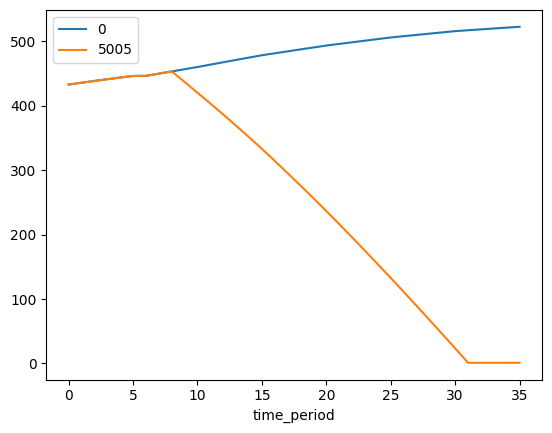

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [39]:
[sa.model_attributes.build_varlist("Solid Waste", x) for x in model_ce.integration_variables]



[[], [], [], [], []]

In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [41]:
df_out_energy[
    [x for x in df_out_energy.columns if ("energy_demand_enfu_subsector_total_pj_trns" in x)]
    #[x for x in df_out_energy.columns if ("energy_consumption_trns" in x)]
].sum(axis = 1)


0     6016.964277
1     6056.086091
2     6094.577617
3     6132.070740
4     6168.067295
5     6202.197909
6     6204.582066
7     6252.307569
8     6299.961994
9     6347.547922
10    6395.067807
11    6446.476951
12    6497.533833
13    6548.256856
14    6598.663073
15    6648.768307
16    6691.130187
17    6733.213892
18    6775.031605
19    6816.594832
20    6857.914346
21    6893.262301
22    6928.338002
23    6963.152323
24    6997.715480
25    7032.037204
26    7059.925811
27    7087.556553
28    7114.938648
29    7142.080832
30    7168.991304
31    7188.227868
32    7207.222019
33    7225.981249
34    7244.512793
35    7262.823432
dtype: float64